# Content

In [1]:
from xspec import *
from stingray import EventList,Lightcurve
from astropy.io import fits
import matplotlib.pyplot as plt
from astropy.table import Table
import time
import copy
import os
import re
import gzip 
import tarfile 
import shutil
import subprocess
import astropy.io.fits as fits
import glob
import sys
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm
import matplotlib.colors as colors
from mpl_toolkits import axes_grid1
import pyregion

import warnings
from astropy.io import fits
from astropy.wcs import WCS, FITSFixedWarning
from astropy.coordinates import SkyCoord
from astropy import units as u

from stingray.events import EventList
from stingray import EventList, Lightcurve
from stingray.pulse.pulsar import fold_events, pulse_phase
from stingray.pulse.search import epoch_folding_search, z_n_search
from stingray.pulse.search import plot_profile, phaseogram, plot_phaseogram

import ixpeobssim.core.pipeline as pipeline
from ixpeobssim.binning.polarization import xBinnedPolarizationCube,xBinnedPolarizationMapCube
from ixpeobssim.binning.misc import xBinnedMap
# from ixpeobssim.binning.misc import xBinnedPulseProfile
# from ixpeobssim.binning.base import xEventBinningBaseA

from ixpeobssim.utils.fmtaxis import fmtaxis 

from ixpeobssim.utils.misc import pairwise_enum
from ixpeobssim.utils.matplotlib_ import plt, setup_gca, last_line_color

# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"


/home/chen/anaconda3/envs/ixpe/lib/python3.9/site-packages/stingray/utils.py:25: UserWarning: pyfftw not installed. Using standard scipy fft
  warnings.warn("pyfftw not installed. Using standard scipy fft")
>>> Loading XSPEC local models from the "ixpeobssim" package in /home/chen/anaconda3/envs/ixpe/lib/python3.9/site-packages/ixpeobssim/xspec...
>>> Could not XSPEC load local models.

***Error: Xspec was unable to load the model package: ixpeobssim
   Either it could not find the model library file in the directory:
/home/chen/anaconda3/envs/ixpe/lib/python3.9/site-packages/ixpeobssim/xspec
   or the file contains errors.
   (try "load (path)/(lib filename)" for more error info)
>>> (This might indicate that you need to compile them.)
>>> See the documentation for more info about XSPEC support.
>>> Done.


In [2]:
# some

#Xspec nh
nh = float(0.03)

#Xspec polarization degree  0<=A<=1
A = float(0.45)

#Xspec polarization angle
psi = float(-50)

#source region
radius = float(60)

#background region
radius_inner = float(160)
radius_outer = float(282)
# function to find file path
# def find_file(filename):
#     for root, dirs, files in os.walk('/'):
#         if filename in files:
#             return os.path.join(root, filename)
        
# picorr_path = find_file('PIcorr_Flag')
# print(picorr_path)

#obtain rmf,arf,mrf file path
# rmf_path = find_file('ixpe_d1_20170101_02.rmf')
# print(rmf_path)

# arf_path = find_file('ixpe_d1_20170101_02.arf')
# print(arf_path)
 
# mrf_path = find_file('ixpe_d1_20170101_02.mrf')
# print(mrf_path)

In [3]:
# Observation number table
observations = [
    ['33333333', 'velapulsar', 'Point'],
    ['77777777', 'velapulsar', 'Point'],
    ['01001301', 'CasA', 'Extended'],
    ['01006501', 'CenX-3', 'Point'],
    ['01003299', '4U0142+61', 'Point'],
    ['01004301', 'CenA', 'Extended'],
    ['01001899', 'HerX-1', 'Point'],
    ['01001099', 'Crab', 'Point'],
    ['01003499', 'SgrA', 'Point'],
    ['01004501', 'Mrk501', 'Point'],
    ['01002701', '4U1626-67', 'Point'],
    ['01004601', 'Mrk501', 'Point'],
    ['01002801', 'GS1826-238', 'Point'],
    ['01005301', 'S5 0716+714', 'Point'],
    ['01001299', 'VelaPulsar', 'Point'],
    ['01002501', 'VelaX-1', 'Point'],
    ['01001601', 'CygX-2', 'Point'],
    ['01006601', 'CygX-2', 'Point'],
    ['01006201', '1ES1959+650', 'Point'],
    ['01003701', 'Mrk421', 'Point'],
    ['01006301', 'BLLac', 'Point'],
    ['01003399', 'MCG-5-23-16', 'Extended'],
    ['01002901', 'CygX-1', 'Point'],
    ['01005401', '3C454.3', 'Point'],
    ['01005901', '3C273', 'Point'],
    ['01003801', 'Mrk421', 'Point'],
    ['01003901', 'Mrk421', 'Point'],
    ['01006001', '1ES1959+650', 'Point'],
    ['01005701', '3C279', 'Point'],
    ['01250101', 'CygX-1', 'Extended'],
    ['01001401', 'Tycho', 'Point'],
    ['01250201', 'CenX-3', 'Point'],
    ['01006701', 'BLLac', 'Point'],
    ['01004701', 'Mrk501', 'Point'],
    ['01003501', 'Circinusgalax', 'Point'],
    ['01002601', 'GX301-2', 'Point'],
    ['01006801', 'SN1006NE', 'Point'],
    ['01001799', 'XPersei', 'Point'],
    ['01250401', '4U1630-47', 'Point'],
    ['01001101', 'MSH15-52', 'Point'],
    ['01003199', '1RXSJ170849.0', 'Point'],
    ['01250601', 'XTEJ1701-462', 'Point'],
    ['01250701', 'XTEJ1701-462', 'Point'],
    ['01002401', 'GX9+9', 'Point'],
    ['02002301', '4U1820-303', 'Point'],
    ['02250101', 'GRB221009A', 'Point'],
    ['02001899', 'CygX-3', 'Point'],
    ['02001901', 'LMCX-1', 'Point'],
    ['02004801', '1ES1959+65', 'Point'],
    ['02003299', 'MCG-5-23-16', 'Point'],
    ['02003501', 'GROJ1008-57', 'Point'],
    ['02003601', 'GROJ1008-57', 'Point'],
    ['02250201', 'EXO2030+375', 'Point'],
    ['02005901', 'BLLac', 'Point'],
    ['02005801', 'VelaX-1', 'Point'],
    ['02004401', 'Mrk421', 'Point'],
    ['02004401', 'Mrk421', 'Point'],
    ['02003101', 'NGC 4151', 'Point'],
    ['02001601', 'Tycho', 'Point'],
    ['02250301', 'Cyg X-3', 'Point'],
    ['02001299', 'PSR B0540-69', 'Point'],
    ['01003601', 'IC4329A', 'Point'],
    ['01006499', '1ES 0229+200', 'Point'],
    ['02003801', 'Her X-1', 'Point'],
    ['02004601', 'Mrk501', 'Point']
]



In [4]:
PI_observations = [

    ['01006201', '1ES1959650_01006201' ],
    ['01005901', '3C_273_2_01005901' ],
    ['01005401', '3C_454_01005401' ],
    ['01002701', '4U1626_67_01002701' ],
    ['01003201', '4U_01003201' ],
    ['01006301', 'bl_lac_01006301' ],
    ['01001301', 'CasA_01001301' ],
    ['01004301', 'CenA_01004301' ],
    ['01006501', 'CenX3_01006501' ],
    ['01001099', 'Crab_01001099' ],
    ['01002901', 'cyg_x1_01002901' ],
    ['01001601', 'cyg_x2_01001601' ],
    ['01006601', 'cyg_x2_off_01006601' ],
    ['01002801', 'gs1826_238_01002801' ],
    ['01001899', 'Her_x1_01001899' ],
    ['01003399', 'mgc_5_23_16_01003399' ],
    ['01003801', 'mrk421_2_01003801' ],
    ['01003701', 'mrk421_01003701' ],
    ['01004601', 'mrk501_01004601' ],
    ['01004501', 'Mrk501_01004501' ],
    ['01005301', 'S50716p714' ],
    ['01003499', 'SgrA_01003499' ],
    ['01001299', 'vela_pulsar_01001299' ],
    ['01002501', 'vela_x1_01002501' ],
    ['77777777', 'vela_pulsar_01001299' ],
    ['33333333', 'vela_pulsar_01001299' ],
]

# python download data

In [5]:
# input OBsid 
while True:
    OBsid = input("Please input your OBsid: ")
    if len(OBsid) == 8 and OBsid.isdigit():
        break
    else:
        print("Input error, please re-enter！")
print(OBsid+'\nThe task has been created. Please wait！')
for observation in observations:
    if OBsid == observation[0]:
        print('name: {}'.format(observation[1]))
        print('type: {}'.format(observation[2]))
        # Run instruction
        download_1 = 'wget -q -nH --no-check-certificate --cut-dirs=5 -r -l0 -c -N -np -R \'index*\' -erobots=off --retr-symlinks https://heasarc.gsfc.nasa.gov/FTP/ixpe/data/obs'
        print(download_1 + '/' + OBsid[:2] + '//' + OBsid + '/')
        if (not(os.path.exists(OBsid))):       # os.path.exists() 函数检查文件夹是否存在
            os.system(download_1 + '/' + OBsid[:2] + '//' + OBsid + '/README')
            os.system(download_1 + '/' + OBsid[:2] + '//' + OBsid + '/event_l2/')
            # Run failure
            if not os.listdir():
                print('Error: Download failed!')
            # Download completed
            else:
                print('Data download completed!')
            current_path = os.getcwd()
            print(current_path)
            break
        else:print("task have exit")

Please input your OBsid: 01001299
01001299
The task has been created. Please wait！
name: VelaPulsar
type: Point
wget -q -nH --no-check-certificate --cut-dirs=5 -r -l0 -c -N -np -R 'index*' -erobots=off --retr-symlinks https://heasarc.gsfc.nasa.gov/FTP/ixpe/data/obs/01//01001299/
task have exit


In [6]:
PI_Flag = 0
for PI_observation in PI_observations:
    if OBsid == PI_observation[0]:
        print('filename: {}'.format(PI_observation[1]))
        PI_Flag = 1
        # Run instruction
        folder_name = "ixpesw-pi_corr_caldb-80affacd3e30"  # 您要查找的文件夹名称
        # 检查当前工作目录下是否存在指定名称的文件夹
        if os.path.isdir(folder_name):
            folder_path = os.path.abspath(folder_name)
            print("文件夹已存在，绝对路径为：", folder_path)
        else:
            # 如果文件夹不存在，则下载并解压缩文件
            print("文件夹不存在，开始下载并解压缩文件...")
            subprocess.run(["wget", "https://bitbucket.org/ixpesw/pi_corr_caldb/get/80affacd3e302e860ed144186c9873a93a8a145a.zip"])
            subprocess.run(["unzip", "80affacd3e302e860ed144186c9873a93a8a145a.zip"])
            folder_path = os.path.abspath("ixpesw-pi_corr_caldb-80affacd3e30")
            print("文件夹已解压缩，绝对路径为：", folder_path)


filename: vela_pulsar_01001299
文件夹已存在，绝对路径为： /home/chen/git/workplace/biyesheji/ixpesw-pi_corr_caldb-80affacd3e30


In [7]:
Flag = 0  
os.chdir(OBsid)
for file_name in os.listdir('.'):
    # 判断是否为README文件，如果是则将Flag变量设为1
    if file_name.startswith('README'):
        Flag = 1
print('Flag =', Flag)

Flag = 1


In [8]:
if Flag == 1:
    # The current path is above event_l2

    # Extract the values of TCRPX7 and TCRPX8 from the text 
    with open('README', 'r') as f: 
        content = f.read() 
    lines = content.split('\n') 
    for line in lines: 
        if 'TCRPX7' in line: 
            TCRPX7 = float(line.split('TCRPX7')[1].strip().split('=')[-1]) 
            print('TCRPX7:', TCRPX7)
        if 'TCRPX8' in line: 
            TCRPX8 = float(line.split('TCRPX8')[1].strip().split('=')[-1]) 
            print('TCRPX8:', TCRPX8)


TCRPX7: 302.4
TCRPX8: 315.5


In [9]:
os.chdir('event_l2')


# Obtain current path 
current_path = os.getcwd() 
# Gets all files in the current path 
files = os.listdir(current_path) 
# Walk through the file and unzip the package
for file in files: 
    # Check whether the file is in.gz format
    if file.endswith('.gz'): 
        # unzip
        with gzip.open(file, 'rb') as f: 
            content = f.read() 
            with open(file[:-3], 'wb') as f_out: 
                f_out.write(content) 
    # Check whether the file is in tar.gz format
    elif file.endswith('.tar.gz'): 
         # unzip 
        tar = tarfile.open(file, 'r:gz') 
        tar.extractall() 
        tar.close()

In [10]:
Initial11_file = []
# Gets all files in the current path
for file in os.listdir('.'):
    # If the file name contains det, 
    # the decision is to limit the number of list elements that
    # can occur when the code is run multiple times
    if 'det' in file and 'select' not in file and '.gz' not in file and 'wcscorr' not in file and 'map' not in file:
        Initial11_file.append(file)
Initial1_file = sorted(Initial11_file, key=lambda x: int(x.split('_')[1][3]))
print(Initial1_file)

['ixpe01001299_det1_evt2_v03.fits', 'ixpe01001299_det2_evt2_v03.fits', 'ixpe01001299_det3_evt2_v03.fits']


## PI corr

In [11]:
filename = 'xppicorr.py'
file_content = '''
#!/usr/bin/env python
#
# Copyright (C) 2022, the ixpeobssim team.
#
# This program is free software; you can redistribute it and/or modify
# it under the terms of the GNU General Public License as published by
# the Free Software Foundation; either version 3 of the License, or
# (at your option) any later version.
#
# This program is distributed in the hope that it will be useful,
# but WITHOUT ANY WARRANTY; without even the implied warranty of
# MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
# GNU General Public License for more details.
#
# You should have received a copy of the GNU General Public License along
# with this program; if not, write to the Free Software Foundation, Inc.,
# 51 Franklin Street, Fifth Floor, Boston, MA 02110-1301 USA.

"""xppicorr app.
"""

from __future__ import print_function, division

from astropy.io import fits
import numpy

from ixpeobssim.evt.event import xEventFile, xEventList
from ixpeobssim.evt.picorr import xPulseInvariantCorrection
from ixpeobssim.utils.argparse_ import xArgumentParser
from ixpeobssim.utils.logging_ import logger
from ixpeobssim.utils.misc import process_file_list
from ixpeobssim.utils.os_ import check_input_file, check_output_file

#pylint: disable=no-member

__description__ = \
"""Correct the PI column in a level-2 file, given either a constant scale factor
and/or offset, or a proper FITS file with a time-dependent correction.

In order to avoid steps in the output corrected files, a floating-point smearing
factor in the [-0.5, 0.5] interval is added to the original PI before the
correction. When run in deterministic mode this factor is determined by the
event time (more precisely, using the fractional part of the timestamps), otherwise
we just throw a random number with a uniform distribution.

Note this is mainly intended for debugging purposes---you are changing the
actual data, so you'd better know what you are doing :-)
"""

PARSER = xArgumentParser(description=__description__)
PARSER.add_filelist()
PARSER.add_argument('--offset', type=float, default=0.,
    help='global offset for the PI column')
PARSER.add_argument('--slope', type=float, default=1.,
    help='global scale factor for the PI column')
PARSER.add_argument('--corrfile', type=str, default=None,
    help='path to the FITS file for a time-dependent correction')
PARSER.add_boolean('--deterministic', default=True,
    help='run in deterministic mode')
PARSER.add_seed()
PARSER.add_suffix('picorr')
PARSER.add_overwrite()



def _smearing_delta_pi(event_file, **kwargs):
    """
    Calculate the smearing factor to be added to the PI prior to the correction,
    in order to avoid steps in the output file.

    Depending on whether xppicorr is run in deterministic mode or not, this is
    done using the fractional part of the timestamp, or an actual random number.
    See https://bitbucket.org/ixpesw/ixpeobssim/issues/595/ for more details.
    """
    if kwargs.get('deterministic'):
        logger.info('Applying deterministic smearing...')
        _, microseconds = xEventList.split_event_time(event_file.time_data())
        delta = 1.e-6 * microseconds - 0.5
    else:
        seed = kwargs.get('seed')
        if seed is not None:
            logger.info('Applying random smearing...')
            logger.info('Setting the random seed to %d...', kwargs.get('seed'))
            numpy.random.seed(seed)
        delta = numpy.random.uniform(-0.5, 0.5, size=event_file.num_events())
    logger.debug('Smearing stat (min, max, average): %.6f, %.6f, %.6f',
        delta.min(), delta.max(), delta.mean())
    return delta


def _process_file(file_path, **kwargs):
    """Process a single file.
    """
    output_file_path = check_output_file(file_path, kwargs.get('suffix'), kwargs.get('overwrite'))
    if output_file_path is None:
        return None
    event_file = xEventFile(file_path)
    # Retrieve the PI.
    pi = event_file.pi_data().astype(float)
    # A random fluctuation not to have steps in the output binned files.
    pi += _smearing_delta_pi(event_file, **kwargs)
    if kwargs.get('corrfile') is not None:
        correction = xPulseInvariantCorrection(kwargs.get('corrfile'))
        slope, offset = correction(event_file.time_data())
        logger.info('Average slope: %.3f', slope.mean())
        logger.info('Average offset: %.3f', offset.mean())
    else:
        slope, offset = kwargs.get('slope'), kwargs.get('offset')
    # Apply the correction.
    pi = pi * slope + offset
    # Convert back to integer---note we are clipping the PI values below zero, if
    # any after the correction.
    pi = numpy.rint(pi).clip(0)
    event_file.set_column('EVENTS', 'PI', pi)
    event_file.write(output_file_path, overwrite=kwargs.get('overwrite'))
    return output_file_path


def xppicorr(**kwargs):
    """Application entry point.
    """
    return process_file_list(_process_file, kwargs.get('filelist'), **kwargs)


def main():
    """main() entry point.
    """
    xppicorr(**PARSER.parse_args().__dict__)



if __name__ == '__main__':
    main()
'''

# 打开文件并写入内容
with open(filename, 'w') as file:
    file.write(file_content)

# 提示文件已创建
print(f'文件"{filename}"已创建。')

文件"xppicorr.py"已创建。


In [12]:
if PI_Flag == 1:
    m = 0
    PI_det_list = ["det1_pi_correction.fits", "det2_pi_correction.fits", "det3_pi_correction.fits"]
    E = 'python xppicorr.py '
    B = Initial1_file[m]
    C = ' --corrfile '
    for m in range(3):
        D = folder_path + '/' + PI_observation[1] + '/' + PI_det_list[m]
        B = Initial1_file[m]
        command = E + B + C + D
        print(command)
        result = subprocess.run(command,shell=True, stdout=subprocess.PIPE,stderr=subprocess.PIPE)
        output = result.stdout.decode('utf-8')
        error = result.stderr.decode('utf-8')
        if output:
            print('命令:')
            print(output)
        if error:
            print('提示:')
            print(error)

python xppicorr.py ixpe01001299_det1_evt2_v03.fits --corrfile /home/chen/git/workplace/biyesheji/ixpesw-pi_corr_caldb-80affacd3e30/vela_pulsar_01001299/det1_pi_correction.fits
命令:

    Welcome to ixpeobssim 30.2.2 (built on Wed, 15 Feb 2023 10:22:34 +0100).

    Copyright (C) 2015--2023, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: ixpe01001299_det1_evt2_v03.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      62   ()      
  1  EVENTS        1 BinTableHDU    214   785892R x 10C   [J, D, 16X, 16X, J, E, E, E, D, D]   
  2  GTI           1 BinTableHDU     55   1002R x 2C   [D, D]   
Filename: ixpe01001299_det1_evt2_v03.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY   

In [13]:
print(PI_det_list)
print(Initial1_file)

['det1_pi_correction.fits', 'det2_pi_correction.fits', 'det3_pi_correction.fits']
['ixpe01001299_det1_evt2_v03.fits', 'ixpe01001299_det2_evt2_v03.fits', 'ixpe01001299_det3_evt2_v03.fits']


In [14]:
PIcorr1_file = []
# Gets all files in the current path
for file in os.listdir('.'):
    # If the file name contains det, 
    # the decision is to limit the number of list elements that
    # can occur when the code is run multiple times
     if 'det' in file and 'picorr' in file and '.gz' not in file  and 'picorr_picorr' not in file and 'wcs' not in file and 'select' not in file and 'bkg' not in file and 'gti' not in file and 'pha' not in file and 'cmap' not in file and 'pcube' not in file and 'source' not in file:
        PIcorr1_file.append(file)
PIcorr_file = sorted(PIcorr1_file, key=lambda x: int(x.split('_')[1][3]))
print(PIcorr_file)

['ixpe01001299_det1_evt2_v03_picorr.fits', 'ixpe01001299_det2_evt2_v03_picorr.fits', 'ixpe01001299_det3_evt2_v03_picorr.fits']


>>> Opening input event file ixpe01001299_det1_evt2_v03_picorr.fits...



    Welcome to ixpeobssim 30.2.2 (built on Wed, 15 Feb 2023 10:22:34 +0100).

    Copyright (C) 2015--2023, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: ixpe01001299_det1_evt2_v03_picorr.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      62   ()      
  1  EVENTS        1 BinTableHDU    214   785892R x 10C   [J, D, 16X, 16X, J, E, E, E, D, D]   
  2  GTI           1 BinTableHDU     55   1002R x 2C   [D, D]   


>>> Reading WCS information from the EVENTS HDU...
image-header keyword DATE-OBS in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFF in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFI in binary table. [astropy.wcs.wcs]
image-header keyword TELAPSE in binary table. [astropy.wcs.wcs]
image-header keyword TIMESYS in binary table. [astropy.wcs.wcs]
image-header keyword TIMEUNIT in binary table. [astropy.wcs.wcs]
image-header keyword TSTART in binary table. [astropy.wcs.wcs]
image-header keyword TSTOP in binary table. [astropy.wcs.wcs]
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 128.83604  -45.17643  
CRPIX : 299.0  299.0  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222  0.00072222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Event file comes without a MONTE_CARLO extension.
>>> Re-building the ROI table...
>>> Input file has no ROITABLE extension, cannot rebuild ROI table.
>>

Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     52   (200, 200)   float64   


>>> Writing CMAP binned data to ixpe01001299_det1_evt2_v03_picorr_cmap.fits...
>>> Done.
>>> Opening input event file ixpe01001299_det2_evt2_v03_picorr.fits...


Filename: ixpe01001299_det2_evt2_v03_picorr.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      62   ()      
  1  EVENTS        1 BinTableHDU    214   798950R x 10C   [J, D, 16X, 16X, J, E, E, E, D, D]   
  2  GTI           1 BinTableHDU     55   1005R x 2C   [D, D]   


>>> Reading WCS information from the EVENTS HDU...
image-header keyword DATE-OBS in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFF in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFI in binary table. [astropy.wcs.wcs]
image-header keyword TELAPSE in binary table. [astropy.wcs.wcs]
image-header keyword TIMESYS in binary table. [astropy.wcs.wcs]
image-header keyword TIMEUNIT in binary table. [astropy.wcs.wcs]
image-header keyword TSTART in binary table. [astropy.wcs.wcs]
image-header keyword TSTOP in binary table. [astropy.wcs.wcs]
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 128.83604  -45.17643  
CRPIX : 299.0  299.0  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222  0.00072222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Event file comes without a MONTE_CARLO extension.
>>> Re-building the ROI table...
>>> Input file has no ROITABLE extension, cannot rebuild ROI table.
>>

Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     52   (200, 200)   float64   


>>> Writing CMAP binned data to ixpe01001299_det2_evt2_v03_picorr_cmap.fits...
>>> Done.
>>> Opening input event file ixpe01001299_det3_evt2_v03_picorr.fits...


Filename: ixpe01001299_det3_evt2_v03_picorr.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      62   ()      
  1  EVENTS        1 BinTableHDU    214   762992R x 10C   [J, D, 16X, 16X, J, E, E, E, D, D]   
  2  GTI           1 BinTableHDU     55   1003R x 2C   [D, D]   


>>> Reading WCS information from the EVENTS HDU...
image-header keyword DATE-OBS in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFF in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFI in binary table. [astropy.wcs.wcs]
image-header keyword TELAPSE in binary table. [astropy.wcs.wcs]
image-header keyword TIMESYS in binary table. [astropy.wcs.wcs]
image-header keyword TIMEUNIT in binary table. [astropy.wcs.wcs]
image-header keyword TSTART in binary table. [astropy.wcs.wcs]
image-header keyword TSTOP in binary table. [astropy.wcs.wcs]
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 128.83604  -45.17643  
CRPIX : 299.0  299.0  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222  0.00072222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Event file comes without a MONTE_CARLO extension.
>>> Re-building the ROI table...
>>> Input file has no ROITABLE extension, cannot rebuild ROI table.
>>

Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     52   (200, 200)   float64   


>>> Writing CMAP binned data to ixpe01001299_det3_evt2_v03_picorr_cmap.fits...
>>> Done.
>>> Closing event file ixpe01001299_det3_evt2_v03_picorr.fits...
>>> Reading (in memory) ixpe01001299_det1_evt2_v03_picorr_cmap.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      52   (200, 200)   float64   


Set MJD-OBS to 59674.862062 from DATE-OBS.
Set MJD-END to 59699.417954 from DATE-END'. [astropy.wcs.wcs]
>>> Reading (in memory) ixpe01001299_det2_evt2_v03_picorr_cmap.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      52   (200, 200)   float64   


>>> Reading (in memory) ixpe01001299_det3_evt2_v03_picorr_cmap.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      52   (200, 200)   float64   


/home/chen/anaconda3/envs/ixpe/lib/python3.9/site-packages/ixpeobssim/core/fitsio.py:527: RuntimeWarning: divide by zero encountered in double_scalars
  log_a = vmax / vmin


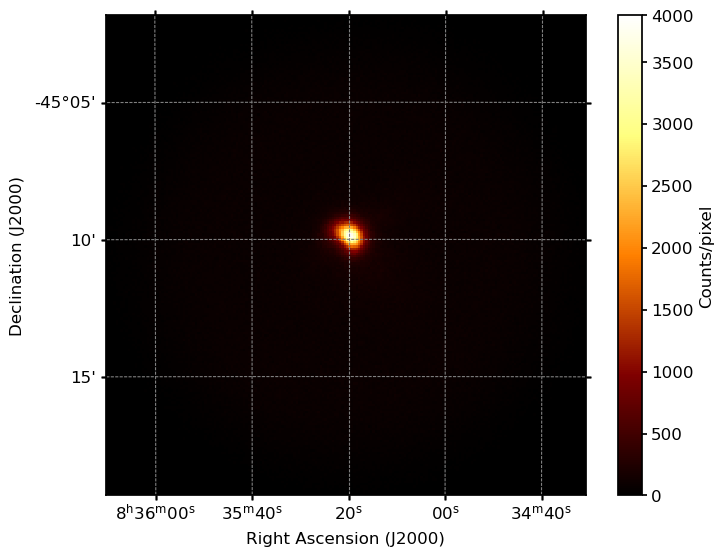

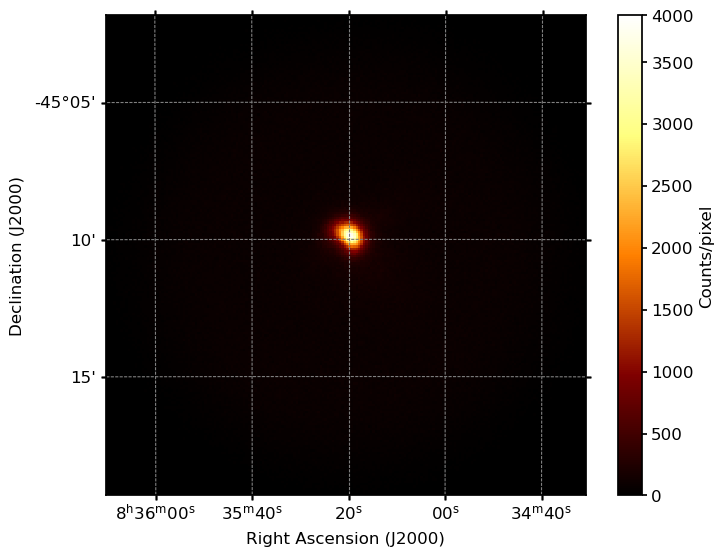

In [15]:
# print(current_path)
# det1_path = find_file('ixpe01006501_det1_evt2_v15.fits')
fmap = pipeline.xpbin(*PIcorr_file, algorithm='CMAP',overwrite=True)
map_ = xBinnedMap.from_file_list(fmap)
pipeline.figure('count map')
map_.plot()

In [16]:
map_list=[]

os.system('ls *cmap*.fits >map')
with open("map", "r") as f:
    for map_1 in f.readlines():
        map_1 = map_1.strip('\n')
        map_list.append(map_1)
        print(map_1)

ixpe01001299_det1_evt2_v03_picorr_cmap.fits
ixpe01001299_det2_evt2_v03_picorr_cmap.fits
ixpe01001299_det3_evt2_v03_picorr_cmap.fits


-------------------
the peak position:  102 108
-------------------
the peak position:  101 108
-------------------
the peak position:  101 108


Set MJD-OBS to 59674.862062 from DATE-OBS.
Set MJD-END to 59699.417954 from DATE-END'. [astropy.wcs.wcs]


<Figure size 800x600 with 0 Axes>

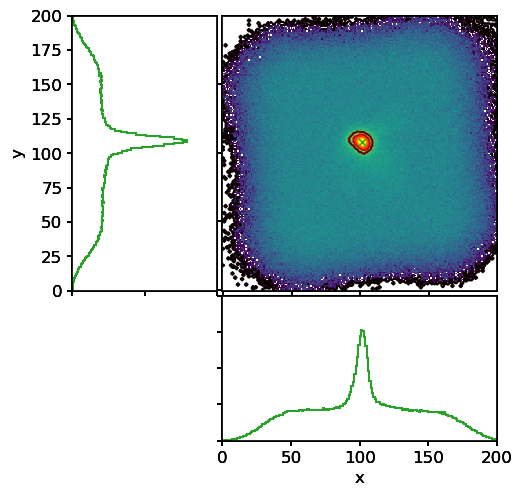

In [17]:
fig = plt.figure()

hdu = fits.open(map_list[0])[0]
wcs = WCS(hdu.header)
# fig.add_subplot(111, projection=wcs)
# for f in fname:
#     hdu = fits.open(f)[0]
#     plt.imshow(hdu.data, origin='lower', cmap=plt.cm.rainbow, norm=LogNorm())
    
fig, ax = plt.subplots(figsize=(5, 5))
plt.axis('off')
colors = ['C0','C1','C2','C3']
for i, f in enumerate(map_list):
    hdu = fits.open(f)[0]
    data = hdu.data
    nbins = data.shape[0]
    bins = np.linspace(0, nbins, nbins+1)
    x = data.sum(axis=0)
    y = data.sum(axis=1)

    # first axis: likelihood contours
    ax1 = fig.add_axes((0.4, 0.4, 0.55, 0.55))
    ax1.xaxis.set_major_formatter(plt.NullFormatter())
    ax1.yaxis.set_major_formatter(plt.NullFormatter())
    ax1.imshow(hdu.data, origin='lower', cmap=plt.cm.viridis, norm=LogNorm())
    ax1.contour(hdu.data)
    ax1.plot(x.argmax(), y.argmax(), 'x', color=colors[i])
    print("-------------------")
    print("the peak position: ", x.argmax(), y.argmax())

    # second axis: marginalized over x
    ax2 = fig.add_axes((0.1, 0.4, 0.29, 0.55))
    ax2.xaxis.set_major_formatter(plt.NullFormatter())
    ax2.plot(y, 0.5 * (bins[1:] + bins[:-1]),
             '-', drawstyle='steps', color=colors[i])
    ax2.set_ylabel('y')

    # third axis: marginalized over y
    ax3 = fig.add_axes((0.4, 0.1, 0.55, 0.29))
    ax3.yaxis.set_major_formatter(plt.NullFormatter())
    ax3.plot(0.5 * (bins[1:] + bins[:-1]), x,
             '-', drawstyle='steps-mid', color=colors[i])
    ax3.set_xlabel('x')

-------------------
the peak position [bins]:  2520 2631
the peak position [pixels]:  302.40 315.72
-------------------
the peak position [bins]:  2526 2633
the peak position [pixels]:  303.12 315.96
-------------------
the peak position [bins]:  2519 2638
the peak position [pixels]:  302.28 316.56
2520 2631
2526 2633
2519 2638
302.40 315.72


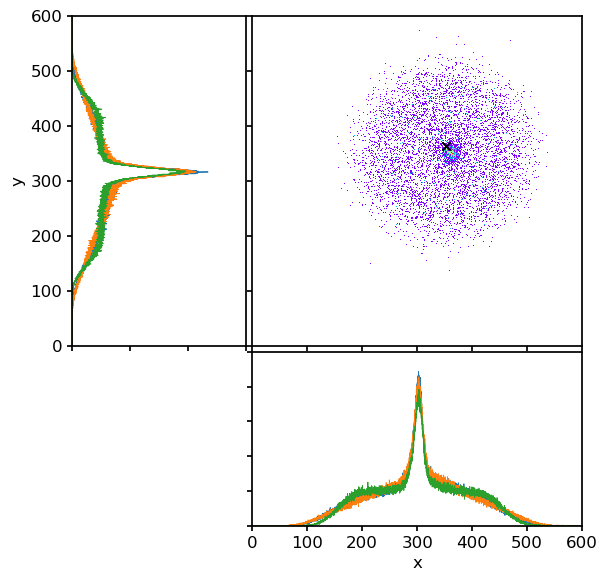

In [18]:
# file_list=['ixpe02001299_det1_evt2_v01_rej_wcscorr_barycorr.fits',
#               'ixpe02001299_det2_evt2_v01_rej_wcscorr_barycorr.fits',
#               'ixpe02001299_det3_evt2_v01_rej_wcscorr_barycorr.fits']
#event file
fig, ax = plt.subplots(figsize=(6, 6))
plt.axis('off')
# first axis: likelihood contours
ax1 = fig.add_axes((0.4, 0.4, 0.55, 0.55))
ax1.xaxis.set_major_formatter(plt.NullFormatter())
ax1.yaxis.set_major_formatter(plt.NullFormatter())
# second axis: marginalized over x
ax2 = fig.add_axes((0.1, 0.4, 0.29, 0.55))
ax2.xaxis.set_major_formatter(plt.NullFormatter())
# third axis: marginalized over y
ax3 = fig.add_axes((0.4, 0.1, 0.55, 0.29))
ax3.yaxis.set_major_formatter(plt.NullFormatter())

colors = ['C0','C1','C2']
nbins = 5000
#nbins = 12000
xbins = np.linspace(0, 600, nbins+1)
ybins = np.linspace(0, 600, nbins+1)

xx = []
yy = []

TCRPX_7=[]
TCRPX_8=[]
for i, f in enumerate(PIcorr_file):
    hdu = fits.open(f)[1]
    data = hdu.data  
    x = data['x']
    y = data['y']
    hist2d, xedges, yedges = np.histogram2d(x, y, bins=(xbins, ybins))
    xhist = hist2d.sum(axis=1)
    yhist = hist2d.sum(axis=0)
    # first axis: likelihood contours
    ax1.imshow(hist2d, interpolation='nearest', origin='lower', 
               cmap=plt.cm.rainbow, norm=LogNorm()) 
#     ax1.plot(xhist.argmax(), yhist.argmax(), 'x', color=colors[i])
    xx.append(xhist.argmax())
    yy.append(yhist.argmax())
    print("-------------------")
    print("the peak position [bins]: ", xhist.argmax(), yhist.argmax())
    xcorr = '{:.2f}'.format(xbins[xhist.argmax()])
    ycorr = '{:.2f}'.format(ybins[yhist.argmax()])
    print("the peak position [pixels]: ", xcorr, ycorr )  
    TCRPX_7.append(xcorr)
    TCRPX_8.append(ycorr)
    # second axis: marginalized over x
    ax2.plot(yhist, 0.5 * (ybins[1:] + ybins[:-1]),
             '-', drawstyle='steps', color=colors[i], linewidth=0.6)
    ax2.set_ylabel('y')
    # third axis: marginalized over y
    ax3.plot(0.5 * (xbins[1:] + xbins[:-1]), xhist,
             '-', drawstyle='steps-mid', color=colors[i], linewidth=0.6)
    ax3.set_xlabel('x')

ci = 0
for xi, yi in zip(xx, yy):
    print(xi, yi)
    ax1.plot(xi, yi, 'x', color='k')
    ci += 1
print(TCRPX_7[0],TCRPX_8[0])

## WCS corr

In [19]:
if Flag == 1:
    print('TCRPX7:', TCRPX7)
    print('TCRPX8:', TCRPX8)
if Flag == 0:
    TCRPX7 = TCRPX_7[0]
    TCRPX8 = TCRPX_8[0]
    print('TCRPX7:', TCRPX7)
    print('TCRPX8:', TCRPX8)

TCRPX7: 302.4
TCRPX8: 315.5


In [20]:
#The current path is located at event_l2
# os.chdir('/home/chen/biyesheji/01006501/event_l2') 

Initial1_file = PIcorr_file
wcscorr = []
# # Gets all files in the current path
# for file in os.listdir('.'):
#     # If the file name contains det, 
#     # the decision is to limit the number of list elements that
#     # can occur when the code is run multiple times
#     if 'det' in file and 'select' not in file and '.gz' not in file and '~' not in file and 'wcscorr' not in file and 'map' not in file:
#         Initial1_file.append(file)

for file in Initial1_file:
    new_file = file.replace('.fits', '_wcscorr.fits')
    wcscorr.append(new_file)
print(wcscorr)

# wcs correction
for i in range(3):
    c=Initial1_file[i]
    hdu = fits.open(Initial1_file[i])  # Open an fits file and assign it to hdu
    hdu2 = copy.deepcopy(hdu)
    # Change the header data
    header = hdu2[1].header  # Gets header file information, stored in the variable header
    header['TCRPX7'] = TCRPX7  
    header['TCRPX8'] = TCRPX8
    print(header['TCRPX7'])
    print(header['TCRPX8'])
    # Write back to the FITS file
    hdu2.writeto(wcscorr[i], overwrite=True)
    print(header['TCRPX7'])
    print(header['TCRPX8'])
    TCRVL7 = header['TCRVL7']
    TCRVL8 = header['TCRVL8']
    hdu.close()
print(header['TCRVL7'])
print(header['TCRVL8'])

os.system('fparkey' +' '+ str(TCRPX7)+' '+wcscorr[0] +' '+ 'TCRPX7')
os.system('fparkey' +' '+ str(TCRPX8)+' '+wcscorr[0] +' '+ 'TCRPX8')
os.system('fparkey' +' '+ str(TCRPX7)+' '+wcscorr[1] +' '+ 'TCRPX7')
os.system('fparkey' +' '+ str(TCRPX8)+' '+wcscorr[1] +' '+ 'TCRPX8')
os.system('fparkey' +' '+ str(TCRPX7)+' '+wcscorr[2] +' '+ 'TCRPX7')
os.system('fparkey' +' '+ str(TCRPX8)+' '+wcscorr[2] +' '+ 'TCRPX8')


['ixpe01001299_det1_evt2_v03_picorr_wcscorr.fits', 'ixpe01001299_det2_evt2_v03_picorr_wcscorr.fits', 'ixpe01001299_det3_evt2_v03_picorr_wcscorr.fits']
302.4
315.5


299
299
302.4
315.5
299
299
302.4
315.5
299
299
128.83604
-45.17643


0

In [21]:
## 


## Point source 
if type == 'Point':
    # Generate a new region file
    file_name = 'source.reg'
    with open( file_name , 'w') as f:
        f.write('# Region file format: DS9 version 4.1')
        f.write('global color=green dashlist=8 3 width=1 font="helvetica 10 normal roman" select=1 highlite=1 dash=0 fixed=0 edit=1 move=1 delete=1 include=1 source=1\n')
        f.write('fk5\n')
        f.write('circle({},{},{}") # color=white width=4'.format(TCRVL7, TCRVL8, radius))

    current_path = os.getcwd()
    print(current_path + '/source.reg')
    
    file_name = 'background.reg'
    with open( file_name , 'w') as f:
        f.write('# Region file format: DS9 version 4.1')
        f.write('global color=green dashlist=8 3 width=1 font="helvetica 10 normal roman" select=1 highlite=1 dash=0 fixed=0 edit=1 move=1 delete=1 include=1 source=1\n')
        f.write('fk5\n')
        f.write('annulus({},{},{}",{}") # color=white width=4'.format(TCRVL7, TCRVL8, radius_inner, radius_outer))

    current_path = os.getcwd()
    print(current_path + 'background.reg')
    background_path = current_path + '/background.reg'
else:
    print("The extended source code has not yet been written ^ ^")
    # Generate a new region file
    file_name = 'source.reg'
    with open( file_name , 'w') as f:
        f.write('# Region file format: DS9 version 4.1')
        f.write('global color=green dashlist=8 3 width=1 font="helvetica 10 normal roman" select=1 highlite=1 dash=0 fixed=0 edit=1 move=1 delete=1 include=1 source=1\n')
        f.write('fk5\n')
        f.write('circle({},{},{}") # color=white width=4'.format(TCRVL7, TCRVL8, radius))

    current_path = os.getcwd()
    print(current_path + '/source.reg')
    
    file_name = 'background.reg'
    with open( file_name , 'w') as f:
        f.write('# Region file format: DS9 version 4.1')
        f.write('global color=green dashlist=8 3 width=1 font="helvetica 10 normal roman" select=1 highlite=1 dash=0 fixed=0 edit=1 move=1 delete=1 include=1 source=1\n')
        f.write('fk5\n')
        f.write('annulus({},{},{}",{}") # color=white width=4'.format(TCRVL7, TCRVL8, radius_inner, radius_outer))

    current_path = os.getcwd()
    print(current_path + '/background.reg')
    background_path = current_path + '/background.reg'

The extended source code has not yet been written ^ ^
/home/chen/git/workplace/biyesheji/01001299/event_l2/source.reg
/home/chen/git/workplace/biyesheji/01001299/event_l2/background.reg


## Generating energy spectrum

In [22]:
# curren path is event_l2


Initial_SPfile = []

for file in os.listdir('.'):
    # If the file name ends in wcscorr.fits
    if file.endswith('wcscorr.fits') and 'bkg' not in file:
        Initial_SPfile.append(file)
        
new_SPfile = []
for det in ['det1', 'det2', 'det3']:
    for filename in Initial_SPfile:
        if det in filename:
            new_SPfile.append(filename)
            break
print(new_SPfile)

# Creates a new list of each element in new_SPfile with _select before.fits
spectrum_filename = [f'{name}_select.fits' for name in new_SPfile]
# Determine whether lists A and B are the same length
if len(new_SPfile) == len(spectrum_filename):
    print('Successfully created！')
    

for p in range(3):
    shutil.copyfile(new_SPfile[p], 'bkg_'+new_SPfile[p])

background_filename = [f'bkg_{name}' for name in new_SPfile]

    

['ixpe01001299_det1_evt2_v03_picorr_wcscorr.fits', 'ixpe01001299_det2_evt2_v03_picorr_wcscorr.fits', 'ixpe01001299_det3_evt2_v03_picorr_wcscorr.fits']
Successfully created！


In [23]:
print(new_SPfile)
print(background_filename)

['ixpe01001299_det1_evt2_v03_picorr_wcscorr.fits', 'ixpe01001299_det2_evt2_v03_picorr_wcscorr.fits', 'ixpe01001299_det3_evt2_v03_picorr_wcscorr.fits']
['bkg_ixpe01001299_det1_evt2_v03_picorr_wcscorr.fits', 'bkg_ixpe01001299_det2_evt2_v03_picorr_wcscorr.fits', 'bkg_ixpe01001299_det3_evt2_v03_picorr_wcscorr.fits']


In [24]:
aspcor_file = [new_SPfile[0],new_SPfile[1],new_SPfile[2]]
E_BIN = [2., 8]
fsrc = pipeline.xpselect(*aspcor_file, regfile='source.reg', overwrite=True)

>>> Opening input event file ixpe01001299_det1_evt2_v03_picorr_wcscorr.fits...



    Welcome to ixpeobssim 30.2.2 (built on Wed, 15 Feb 2023 10:22:34 +0100).

    Copyright (C) 2015--2023, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: ixpe01001299_det1_evt2_v03_picorr_wcscorr.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      62   ()      
  1  EVENTS        1 BinTableHDU    214   785892R x 10C   [J, D, 16X, 16X, J, E, E, E, D, D]   
  2  GTI           1 BinTableHDU     55   1002R x 2C   [D, D]   


>>> Reading WCS information from the EVENTS HDU...
image-header keyword DATE-OBS in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFF in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFI in binary table. [astropy.wcs.wcs]
image-header keyword TELAPSE in binary table. [astropy.wcs.wcs]
image-header keyword TIMESYS in binary table. [astropy.wcs.wcs]
image-header keyword TIMEUNIT in binary table. [astropy.wcs.wcs]
image-header keyword TSTART in binary table. [astropy.wcs.wcs]
image-header keyword TSTOP in binary table. [astropy.wcs.wcs]
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 128.83604  -45.17643  
CRPIX : 302.4  315.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222  0.00072222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Event file comes without a MONTE_CARLO extension.
>>> Re-building the ROI table...
>>> Input file has no ROITABLE extension, cannot rebuild ROI table.
>>

Filename: ixpe01001299_det1_evt2_v03_picorr_wcscorr.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      71   ()      
  1  EVENTS        1 BinTableHDU    214   131583R x 10C   ['J', 'D', '16X', '16X', 'J', 'E', 'E', 'E', 'D', 'D']   
  2  GTI           1 BinTableHDU     55   1002R x 2C   [D, D]   


>>> Done.
>>> Opening input event file ixpe01001299_det2_evt2_v03_picorr_wcscorr.fits...


Filename: ixpe01001299_det2_evt2_v03_picorr_wcscorr.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      62   ()      
  1  EVENTS        1 BinTableHDU    214   798950R x 10C   [J, D, 16X, 16X, J, E, E, E, D, D]   
  2  GTI           1 BinTableHDU     55   1005R x 2C   [D, D]   


>>> Reading WCS information from the EVENTS HDU...
image-header keyword DATE-OBS in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFF in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFI in binary table. [astropy.wcs.wcs]
image-header keyword TELAPSE in binary table. [astropy.wcs.wcs]
image-header keyword TIMESYS in binary table. [astropy.wcs.wcs]
image-header keyword TIMEUNIT in binary table. [astropy.wcs.wcs]
image-header keyword TSTART in binary table. [astropy.wcs.wcs]
image-header keyword TSTOP in binary table. [astropy.wcs.wcs]
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 128.83604  -45.17643  
CRPIX : 302.4  315.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222  0.00072222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Event file comes without a MONTE_CARLO extension.
>>> Re-building the ROI table...
>>> Input file has no ROITABLE extension, cannot rebuild ROI table.
>>

Filename: ixpe01001299_det2_evt2_v03_picorr_wcscorr.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      71   ()      
  1  EVENTS        1 BinTableHDU    214   123320R x 10C   ['J', 'D', '16X', '16X', 'J', 'E', 'E', 'E', 'D', 'D']   
  2  GTI           1 BinTableHDU     55   1005R x 2C   [D, D]   


>>> Done.
>>> Opening input event file ixpe01001299_det3_evt2_v03_picorr_wcscorr.fits...


Filename: ixpe01001299_det3_evt2_v03_picorr_wcscorr.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      62   ()      
  1  EVENTS        1 BinTableHDU    214   762992R x 10C   [J, D, 16X, 16X, J, E, E, E, D, D]   
  2  GTI           1 BinTableHDU     55   1003R x 2C   [D, D]   


>>> Reading WCS information from the EVENTS HDU...
image-header keyword DATE-OBS in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFF in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFI in binary table. [astropy.wcs.wcs]
image-header keyword TELAPSE in binary table. [astropy.wcs.wcs]
image-header keyword TIMESYS in binary table. [astropy.wcs.wcs]
image-header keyword TIMEUNIT in binary table. [astropy.wcs.wcs]
image-header keyword TSTART in binary table. [astropy.wcs.wcs]
image-header keyword TSTOP in binary table. [astropy.wcs.wcs]
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 128.83604  -45.17643  
CRPIX : 302.4  315.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222  0.00072222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Event file comes without a MONTE_CARLO extension.
>>> Re-building the ROI table...
>>> Input file has no ROITABLE extension, cannot rebuild ROI table.
>>

Filename: ixpe01001299_det3_evt2_v03_picorr_wcscorr.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      71   ()      
  1  EVENTS        1 BinTableHDU    214   119354R x 10C   ['J', 'D', '16X', '16X', 'J', 'E', 'E', 'E', 'D', 'D']   
  2  GTI           1 BinTableHDU     55   1003R x 2C   [D, D]   


>>> Done.
>>> Closing event file ixpe01001299_det3_evt2_v03_picorr_wcscorr.fits...


In [25]:
file_list = os.listdir()
result_list = []
lc_gti_list = []
for file in file_list:
    if 'det' in file and 'wcscorr' in file and 'select' not in file and 'cmap' not in file and 'pmapcube' not in file and '.gz' not in file and '~' not in file and 'bkg' not in file:
        result_list.append(file)
result_list.sort(key=lambda x: int(x.split('det')[1].split('_')[0]))
print(result_list)
lc_gti_list = result_list
aspcor_file_2 = []
for file in result_list:
    new_file = file.replace('.fits', '_select.fits')
    aspcor_file_2.append(new_file)
print(aspcor_file_2)


['ixpe01001299_det1_evt2_v03_picorr_wcscorr.fits', 'ixpe01001299_det2_evt2_v03_picorr_wcscorr.fits', 'ixpe01001299_det3_evt2_v03_picorr_wcscorr.fits']
['ixpe01001299_det1_evt2_v03_picorr_wcscorr_select.fits', 'ixpe01001299_det2_evt2_v03_picorr_wcscorr_select.fits', 'ixpe01001299_det3_evt2_v03_picorr_wcscorr_select.fits']


In [26]:
E_BIN = [2., 8]
pmapcube = pipeline.xpbin(*aspcor_file_2, algorithm='PHA1',
                          ebinning=E_BIN,
                         irfname='ixpe:obssim:v010')
pmapcube = pipeline.xpbin(*aspcor_file_2, algorithm='PHA1Q',
                          ebinning=E_BIN,
                         irfname='ixpe:obssim:v010')
pmapcube = pipeline.xpbin(*aspcor_file_2, algorithm='PHA1U',
                          ebinning=E_BIN,
                         irfname='ixpe:obssim:v010')

>>> Opening input event file ixpe01001299_det1_evt2_v03_picorr_wcscorr_select.fits...



    Welcome to ixpeobssim 30.2.2 (built on Wed, 15 Feb 2023 10:22:34 +0100).

    Copyright (C) 2015--2023, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: ixpe01001299_det1_evt2_v03_picorr_wcscorr_select.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      71   ()      
  1  EVENTS        1 BinTableHDU    214   131583R x 10C   [J, D, 16X, 16X, J, E, E, E, D, D]   
  2  GTI           1 BinTableHDU     55   1002R x 2C   [D, D]   


>>> Reading WCS information from the EVENTS HDU...
image-header keyword DATE-OBS in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFF in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFI in binary table. [astropy.wcs.wcs]
image-header keyword TELAPSE in binary table. [astropy.wcs.wcs]
image-header keyword TIMESYS in binary table. [astropy.wcs.wcs]
image-header keyword TIMEUNIT in binary table. [astropy.wcs.wcs]
image-header keyword TSTART in binary table. [astropy.wcs.wcs]
image-header keyword TSTOP in binary table. [astropy.wcs.wcs]
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 128.83604  -45.17643  
CRPIX : 302.4  315.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222  0.00072222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Event file comes without a MONTE_CARLO extension.
>>> Re-building the ROI table...
>>> Input file has no ROITABLE extension, cannot rebuild ROI table.
>>

Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  SPECTRUM      1 xBinTableHDUPHA1     55   375R x 3C   ['J', 'E', 'E']   


>>> Writing PHA1 binned data to ixpe01001299_det1_evt2_v03_picorr_wcscorr_select_pha1.fits...
>>> Done.
>>> Opening input event file ixpe01001299_det2_evt2_v03_picorr_wcscorr_select.fits...


Filename: ixpe01001299_det2_evt2_v03_picorr_wcscorr_select.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      71   ()      
  1  EVENTS        1 BinTableHDU    214   123320R x 10C   [J, D, 16X, 16X, J, E, E, E, D, D]   
  2  GTI           1 BinTableHDU     55   1005R x 2C   [D, D]   


>>> Reading WCS information from the EVENTS HDU...
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 128.83604  -45.17643  
CRPIX : 302.4  315.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222  0.00072222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Event file comes without a MONTE_CARLO extension.
>>> Re-building the ROI table...
>>> Input file has no ROITABLE extension, cannot rebuild ROI table.
>>> Setting outfile to ixpe01001299_det2_evt2_v03_picorr_wcscorr_select_pha1.fits...
>>> Closing event file ixpe01001299_det1_evt2_v03_picorr_wcscorr_select.fits...
>>> Performing un-weighted analysis...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  SPECTRUM      1 xBinTableHDUPHA1     55   375R x 3C   ['J', 'E', 'E']   


>>> Writing PHA1 binned data to ixpe01001299_det2_evt2_v03_picorr_wcscorr_select_pha1.fits...
>>> Done.
>>> Opening input event file ixpe01001299_det3_evt2_v03_picorr_wcscorr_select.fits...


Filename: ixpe01001299_det3_evt2_v03_picorr_wcscorr_select.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      71   ()      
  1  EVENTS        1 BinTableHDU    214   119354R x 10C   [J, D, 16X, 16X, J, E, E, E, D, D]   
  2  GTI           1 BinTableHDU     55   1003R x 2C   [D, D]   


>>> Reading WCS information from the EVENTS HDU...
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 128.83604  -45.17643  
CRPIX : 302.4  315.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222  0.00072222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Event file comes without a MONTE_CARLO extension.
>>> Re-building the ROI table...
>>> Input file has no ROITABLE extension, cannot rebuild ROI table.
>>> Setting outfile to ixpe01001299_det3_evt2_v03_picorr_wcscorr_select_pha1.fits...
>>> Closing event file ixpe01001299_det2_evt2_v03_picorr_wcscorr_select.fits...
>>> Performing un-weighted analysis...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  SPECTRUM      1 xBinTableHDUPHA1     55   375R x 3C   ['J', 'E', 'E']   


>>> Writing PHA1 binned data to ixpe01001299_det3_evt2_v03_picorr_wcscorr_select_pha1.fits...
>>> Done.
>>> Closing event file ixpe01001299_det3_evt2_v03_picorr_wcscorr_select.fits...
>>> Opening input event file ixpe01001299_det1_evt2_v03_picorr_wcscorr_select.fits...



    Welcome to ixpeobssim 30.2.2 (built on Wed, 15 Feb 2023 10:22:34 +0100).

    Copyright (C) 2015--2023, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: ixpe01001299_det1_evt2_v03_picorr_wcscorr_select.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      71   ()      
  1  EVENTS        1 BinTableHDU    214   131583R x 10C   [J, D, 16X, 16X, J, E, E, E, D, D]   
  2  GTI           1 BinTableHDU     55   1002R x 2C   [D, D]   


>>> Reading WCS information from the EVENTS HDU...
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 128.83604  -45.17643  
CRPIX : 302.4  315.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222  0.00072222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Event file comes without a MONTE_CARLO extension.
>>> Re-building the ROI table...
>>> Input file has no ROITABLE extension, cannot rebuild ROI table.
>>> Setting outfile to ixpe01001299_det1_evt2_v03_picorr_wcscorr_select_pha1q.fits...
>>> Performing un-weighted analysis...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  SPECTRUM      1 xBinTableHDUPHA1     55   375R x 3C   ['J', 'E', 'E']   


>>> Writing PHA1Q binned data to ixpe01001299_det1_evt2_v03_picorr_wcscorr_select_pha1q.fits...
>>> Done.
>>> Opening input event file ixpe01001299_det2_evt2_v03_picorr_wcscorr_select.fits...


Filename: ixpe01001299_det2_evt2_v03_picorr_wcscorr_select.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      71   ()      
  1  EVENTS        1 BinTableHDU    214   123320R x 10C   [J, D, 16X, 16X, J, E, E, E, D, D]   
  2  GTI           1 BinTableHDU     55   1005R x 2C   [D, D]   


>>> Reading WCS information from the EVENTS HDU...
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 128.83604  -45.17643  
CRPIX : 302.4  315.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222  0.00072222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Event file comes without a MONTE_CARLO extension.
>>> Re-building the ROI table...
>>> Input file has no ROITABLE extension, cannot rebuild ROI table.
>>> Setting outfile to ixpe01001299_det2_evt2_v03_picorr_wcscorr_select_pha1q.fits...
>>> Closing event file ixpe01001299_det1_evt2_v03_picorr_wcscorr_select.fits...
>>> Performing un-weighted analysis...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  SPECTRUM      1 xBinTableHDUPHA1     55   375R x 3C   ['J', 'E', 'E']   


>>> Writing PHA1Q binned data to ixpe01001299_det2_evt2_v03_picorr_wcscorr_select_pha1q.fits...
>>> Done.
>>> Opening input event file ixpe01001299_det3_evt2_v03_picorr_wcscorr_select.fits...


Filename: ixpe01001299_det3_evt2_v03_picorr_wcscorr_select.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      71   ()      
  1  EVENTS        1 BinTableHDU    214   119354R x 10C   [J, D, 16X, 16X, J, E, E, E, D, D]   
  2  GTI           1 BinTableHDU     55   1003R x 2C   [D, D]   


>>> Reading WCS information from the EVENTS HDU...
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 128.83604  -45.17643  
CRPIX : 302.4  315.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222  0.00072222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Event file comes without a MONTE_CARLO extension.
>>> Re-building the ROI table...
>>> Input file has no ROITABLE extension, cannot rebuild ROI table.
>>> Setting outfile to ixpe01001299_det3_evt2_v03_picorr_wcscorr_select_pha1q.fits...
>>> Closing event file ixpe01001299_det2_evt2_v03_picorr_wcscorr_select.fits...
>>> Performing un-weighted analysis...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  SPECTRUM      1 xBinTableHDUPHA1     55   375R x 3C   ['J', 'E', 'E']   


>>> Writing PHA1Q binned data to ixpe01001299_det3_evt2_v03_picorr_wcscorr_select_pha1q.fits...
>>> Done.
>>> Closing event file ixpe01001299_det3_evt2_v03_picorr_wcscorr_select.fits...
>>> Opening input event file ixpe01001299_det1_evt2_v03_picorr_wcscorr_select.fits...



    Welcome to ixpeobssim 30.2.2 (built on Wed, 15 Feb 2023 10:22:34 +0100).

    Copyright (C) 2015--2023, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: ixpe01001299_det1_evt2_v03_picorr_wcscorr_select.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      71   ()      
  1  EVENTS        1 BinTableHDU    214   131583R x 10C   [J, D, 16X, 16X, J, E, E, E, D, D]   
  2  GTI           1 BinTableHDU     55   1002R x 2C   [D, D]   


>>> Reading WCS information from the EVENTS HDU...
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 128.83604  -45.17643  
CRPIX : 302.4  315.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222  0.00072222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Event file comes without a MONTE_CARLO extension.
>>> Re-building the ROI table...
>>> Input file has no ROITABLE extension, cannot rebuild ROI table.
>>> Setting outfile to ixpe01001299_det1_evt2_v03_picorr_wcscorr_select_pha1u.fits...
>>> Performing un-weighted analysis...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  SPECTRUM      1 xBinTableHDUPHA1     55   375R x 3C   ['J', 'E', 'E']   


>>> Writing PHA1U binned data to ixpe01001299_det1_evt2_v03_picorr_wcscorr_select_pha1u.fits...
>>> Done.
>>> Opening input event file ixpe01001299_det2_evt2_v03_picorr_wcscorr_select.fits...


Filename: ixpe01001299_det2_evt2_v03_picorr_wcscorr_select.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      71   ()      
  1  EVENTS        1 BinTableHDU    214   123320R x 10C   [J, D, 16X, 16X, J, E, E, E, D, D]   
  2  GTI           1 BinTableHDU     55   1005R x 2C   [D, D]   


>>> Reading WCS information from the EVENTS HDU...
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 128.83604  -45.17643  
CRPIX : 302.4  315.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222  0.00072222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Event file comes without a MONTE_CARLO extension.
>>> Re-building the ROI table...
>>> Input file has no ROITABLE extension, cannot rebuild ROI table.
>>> Setting outfile to ixpe01001299_det2_evt2_v03_picorr_wcscorr_select_pha1u.fits...
>>> Closing event file ixpe01001299_det1_evt2_v03_picorr_wcscorr_select.fits...
>>> Performing un-weighted analysis...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  SPECTRUM      1 xBinTableHDUPHA1     55   375R x 3C   ['J', 'E', 'E']   


>>> Writing PHA1U binned data to ixpe01001299_det2_evt2_v03_picorr_wcscorr_select_pha1u.fits...
>>> Done.
>>> Opening input event file ixpe01001299_det3_evt2_v03_picorr_wcscorr_select.fits...


Filename: ixpe01001299_det3_evt2_v03_picorr_wcscorr_select.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      71   ()      
  1  EVENTS        1 BinTableHDU    214   119354R x 10C   [J, D, 16X, 16X, J, E, E, E, D, D]   
  2  GTI           1 BinTableHDU     55   1003R x 2C   [D, D]   


>>> Reading WCS information from the EVENTS HDU...
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 128.83604  -45.17643  
CRPIX : 302.4  315.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222  0.00072222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Event file comes without a MONTE_CARLO extension.
>>> Re-building the ROI table...
>>> Input file has no ROITABLE extension, cannot rebuild ROI table.
>>> Setting outfile to ixpe01001299_det3_evt2_v03_picorr_wcscorr_select_pha1u.fits...
>>> Closing event file ixpe01001299_det2_evt2_v03_picorr_wcscorr_select.fits...
>>> Performing un-weighted analysis...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  SPECTRUM      1 xBinTableHDUPHA1     55   375R x 3C   ['J', 'E', 'E']   


>>> Writing PHA1U binned data to ixpe01001299_det3_evt2_v03_picorr_wcscorr_select_pha1u.fits...
>>> Done.
>>> Closing event file ixpe01001299_det3_evt2_v03_picorr_wcscorr_select.fits...


In [27]:
aspcor_file = [background_filename[0],background_filename[1],background_filename[2]]
E_BIN = [2., 8]
fsrc = pipeline.xpselect(*aspcor_file, regfile='background.reg', overwrite=True)

>>> Opening input event file bkg_ixpe01001299_det1_evt2_v03_picorr_wcscorr.fits...



    Welcome to ixpeobssim 30.2.2 (built on Wed, 15 Feb 2023 10:22:34 +0100).

    Copyright (C) 2015--2023, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: bkg_ixpe01001299_det1_evt2_v03_picorr_wcscorr.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      62   ()      
  1  EVENTS        1 BinTableHDU    214   785892R x 10C   [J, D, 16X, 16X, J, E, E, E, D, D]   
  2  GTI           1 BinTableHDU     55   1002R x 2C   [D, D]   


>>> Reading WCS information from the EVENTS HDU...
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 128.83604  -45.17643  
CRPIX : 302.4  315.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222  0.00072222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Event file comes without a MONTE_CARLO extension.
>>> Re-building the ROI table...
>>> Input file has no ROITABLE extension, cannot rebuild ROI table.
>>> Setting outfile to bkg_ixpe01001299_det1_evt2_v03_picorr_wcscorr_select.fits...
>>> Running event selection with kwargs {'filelist': ['bkg_ixpe01001299_det1_evt2_v03_picorr_wcscorr.fits', 'bkg_ixpe01001299_det2_evt2_v03_picorr_wcscorr.fits', 'bkg_ixpe01001299_det3_evt2_v03_picorr_wcscorr.fits'], 'suffix': None, 'tmin': None, 'tmax': None, 'tinvert': False, 'phasemin': None, 'phasemax': None, 'phaseinvert': False, 'emin': None, 'emax': None, 'einvert': False, 'ra': None, 'dec': None, 'rad': None, 'innerra

Filename: bkg_ixpe01001299_det1_evt2_v03_picorr_wcscorr.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      72   ()      
  1  EVENTS        1 BinTableHDU    214   169383R x 10C   ['J', 'D', '16X', '16X', 'J', 'E', 'E', 'E', 'D', 'D']   
  2  GTI           1 BinTableHDU     55   1002R x 2C   [D, D]   


>>> Done.
>>> Opening input event file bkg_ixpe01001299_det2_evt2_v03_picorr_wcscorr.fits...


Filename: bkg_ixpe01001299_det2_evt2_v03_picorr_wcscorr.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      62   ()      
  1  EVENTS        1 BinTableHDU    214   798950R x 10C   [J, D, 16X, 16X, J, E, E, E, D, D]   
  2  GTI           1 BinTableHDU     55   1005R x 2C   [D, D]   


>>> Reading WCS information from the EVENTS HDU...
image-header keyword DATE-OBS in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFF in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFI in binary table. [astropy.wcs.wcs]
image-header keyword TELAPSE in binary table. [astropy.wcs.wcs]
image-header keyword TIMESYS in binary table. [astropy.wcs.wcs]
image-header keyword TIMEUNIT in binary table. [astropy.wcs.wcs]
image-header keyword TSTART in binary table. [astropy.wcs.wcs]
image-header keyword TSTOP in binary table. [astropy.wcs.wcs]
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 128.83604  -45.17643  
CRPIX : 302.4  315.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222  0.00072222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Event file comes without a MONTE_CARLO extension.
>>> Re-building the ROI table...
>>> Input file has no ROITABLE extension, cannot rebuild ROI table.
>>

Filename: bkg_ixpe01001299_det2_evt2_v03_picorr_wcscorr.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      72   ()      
  1  EVENTS        1 BinTableHDU    214   175132R x 10C   ['J', 'D', '16X', '16X', 'J', 'E', 'E', 'E', 'D', 'D']   
  2  GTI           1 BinTableHDU     55   1005R x 2C   [D, D]   


>>> Done.
>>> Opening input event file bkg_ixpe01001299_det3_evt2_v03_picorr_wcscorr.fits...


Filename: bkg_ixpe01001299_det3_evt2_v03_picorr_wcscorr.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      62   ()      
  1  EVENTS        1 BinTableHDU    214   762992R x 10C   [J, D, 16X, 16X, J, E, E, E, D, D]   
  2  GTI           1 BinTableHDU     55   1003R x 2C   [D, D]   


>>> Reading WCS information from the EVENTS HDU...
image-header keyword DATE-OBS in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFF in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFI in binary table. [astropy.wcs.wcs]
image-header keyword TELAPSE in binary table. [astropy.wcs.wcs]
image-header keyword TIMESYS in binary table. [astropy.wcs.wcs]
image-header keyword TIMEUNIT in binary table. [astropy.wcs.wcs]
image-header keyword TSTART in binary table. [astropy.wcs.wcs]
image-header keyword TSTOP in binary table. [astropy.wcs.wcs]
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 128.83604  -45.17643  
CRPIX : 302.4  315.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222  0.00072222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Event file comes without a MONTE_CARLO extension.
>>> Re-building the ROI table...
>>> Input file has no ROITABLE extension, cannot rebuild ROI table.
>>

Filename: bkg_ixpe01001299_det3_evt2_v03_picorr_wcscorr.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      72   ()      
  1  EVENTS        1 BinTableHDU    214   168773R x 10C   ['J', 'D', '16X', '16X', 'J', 'E', 'E', 'E', 'D', 'D']   
  2  GTI           1 BinTableHDU     55   1003R x 2C   [D, D]   


>>> Done.
>>> Closing event file bkg_ixpe01001299_det3_evt2_v03_picorr_wcscorr.fits...


In [28]:
file_list = os.listdir()
result_list = []
for file in file_list:
    if 'det' in file and 'wcscorr' in file and 'bkg' in file and 'pmapcube' not in file and 'select' not in file and '.gz' not in file and '~' not in file and 'bkg_bkg' not in file:
        result_list.append(file)
result_list.sort(key=lambda x: int(x.split('det')[1].split('_')[0]))
print(result_list)
aspcor_file_3 = []
for file in result_list:
    new_file = file.replace('.fits', '_select.fits')
    aspcor_file_3.append(new_file)
print(aspcor_file_3)


['bkg_ixpe01001299_det1_evt2_v03_picorr_wcscorr.fits', 'bkg_ixpe01001299_det2_evt2_v03_picorr_wcscorr.fits', 'bkg_ixpe01001299_det3_evt2_v03_picorr_wcscorr.fits']
['bkg_ixpe01001299_det1_evt2_v03_picorr_wcscorr_select.fits', 'bkg_ixpe01001299_det2_evt2_v03_picorr_wcscorr_select.fits', 'bkg_ixpe01001299_det3_evt2_v03_picorr_wcscorr_select.fits']


In [29]:
E_BIN = [2., 8]
pmapcube = pipeline.xpbin(*aspcor_file_3, algorithm='PHA1',
                          ebinning=E_BIN,
                         irfname='ixpe:obssim:v010')
pmapcube = pipeline.xpbin(*aspcor_file_3, algorithm='PHA1Q',
                          ebinning=E_BIN,
                         irfname='ixpe:obssim:v010')
pmapcube = pipeline.xpbin(*aspcor_file_3, algorithm='PHA1U',
                          ebinning=E_BIN,
                         irfname='ixpe:obssim:v010')

>>> Opening input event file bkg_ixpe01001299_det1_evt2_v03_picorr_wcscorr_select.fits...



    Welcome to ixpeobssim 30.2.2 (built on Wed, 15 Feb 2023 10:22:34 +0100).

    Copyright (C) 2015--2023, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: bkg_ixpe01001299_det1_evt2_v03_picorr_wcscorr_select.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      72   ()      
  1  EVENTS        1 BinTableHDU    214   169383R x 10C   [J, D, 16X, 16X, J, E, E, E, D, D]   
  2  GTI           1 BinTableHDU     55   1002R x 2C   [D, D]   


>>> Reading WCS information from the EVENTS HDU...
image-header keyword DATE-OBS in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFF in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFI in binary table. [astropy.wcs.wcs]
image-header keyword TELAPSE in binary table. [astropy.wcs.wcs]
image-header keyword TIMESYS in binary table. [astropy.wcs.wcs]
image-header keyword TIMEUNIT in binary table. [astropy.wcs.wcs]
image-header keyword TSTART in binary table. [astropy.wcs.wcs]
image-header keyword TSTOP in binary table. [astropy.wcs.wcs]
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 128.83604  -45.17643  
CRPIX : 302.4  315.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222  0.00072222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Event file comes without a MONTE_CARLO extension.
>>> Re-building the ROI table...
>>> Input file has no ROITABLE extension, cannot rebuild ROI table.
>>

Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  SPECTRUM      1 xBinTableHDUPHA1     55   375R x 3C   ['J', 'E', 'E']   


>>> Writing PHA1 binned data to bkg_ixpe01001299_det1_evt2_v03_picorr_wcscorr_select_pha1.fits...
>>> Done.
>>> Opening input event file bkg_ixpe01001299_det2_evt2_v03_picorr_wcscorr_select.fits...


Filename: bkg_ixpe01001299_det2_evt2_v03_picorr_wcscorr_select.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      72   ()      
  1  EVENTS        1 BinTableHDU    214   175132R x 10C   [J, D, 16X, 16X, J, E, E, E, D, D]   
  2  GTI           1 BinTableHDU     55   1005R x 2C   [D, D]   


>>> Reading WCS information from the EVENTS HDU...
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 128.83604  -45.17643  
CRPIX : 302.4  315.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222  0.00072222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Event file comes without a MONTE_CARLO extension.
>>> Re-building the ROI table...
>>> Input file has no ROITABLE extension, cannot rebuild ROI table.
>>> Setting outfile to bkg_ixpe01001299_det2_evt2_v03_picorr_wcscorr_select_pha1.fits...
>>> Closing event file bkg_ixpe01001299_det1_evt2_v03_picorr_wcscorr_select.fits...
>>> Performing un-weighted analysis...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  SPECTRUM      1 xBinTableHDUPHA1     55   375R x 3C   ['J', 'E', 'E']   


>>> Writing PHA1 binned data to bkg_ixpe01001299_det2_evt2_v03_picorr_wcscorr_select_pha1.fits...
>>> Done.
>>> Opening input event file bkg_ixpe01001299_det3_evt2_v03_picorr_wcscorr_select.fits...


Filename: bkg_ixpe01001299_det3_evt2_v03_picorr_wcscorr_select.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      72   ()      
  1  EVENTS        1 BinTableHDU    214   168773R x 10C   [J, D, 16X, 16X, J, E, E, E, D, D]   
  2  GTI           1 BinTableHDU     55   1003R x 2C   [D, D]   


>>> Reading WCS information from the EVENTS HDU...
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 128.83604  -45.17643  
CRPIX : 302.4  315.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222  0.00072222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Event file comes without a MONTE_CARLO extension.
>>> Re-building the ROI table...
>>> Input file has no ROITABLE extension, cannot rebuild ROI table.
>>> Setting outfile to bkg_ixpe01001299_det3_evt2_v03_picorr_wcscorr_select_pha1.fits...
>>> Closing event file bkg_ixpe01001299_det2_evt2_v03_picorr_wcscorr_select.fits...
>>> Performing un-weighted analysis...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  SPECTRUM      1 xBinTableHDUPHA1     55   375R x 3C   ['J', 'E', 'E']   


>>> Writing PHA1 binned data to bkg_ixpe01001299_det3_evt2_v03_picorr_wcscorr_select_pha1.fits...
>>> Done.
>>> Closing event file bkg_ixpe01001299_det3_evt2_v03_picorr_wcscorr_select.fits...
>>> Opening input event file bkg_ixpe01001299_det1_evt2_v03_picorr_wcscorr_select.fits...



    Welcome to ixpeobssim 30.2.2 (built on Wed, 15 Feb 2023 10:22:34 +0100).

    Copyright (C) 2015--2023, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: bkg_ixpe01001299_det1_evt2_v03_picorr_wcscorr_select.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      72   ()      
  1  EVENTS        1 BinTableHDU    214   169383R x 10C   [J, D, 16X, 16X, J, E, E, E, D, D]   
  2  GTI           1 BinTableHDU     55   1002R x 2C   [D, D]   


>>> Reading WCS information from the EVENTS HDU...
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 128.83604  -45.17643  
CRPIX : 302.4  315.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222  0.00072222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Event file comes without a MONTE_CARLO extension.
>>> Re-building the ROI table...
>>> Input file has no ROITABLE extension, cannot rebuild ROI table.
>>> Setting outfile to bkg_ixpe01001299_det1_evt2_v03_picorr_wcscorr_select_pha1q.fits...
>>> Performing un-weighted analysis...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  SPECTRUM      1 xBinTableHDUPHA1     55   375R x 3C   ['J', 'E', 'E']   


>>> Writing PHA1Q binned data to bkg_ixpe01001299_det1_evt2_v03_picorr_wcscorr_select_pha1q.fits...
>>> Done.
>>> Opening input event file bkg_ixpe01001299_det2_evt2_v03_picorr_wcscorr_select.fits...


Filename: bkg_ixpe01001299_det2_evt2_v03_picorr_wcscorr_select.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      72   ()      
  1  EVENTS        1 BinTableHDU    214   175132R x 10C   [J, D, 16X, 16X, J, E, E, E, D, D]   
  2  GTI           1 BinTableHDU     55   1005R x 2C   [D, D]   


>>> Reading WCS information from the EVENTS HDU...
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 128.83604  -45.17643  
CRPIX : 302.4  315.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222  0.00072222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Event file comes without a MONTE_CARLO extension.
>>> Re-building the ROI table...
>>> Input file has no ROITABLE extension, cannot rebuild ROI table.
>>> Setting outfile to bkg_ixpe01001299_det2_evt2_v03_picorr_wcscorr_select_pha1q.fits...
>>> Closing event file bkg_ixpe01001299_det1_evt2_v03_picorr_wcscorr_select.fits...
>>> Performing un-weighted analysis...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  SPECTRUM      1 xBinTableHDUPHA1     55   375R x 3C   ['J', 'E', 'E']   


>>> Writing PHA1Q binned data to bkg_ixpe01001299_det2_evt2_v03_picorr_wcscorr_select_pha1q.fits...
>>> Done.
>>> Opening input event file bkg_ixpe01001299_det3_evt2_v03_picorr_wcscorr_select.fits...


Filename: bkg_ixpe01001299_det3_evt2_v03_picorr_wcscorr_select.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      72   ()      
  1  EVENTS        1 BinTableHDU    214   168773R x 10C   [J, D, 16X, 16X, J, E, E, E, D, D]   
  2  GTI           1 BinTableHDU     55   1003R x 2C   [D, D]   


>>> Reading WCS information from the EVENTS HDU...
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 128.83604  -45.17643  
CRPIX : 302.4  315.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222  0.00072222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Event file comes without a MONTE_CARLO extension.
>>> Re-building the ROI table...
>>> Input file has no ROITABLE extension, cannot rebuild ROI table.
>>> Setting outfile to bkg_ixpe01001299_det3_evt2_v03_picorr_wcscorr_select_pha1q.fits...
>>> Closing event file bkg_ixpe01001299_det2_evt2_v03_picorr_wcscorr_select.fits...
>>> Performing un-weighted analysis...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  SPECTRUM      1 xBinTableHDUPHA1     55   375R x 3C   ['J', 'E', 'E']   


>>> Writing PHA1Q binned data to bkg_ixpe01001299_det3_evt2_v03_picorr_wcscorr_select_pha1q.fits...
>>> Done.
>>> Closing event file bkg_ixpe01001299_det3_evt2_v03_picorr_wcscorr_select.fits...
>>> Opening input event file bkg_ixpe01001299_det1_evt2_v03_picorr_wcscorr_select.fits...



    Welcome to ixpeobssim 30.2.2 (built on Wed, 15 Feb 2023 10:22:34 +0100).

    Copyright (C) 2015--2023, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: bkg_ixpe01001299_det1_evt2_v03_picorr_wcscorr_select.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      72   ()      
  1  EVENTS        1 BinTableHDU    214   169383R x 10C   [J, D, 16X, 16X, J, E, E, E, D, D]   
  2  GTI           1 BinTableHDU     55   1002R x 2C   [D, D]   


>>> Reading WCS information from the EVENTS HDU...
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 128.83604  -45.17643  
CRPIX : 302.4  315.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222  0.00072222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Event file comes without a MONTE_CARLO extension.
>>> Re-building the ROI table...
>>> Input file has no ROITABLE extension, cannot rebuild ROI table.
>>> Setting outfile to bkg_ixpe01001299_det1_evt2_v03_picorr_wcscorr_select_pha1u.fits...
>>> Performing un-weighted analysis...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  SPECTRUM      1 xBinTableHDUPHA1     55   375R x 3C   ['J', 'E', 'E']   


>>> Writing PHA1U binned data to bkg_ixpe01001299_det1_evt2_v03_picorr_wcscorr_select_pha1u.fits...
>>> Done.
>>> Opening input event file bkg_ixpe01001299_det2_evt2_v03_picorr_wcscorr_select.fits...


Filename: bkg_ixpe01001299_det2_evt2_v03_picorr_wcscorr_select.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      72   ()      
  1  EVENTS        1 BinTableHDU    214   175132R x 10C   [J, D, 16X, 16X, J, E, E, E, D, D]   
  2  GTI           1 BinTableHDU     55   1005R x 2C   [D, D]   


>>> Reading WCS information from the EVENTS HDU...
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 128.83604  -45.17643  
CRPIX : 302.4  315.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222  0.00072222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Event file comes without a MONTE_CARLO extension.
>>> Re-building the ROI table...
>>> Input file has no ROITABLE extension, cannot rebuild ROI table.
>>> Setting outfile to bkg_ixpe01001299_det2_evt2_v03_picorr_wcscorr_select_pha1u.fits...
>>> Closing event file bkg_ixpe01001299_det1_evt2_v03_picorr_wcscorr_select.fits...
>>> Performing un-weighted analysis...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  SPECTRUM      1 xBinTableHDUPHA1     55   375R x 3C   ['J', 'E', 'E']   


>>> Writing PHA1U binned data to bkg_ixpe01001299_det2_evt2_v03_picorr_wcscorr_select_pha1u.fits...
>>> Done.
>>> Opening input event file bkg_ixpe01001299_det3_evt2_v03_picorr_wcscorr_select.fits...


Filename: bkg_ixpe01001299_det3_evt2_v03_picorr_wcscorr_select.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      72   ()      
  1  EVENTS        1 BinTableHDU    214   168773R x 10C   [J, D, 16X, 16X, J, E, E, E, D, D]   
  2  GTI           1 BinTableHDU     55   1003R x 2C   [D, D]   


>>> Reading WCS information from the EVENTS HDU...
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 128.83604  -45.17643  
CRPIX : 302.4  315.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222  0.00072222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Event file comes without a MONTE_CARLO extension.
>>> Re-building the ROI table...
>>> Input file has no ROITABLE extension, cannot rebuild ROI table.
>>> Setting outfile to bkg_ixpe01001299_det3_evt2_v03_picorr_wcscorr_select_pha1u.fits...
>>> Closing event file bkg_ixpe01001299_det2_evt2_v03_picorr_wcscorr_select.fits...
>>> Performing un-weighted analysis...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  SPECTRUM      1 xBinTableHDUPHA1     55   375R x 3C   ['J', 'E', 'E']   


>>> Writing PHA1U binned data to bkg_ixpe01001299_det3_evt2_v03_picorr_wcscorr_select_pha1u.fits...
>>> Done.
>>> Closing event file bkg_ixpe01001299_det3_evt2_v03_picorr_wcscorr_select.fits...


## polarization

### xspec

#### Header replace

In [30]:
# current path is level2
current_path = os.getcwd()
print(current_path)

new_list1 = [] 
new_list2 = [] 
new_list3 = []
new_list4 = [] 
new_list5 = [] 
new_list6 = []
for file in os.listdir():
    # Determines whether 'pha1' is included in the file name, but not 'new'
    if 'pha1' in file and 'new' not in file and 'bkg' not in file:
        # Adds the file names to the new list in the order specified
        if 'det1' in file:
            new_list1.append(file)
        elif 'det2' in file:
            new_list2.append(file)
        elif 'det3' in file:
            new_list3.append(file)
            
# Element reordering            
def sort_list(new_list1):
    sorted_list = sorted(new_list1, key=lambda x: x.split('_')[-1])
    return sorted_list

            
def sort_list(new_list2):
    sorted_list = sorted(new_list2, key=lambda x: x.split('_')[-1])
    return sorted_list

            
def sort_list(new_list3):
    sorted_list = sorted(new_list3, key=lambda x: x.split('_')[-1])
    return sorted_list

load_spectrum_filename = sort_list(new_list1) + sort_list(new_list2) + sort_list(new_list3)
print(load_spectrum_filename)

# Creates a new list with each element in B preceded by new_
new_load_spectrum_filename = ['new_' + name for name in load_spectrum_filename]

print(new_load_spectrum_filename)

for file in os.listdir():
    # Determines whether 'pha1' and 'bkg' is included in the file name, but not 'new'
    if 'pha1' in file and 'new' not in file and 'bkg_' in file:
        # dds the file names to the new list in the order specified
        if 'det1' in file:
            new_list4.append(file)
        elif 'det2' in file:
            new_list5.append(file)
        elif 'det3' in file:
            new_list6.append(file)
                        
def sort_list(new_list4):
    sorted_list = sorted(new_list4, key=lambda x: x.split('_')[-1])
    return sorted_list

            
def sort_list(new_list5):
    sorted_list = sorted(new_list5, key=lambda x: x.split('_')[-1])
    return sorted_list

            
def sort_list(new_list6):
    sorted_list = sorted(new_list6, key=lambda x: x.split('_')[-1])
    return sorted_list

load_bkgspectrum_filename = sort_list(new_list4) + sort_list(new_list5) + sort_list(new_list6)
print(load_bkgspectrum_filename)

for i in range(9):
    c=load_spectrum_filename[i]
    hdu = fits.open(load_spectrum_filename[i])  
    hdul = copy.deepcopy(hdu)
    header = hdul[1].header  
    header['BACKFILE'] = current_path + '/' +load_bkgspectrum_filename[i]
    hdul.writeto(new_load_spectrum_filename[i], overwrite=True)
    hdu.close()
    

/home/chen/git/workplace/biyesheji/01001299/event_l2
['ixpe01001299_det1_evt2_v03_picorr_wcscorr_select_pha1.fits', 'ixpe01001299_det1_evt2_v03_picorr_wcscorr_select_pha1q.fits', 'ixpe01001299_det1_evt2_v03_picorr_wcscorr_select_pha1u.fits', 'ixpe01001299_det2_evt2_v03_picorr_wcscorr_select_pha1.fits', 'ixpe01001299_det2_evt2_v03_picorr_wcscorr_select_pha1q.fits', 'ixpe01001299_det2_evt2_v03_picorr_wcscorr_select_pha1u.fits', 'ixpe01001299_det3_evt2_v03_picorr_wcscorr_select_pha1.fits', 'ixpe01001299_det3_evt2_v03_picorr_wcscorr_select_pha1q.fits', 'ixpe01001299_det3_evt2_v03_picorr_wcscorr_select_pha1u.fits']
['new_ixpe01001299_det1_evt2_v03_picorr_wcscorr_select_pha1.fits', 'new_ixpe01001299_det1_evt2_v03_picorr_wcscorr_select_pha1q.fits', 'new_ixpe01001299_det1_evt2_v03_picorr_wcscorr_select_pha1u.fits', 'new_ixpe01001299_det2_evt2_v03_picorr_wcscorr_select_pha1.fits', 'new_ixpe01001299_det2_evt2_v03_picorr_wcscorr_select_pha1q.fits', 'new_ixpe01001299_det2_evt2_v03_picorr_wcscorr_s

In [31]:
print(new_load_spectrum_filename)

['new_ixpe01001299_det1_evt2_v03_picorr_wcscorr_select_pha1.fits', 'new_ixpe01001299_det1_evt2_v03_picorr_wcscorr_select_pha1q.fits', 'new_ixpe01001299_det1_evt2_v03_picorr_wcscorr_select_pha1u.fits', 'new_ixpe01001299_det2_evt2_v03_picorr_wcscorr_select_pha1.fits', 'new_ixpe01001299_det2_evt2_v03_picorr_wcscorr_select_pha1q.fits', 'new_ixpe01001299_det2_evt2_v03_picorr_wcscorr_select_pha1u.fits', 'new_ixpe01001299_det3_evt2_v03_picorr_wcscorr_select_pha1.fits', 'new_ixpe01001299_det3_evt2_v03_picorr_wcscorr_select_pha1q.fits', 'new_ixpe01001299_det3_evt2_v03_picorr_wcscorr_select_pha1u.fits']


In [32]:
new_load_spectrum_filename

['new_ixpe01001299_det1_evt2_v03_picorr_wcscorr_select_pha1.fits',
 'new_ixpe01001299_det1_evt2_v03_picorr_wcscorr_select_pha1q.fits',
 'new_ixpe01001299_det1_evt2_v03_picorr_wcscorr_select_pha1u.fits',
 'new_ixpe01001299_det2_evt2_v03_picorr_wcscorr_select_pha1.fits',
 'new_ixpe01001299_det2_evt2_v03_picorr_wcscorr_select_pha1q.fits',
 'new_ixpe01001299_det2_evt2_v03_picorr_wcscorr_select_pha1u.fits',
 'new_ixpe01001299_det3_evt2_v03_picorr_wcscorr_select_pha1.fits',
 'new_ixpe01001299_det3_evt2_v03_picorr_wcscorr_select_pha1q.fits',
 'new_ixpe01001299_det3_evt2_v03_picorr_wcscorr_select_pha1u.fits']

#### PhotoIndex

In [33]:
src_backscale = np.pi*(radius)**2/(12.9*12.9*3600)
bkg_backscale = np.pi*(radius_outer**2-radius_inner**2)/(12.9*12.9*3600)
beta=src_backscale/bkg_backscale

os.system('fparkey' +' '+ str(beta)+' '+new_load_spectrum_filename[0] +' '+ 'BACKSCAL')
os.system('fparkey' +' '+ str(beta)+' '+new_load_spectrum_filename[1] +' '+ 'BACKSCAL')
os.system('fparkey' +' '+ str(beta)+' '+new_load_spectrum_filename[2] +' '+ 'BACKSCAL')
os.system('fparkey' +' '+ str(beta)+' '+new_load_spectrum_filename[3] +' '+ 'BACKSCAL')
os.system('fparkey' +' '+ str(beta)+' '+new_load_spectrum_filename[4] +' '+ 'BACKSCAL')
os.system('fparkey' +' '+ str(beta)+' '+new_load_spectrum_filename[5] +' '+ 'BACKSCAL')
os.system('fparkey' +' '+ str(beta)+' '+new_load_spectrum_filename[6] +' '+ 'BACKSCAL')
os.system('fparkey' +' '+ str(beta)+' '+new_load_spectrum_filename[7] +' '+ 'BACKSCAL')
os.system('fparkey' +' '+ str(beta)+' '+new_load_spectrum_filename[8] +' '+ 'BACKSCAL')


0

In [34]:
   
AllData.clear()

AllData("1:1 " + current_path + '/' + new_load_spectrum_filename[0])
AllData("2:2 " + current_path + '/' + new_load_spectrum_filename[3])
AllData("3:3 " + current_path + '/' + new_load_spectrum_filename[6])
AllData.ignore('**-2.0 8.0-**')
AllData.ignore('bad')
model = Model('TBabs*(powerlaw*constant)')

model.setPars(nh, 1.6, 1, 1) #change parameter

nH = AllModels(1).TBabs.nH
nH.frozen = True

factor = AllModels(2).constant.factor
factor.frozen = False
factor.link = ''

factor = AllModels(3).constant.factor
factor.frozen = False
factor.link = ''

factor1 = AllModels(1).constant.factor
factor1.frozen = True

Fit.nIterations = 1000
Fit.statMethod = "chi"

AllModels.show()
Fit.perform()
Fit.show()

Fit.perform()
Plot.device = "/xs"
Plot.xAxis = 'Kev'
Plot("data chi")

powerlaw1 = AllModels(1).powerlaw.PhoIndex
p = powerlaw1.values
powerlaw = p[0]

norm1 = AllModels(1).powerlaw.norm
n = norm1.values
norm = n[0]

time.sleep(1)

print('\033[0;31;40m\tthis is powerlaw Phoindex value:%f\033[0m' %powerlaw)
print('\033[0;31;40m\tthis is powerlaw norm value:%f\033[0m' %norm)






1 spectrum  in use
 
Spectral Data File: /home/chen/git/workplace/biyesheji/01001299/event_l2/new_ixpe01001299_det1_evt2_v03_picorr_wcscorr_select_pha1.fits  Spectrum 1
Net count rate (cts/s) for Spectrum:1  1.400e-01 +/- 4.234e-04 (91.4 % total)
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-375
  Telescope: IXPE Instrument: GPD  Channel Type: PI
  Exposure Time: 8.592e+05 sec
  Filtering Keys: 
    Stokes: 0
 Using fit statistic: chi
 Using Background File                /home/chen/git/workplace/biyesheji/01001299/event_l2/bkg_ixpe01001299_det1_evt2_v03_picorr_wcscorr_select_pha1.fits
  Background Exposure Time: 8.592e+05 sec
 Using Response (RMF) File            /home/chen/anaconda3/envs/ixpe/lib/python3.9/site-packages/ixpeobssim/caldb/ixpe/gpd/cpf/rmf/ixpe_d1_obssim_v010.rmf for Source 1
 Using Auxiliary Response (ARF) File  /home/chen/anaconda3/envs/ixpe/lib/python3.9/site-packages/ixpeobssim/caldb/ixpe/gpd/cpf/arf/ixpe_d1_obssim_v010.arf


2 spectra  in use
 

tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE NOTICE:
To get the model described by the above paper
you will also have to set the abundances:
   abund wilm

Note that this routine ignores the current cross section setting
as it always HAS to use the Verner cross sections as a baseline.



Fit statistic  : Chi-Squared              7.933420e+08     using 149 bins, spectrum 1, group 1.
                 Chi-Squared              7.751323e+08     using 149 bins, spectrum 2, group 2.
                 Chi-Squared              9.066038e+08     using 149 bins, spectrum 3, group 3.
Total fit statistic                       2.475078e+09     with 444 d.o.f.

Test statistic : Chi-Squared              2.475078e+09     using 447 bins.
 Null hypothesis probability of 0.000000e+00 with 444 degrees of freedom
 Current data and model not fit yet.
  parameter 8 is not frozen.

Fit statistic  : Chi-Squared              7.933420e+08     using 149 bins, spectrum 1, group 1.
                 Chi-Squared              7.751323e+08     using 149 bins, spectrum 2, group 2.
                 Chi-Squared              9.066038e+08     using 149 bins, spectrum 3, group 3.
Total fit statistic                       2.475078e+09     with 443 d.o.f.

Test statistic : Chi-Squared              2.475078e+09  

	this is powerlaw Phoindex value:1.689791
	this is powerlaw norm value:0.010271


#### polarization degree and angle

In [35]:
## 2-8keV
AllData.clear()

AllData("1:1 " + current_path + '/' + new_load_spectrum_filename[0])
AllData("2:2 " + current_path + '/' + new_load_spectrum_filename[1])
AllData("3:3 " + current_path + '/' + new_load_spectrum_filename[2])
AllData("4:4 " + current_path + '/' + new_load_spectrum_filename[3])
AllData("5:5 " + current_path + '/' + new_load_spectrum_filename[4])
AllData("6:6 " + current_path + '/' + new_load_spectrum_filename[5])
AllData("7:7 " + current_path + '/' + new_load_spectrum_filename[6])
AllData("8:8 " + current_path + '/' + new_load_spectrum_filename[7])
AllData("9:9 " + current_path + '/' + new_load_spectrum_filename[8])

AllData.ignore('**-2.0 8.0-**')
AllData.ignore('bad')
model = Model('constant*TBabs*(polconst*powerlaw)',setPars={1:1.0, 2:nh, 3:A, 4:psi, 5:powerlaw, 6:norm})
AllModels.show()

factor = AllModels(4).constant.factor
factor.frozen = False
factor.link = ''

factor = AllModels(7).constant.factor
factor.frozen = False
factor.link = ''

AllModels(1).constant.factor.frozen = True
AllModels(1).TBabs.nH.frozen = True

u1 = [5, 6, 8, 9]
u2 = [4, 4, 7, 7]
for x in range(len(u1)):
    AllModels(u1[x]).constant.factor.link = AllModels(u2[x]).constant.factor
    AllModels(u1[x]).TBabs.nH.link = AllModels(u2[x]).TBabs.nH
    AllModels(u1[x]).polconst.A.link = AllModels(u2[x]).polconst.A
    AllModels(u1[x]).polconst.psi.link = AllModels(u2[x]).polconst.psi
    AllModels(u1[x]).powerlaw.PhoIndex.link = AllModels(u2[x]).powerlaw.PhoIndex
    AllModels(u1[x]).powerlaw.norm.link = AllModels(u2[x]).powerlaw.norm
    
    
AllModels.show()
Fit.nIterations = 1000
# Fit.statMethod = "cstat"
Fit.statMethod = "chi"

AllModels.show()
Fit.perform()
# AllModels.show()
Plot("data chi")

D1 = AllModels(1).polconst.A
degree = D1.values
poldegree = degree[0]

A1 = AllModels(1).polconst.psi
angle = A1.values
polangle = angle[0]

f2 = AllModels(4).constant.factor
FF = f2.values
factor2 = FF[0]

f3 = AllModels(7).constant.factor
FFF = f3.values
factor3 = FFF[0]

time.sleep(1)
Fit.perform()


Fit.error("1.0 3")
par3 = AllModels(1)(3)
Aerror = abs((par3.error[0] - degree[0] + degree[0] - par3.error[1])/2)
Aerror = round(Aerror*100, 2)
errordegree28 = str(Aerror)

Fit.error("1.0 4")
par4 = AllModels(1)(4)
psierror = abs((par4.error[0] - degree[0] + degree[0] - par4.error[1])/2)
psierror = round(psierror, 2)
errorangle28 = str(psierror)


print('\033[0;31;40m\tthis is polarization degree value in the 2-8KeV =%f\033[0m' %poldegree)
# print("this is polarization degree error value in the 2-8KeV =" + errordegree28)
print("this is polarization degree error value in the 2-8KeV =" + errordegree28)
print('\033[0;31;40m\tthis is polarization angle value in the 2-8KeV =%f\033[0m' %polangle)
print("this is polarization angle error value in the 2-8KeV =" + errorangle28)
print(factor2)
print(factor3)


1 spectrum  in use
 
Spectral Data File: /home/chen/git/workplace/biyesheji/01001299/event_l2/new_ixpe01001299_det1_evt2_v03_picorr_wcscorr_select_pha1.fits  Spectrum 1
Net count rate (cts/s) for Spectrum:1  1.400e-01 +/- 4.234e-04 (91.4 % total)
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-375
  Telescope: IXPE Instrument: GPD  Channel Type: PI
  Exposure Time: 8.592e+05 sec
  Filtering Keys: 
    Stokes: 0
 Using fit statistic: chi
 Using Background File                /home/chen/git/workplace/biyesheji/01001299/event_l2/bkg_ixpe01001299_det1_evt2_v03_picorr_wcscorr_select_pha1.fits
  Background Exposure Time: 8.592e+05 sec
 Using Response (RMF) File            /home/chen/anaconda3/envs/ixpe/lib/python3.9/site-packages/ixpeobssim/caldb/ixpe/gpd/cpf/rmf/ixpe_d1_obssim_v010.rmf for Source 1
 Using Auxiliary Response (ARF) File  /home/chen/anaconda3/envs/ixpe/lib/python3.9/site-packages/ixpeobssim/caldb/ixpe/gpd/cpf/arf/ixpe_d1_obssim_v010.arf


Fit statistic  : Ch

Spectral Data File: /home/chen/git/workplace/biyesheji/01001299/event_l2/new_ixpe01001299_det3_evt2_v03_picorr_wcscorr_select_pha1u.fits  Spectrum 9
Net count rate (cts/s) for Spectrum:9  -9.529e-03 +/- 5.643e-04 (98.8 % total)
 Assigned to Data Group 9 and Plot Group 9
  Noticed Channels:  1-375
  Telescope: IXPE Instrument: GPD  Channel Type: PI
  Exposure Time: 8.673e+05 sec
  Filtering Keys: 
    Stokes: 2
 Using fit statistic: chi
 Using Background File                /home/chen/git/workplace/biyesheji/01001299/event_l2/bkg_ixpe01001299_det3_evt2_v03_picorr_wcscorr_select_pha1u.fits
  Background Exposure Time: 8.673e+05 sec
 Using Response (RMF) File            /home/chen/anaconda3/envs/ixpe/lib/python3.9/site-packages/ixpeobssim/caldb/ixpe/gpd/cpf/rmf/ixpe_d3_obssim_v010.rmf for Source 1
 Using Auxiliary Response (ARF) File  /home/chen/anaconda3/envs/ixpe/lib/python3.9/site-packages/ixpeobssim/caldb/ixpe/gpd/cpf/mrf/ixpe_d3_obssim_v010.mrf


Fit statistic  : Chi-Squared          

	this is polarization degree value in the 2-8KeV =0.447835
this is polarization degree error value in the 2-8KeV =1.12
	this is polarization angle value in the 2-8KeV =-50.303558
this is polarization angle error value in the 2-8KeV =0.71
0.9809625376090908
0.892169832767209


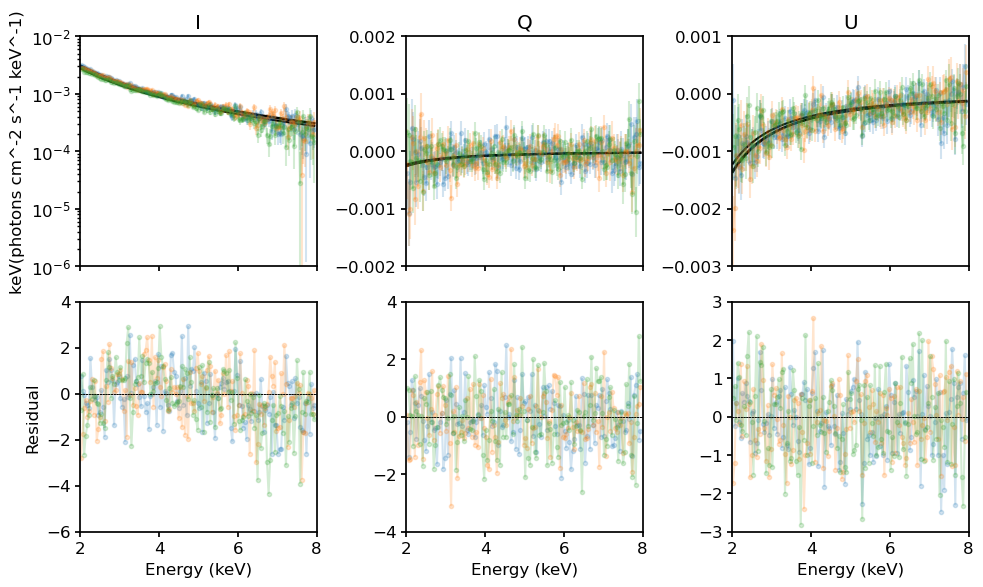

In [36]:
Plot.device='/null'
#Plot.device = "/xs"
Plot.xAxis = "KeV"
#Plot.add = True
Plot.background = True
Plot.xLog = True
Plot.yLog = True  
Plot("uf chi")
# Plot('lda')
color=['C0','C1','C2','C3']
fig, ax = plt.subplots(2,3, figsize=(10,6),sharex=True)
for gi in np.arange(AllData.nGroups): 
#     print(gi+1)
    i = int(gi/3)
    j = gi%3
    x = Plot.x(int(gi+1))
    y = Plot.y(int(gi+1))
    xerr = Plot.xErr(int(gi+1))
    yerr = Plot.yErr(int(gi+1))
    model = Plot.model(int(gi+1))
#     bkg = Plot.backgroundVals(1)
    
    ax[0][j].errorbar(x, y, xerr=xerr, yerr=yerr, color=color[i], marker='.', alpha=0.2)
    ax[0][j].plot(x, model, color='k', linestyle='-')
#     ax[0][0].errorbar(x, bkg, xerr=xerr, fmt='k.', alpha=0.2)

    # #residual
    ax[1][j].plot(x, (np.array(y)-np.array(model))/yerr, 
                  color=color[i], marker='.', alpha=0.2)
    ax[1][j].axhline(y=0, linestyle='--', color='k', linewidth=0.5)
        
ax[0][0].set(yscale='log')

for k in np.arange(3):
    ax[1][k].set(xlabel='Energy (keV)')
ax[0][0].set(title='I')
ax[0][1].set(title='Q')
ax[0][2].set(title='U')

ax[0][0].set(ylabel='keV(photons cm^-2 s^-1 keV^-1)')
ax[1][0].set(ylabel='Residual')
plt.tight_layout()
plt.savefig(OBsid + '.jpg',dpi=300)

### ixpeobssim

In [37]:
# Ixpeobssim_degree = [0, 0, 0, 0, 0, 0, 0]
# Ixpeobssim_angle1 = [0, 0, 0, 0, 0, 0, 0]
# Ixpeobssim_angle = [0, 0, 0, 0, 0, 0, 0]
# Ixpeobssim_pderror = [0, 0, 0, 0, 0, 0, 0]
# Ixpeobssim_paerror = [0, 0, 0, 0, 0, 0, 0]
# Ixpeobssim_paerror1 = [0, 0, 0, 0, 0, 0, 0]
# Ixpeobssim_mdp = [0, 0, 0, 0, 0, 0, 0]
# Ixpeobssim_signif = [0, 0, 0, 0, 0, 0, 0]
# E_BIN = [[2., 3.],[3., 4.],[4., 5.],[5., 6.],[6., 7.],[7., 8.],[2., 8.]]
# ## E_BIN = [2., 8.]
# for k in range(7):
#     pmapcube = pipeline.xpbin(*new_SPfile, algorithm='PMAPCUBE',ebinalg='LIST',
#                               ebinning=E_BIN[k], npix=1,xref=TCRVL7,yref=TCRVL8,pixsize = 50,
#                              irfname='ixpe:obssim:v011', overwrite=True) #1 psf
#     polmap_cube = xBinnedPolarizationMapCube.from_file_list(pmapcube)


#     Ixpeobssim_degree[k] = polmap_cube.PD[0]*100
#     Ixpeobssim_pderror[k] = polmap_cube.PD_ERR[0]*100
#     Ixpeobssim_angle1[k] = np.deg2rad(polmap_cube.PA[0])
#     Ixpeobssim_paerror1[k] = np.deg2rad(polmap_cube.PA_ERR[0])
#     Ixpeobssim_mdp[k] = polmap_cube.MDP_99[0]*100
#     Ixpeobssim_signif[k] = polmap_cube.SIGNIF[0]
# for i in range(7):
#     Ixpeobssim_angle[i]=np.rad2deg(Ixpeobssim_angle1[i])
#     Ixpeobssim_paerror[i]=np.rad2deg(Ixpeobssim_paerror1[i])
# print(Ixpeobssim_degree)
# print(Ixpeobssim_pderror)
# print(Ixpeobssim_angle)
# print(Ixpeobssim_paerror)
# print(Ixpeobssim_mdp)
# print(Ixpeobssim_signif)

In [38]:
#扣背景
Ixpeobssim_degree = [0, 0, 0, 0, 0, 0, 0]
Ixpeobssim_angle1 = [0, 0, 0, 0, 0, 0, 0]
Ixpeobssim_angle = [0, 0, 0, 0, 0, 0, 0]
Ixpeobssim_pderror = [0, 0, 0, 0, 0, 0, 0]
Ixpeobssim_paerror = [0, 0, 0, 0, 0, 0, 0]
Ixpeobssim_paerror1 = [0, 0, 0, 0, 0, 0, 0]
Ixpeobssim_mdp = [0, 0, 0, 0, 0, 0, 0]
Ixpeobssim_signif = [0, 0, 0, 0, 0, 0, 0]
E_BIN = [[2., 3.],[3., 4.],[4., 5.],[5., 6.],[6., 7.],[7., 8.],[2., 8.]]
#Initial1_file  result_list
src_backscale = np.pi*(radius)**2/(12.9*12.9*3600)
bkg_backscale = np.pi*(radius_outer**2-radius_inner**2)/(12.9*12.9*3600)
beta=src_backscale/bkg_backscale
for k in range(7):
    t_source = pipeline.xpselect(*result_list,regfile='source.reg',suffix='source',overwrite=True,)


    pmapcube_source = pipeline.xpbin(*t_source, algorithm='PCUBE',ebinalg='LIST',
                          ebinning=E_BIN[k], npix=1,xref=TCRVL7,yref=TCRVL8,pixsize = radius*2,
                         irfname='ixpe:obssim:v012', overwrite=True)

    polmap_cube_source = xBinnedPolarizationCube.from_file_list(pmapcube_source)
    for f in pmapcube_source:
        fits.setval(f, 'AREASCAL', value = 1, ext=0)
        fits.setval(f, 'BACKSCAL', value = src_backscale, ext=0)
    ####bkg
    t_bkg = pipeline.xpselect(*result_list, regfile='background.reg',suffix='bkg',overwrite=True,)
    pmapcube_bkg = pipeline.xpbin(*t_bkg, algorithm='PCUBE',ebinalg='LIST',
                          ebinning=E_BIN[k], npix=1,xref=TCRVL7,yref=TCRVL8,pixsize = radius_outer*20,
                         irfname='ixpe:obssim:v012', overwrite=True)
    for f in pmapcube_bkg:
        fits.setval(f, 'AREASCAL', value = 1, ext=0)
        fits.setval(f, 'BACKSCAL', value = bkg_backscale, ext=0)
    polmap_cube_bkg = xBinnedPolarizationCube.from_file_list(pmapcube_bkg)

    ###background substraction
    polmap_cube_bkg *= beta
    polmap_cube_source -= polmap_cube_bkg
    
    Ixpeobssim_degree[k]=polmap_cube_source.PD[0]*100
    Ixpeobssim_pderror[k]=polmap_cube_source.PD_ERR[0]*100
    Ixpeobssim_angle[k]=polmap_cube_source.PA[0]
    Ixpeobssim_paerror[k]=polmap_cube_source.PA_ERR[0]
    Ixpeobssim_signif[k]=polmap_cube_source.SIGNIF[0]
    Ixpeobssim_mdp[k]=polmap_cube_source.MDP_99[0]*100
    
    

print(Ixpeobssim_degree)
print(Ixpeobssim_pderror)
print(Ixpeobssim_angle)
print(Ixpeobssim_paerror)
print(Ixpeobssim_signif)
print(Ixpeobssim_mdp)  

>>> Opening input event file bkg_ixpe01001299_det1_evt2_v03_picorr_wcscorr.fits...



    Welcome to ixpeobssim 30.2.2 (built on Wed, 15 Feb 2023 10:22:34 +0100).

    Copyright (C) 2015--2023, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: bkg_ixpe01001299_det1_evt2_v03_picorr_wcscorr.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      62   ()      
  1  EVENTS        1 BinTableHDU    214   785892R x 10C   [J, D, 16X, 16X, J, E, E, E, D, D]   
  2  GTI           1 BinTableHDU     55   1002R x 2C   [D, D]   


>>> Reading WCS information from the EVENTS HDU...
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 128.83604  -45.17643  
CRPIX : 302.4  315.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222  0.00072222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Event file comes without a MONTE_CARLO extension.
>>> Re-building the ROI table...
>>> Input file has no ROITABLE extension, cannot rebuild ROI table.
>>> Setting outfile to bkg_ixpe01001299_det1_evt2_v03_picorr_wcscorr_source.fits...
>>> Running event selection with kwargs {'filelist': ['bkg_ixpe01001299_det1_evt2_v03_picorr_wcscorr.fits', 'bkg_ixpe01001299_det2_evt2_v03_picorr_wcscorr.fits', 'bkg_ixpe01001299_det3_evt2_v03_picorr_wcscorr.fits'], 'suffix': 'source', 'tmin': None, 'tmax': None, 'tinvert': False, 'phasemin': None, 'phasemax': None, 'phaseinvert': False, 'emin': None, 'emax': None, 'einvert': False, 'ra': None, 'dec': None, 'rad': None, 'inn

Filename: bkg_ixpe01001299_det1_evt2_v03_picorr_wcscorr.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      72   ()      
  1  EVENTS        1 BinTableHDU    214   131583R x 10C   ['J', 'D', '16X', '16X', 'J', 'E', 'E', 'E', 'D', 'D']   
  2  GTI           1 BinTableHDU     55   1002R x 2C   [D, D]   


>>> Done.
>>> Opening input event file bkg_ixpe01001299_det2_evt2_v03_picorr_wcscorr.fits...


Filename: bkg_ixpe01001299_det2_evt2_v03_picorr_wcscorr.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      62   ()      
  1  EVENTS        1 BinTableHDU    214   798950R x 10C   [J, D, 16X, 16X, J, E, E, E, D, D]   
  2  GTI           1 BinTableHDU     55   1005R x 2C   [D, D]   


>>> Reading WCS information from the EVENTS HDU...
image-header keyword DATE-OBS in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFF in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFI in binary table. [astropy.wcs.wcs]
image-header keyword TELAPSE in binary table. [astropy.wcs.wcs]
image-header keyword TIMESYS in binary table. [astropy.wcs.wcs]
image-header keyword TIMEUNIT in binary table. [astropy.wcs.wcs]
image-header keyword TSTART in binary table. [astropy.wcs.wcs]
image-header keyword TSTOP in binary table. [astropy.wcs.wcs]
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 128.83604  -45.17643  
CRPIX : 302.4  315.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222  0.00072222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Event file comes without a MONTE_CARLO extension.
>>> Re-building the ROI table...
>>> Input file has no ROITABLE extension, cannot rebuild ROI table.
>>

Filename: bkg_ixpe01001299_det2_evt2_v03_picorr_wcscorr.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      72   ()      
  1  EVENTS        1 BinTableHDU    214   123320R x 10C   ['J', 'D', '16X', '16X', 'J', 'E', 'E', 'E', 'D', 'D']   
  2  GTI           1 BinTableHDU     55   1005R x 2C   [D, D]   


>>> Done.
>>> Opening input event file bkg_ixpe01001299_det3_evt2_v03_picorr_wcscorr.fits...


Filename: bkg_ixpe01001299_det3_evt2_v03_picorr_wcscorr.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      62   ()      
  1  EVENTS        1 BinTableHDU    214   762992R x 10C   [J, D, 16X, 16X, J, E, E, E, D, D]   
  2  GTI           1 BinTableHDU     55   1003R x 2C   [D, D]   


>>> Reading WCS information from the EVENTS HDU...
image-header keyword DATE-OBS in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFF in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFI in binary table. [astropy.wcs.wcs]
image-header keyword TELAPSE in binary table. [astropy.wcs.wcs]
image-header keyword TIMESYS in binary table. [astropy.wcs.wcs]
image-header keyword TIMEUNIT in binary table. [astropy.wcs.wcs]
image-header keyword TSTART in binary table. [astropy.wcs.wcs]
image-header keyword TSTOP in binary table. [astropy.wcs.wcs]
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 128.83604  -45.17643  
CRPIX : 302.4  315.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222  0.00072222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Event file comes without a MONTE_CARLO extension.
>>> Re-building the ROI table...
>>> Input file has no ROITABLE extension, cannot rebuild ROI table.
>>

Filename: bkg_ixpe01001299_det3_evt2_v03_picorr_wcscorr.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      72   ()      
  1  EVENTS        1 BinTableHDU    214   119354R x 10C   ['J', 'D', '16X', '16X', 'J', 'E', 'E', 'E', 'D', 'D']   
  2  GTI           1 BinTableHDU     55   1003R x 2C   [D, D]   


>>> Done.
>>> Closing event file bkg_ixpe01001299_det3_evt2_v03_picorr_wcscorr.fits...
>>> Opening input event file bkg_ixpe01001299_det1_evt2_v03_picorr_wcscorr_source.fits...



    Welcome to ixpeobssim 30.2.2 (built on Wed, 15 Feb 2023 10:22:34 +0100).

    Copyright (C) 2015--2023, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: bkg_ixpe01001299_det1_evt2_v03_picorr_wcscorr_source.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      72   ()      
  1  EVENTS        1 BinTableHDU    214   131583R x 10C   [J, D, 16X, 16X, J, E, E, E, D, D]   
  2  GTI           1 BinTableHDU     55   1002R x 2C   [D, D]   


>>> Reading WCS information from the EVENTS HDU...
image-header keyword DATE-OBS in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFF in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFI in binary table. [astropy.wcs.wcs]
image-header keyword TELAPSE in binary table. [astropy.wcs.wcs]
image-header keyword TIMESYS in binary table. [astropy.wcs.wcs]
image-header keyword TIMEUNIT in binary table. [astropy.wcs.wcs]
image-header keyword TSTART in binary table. [astropy.wcs.wcs]
image-header keyword TSTOP in binary table. [astropy.wcs.wcs]
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 128.83604  -45.17643  
CRPIX : 302.4  315.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222  0.00072222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Event file comes without a MONTE_CARLO extension.
>>> Re-building the ROI table...
>>> Input file has no ROITABLE extension, cannot rebuild ROI table.
>>

Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  POLARIZATION    1 xBinTableHDUPCUBE     87   1R x 27C   ['E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  GTI           1 BinTableHDU     55   1002R x 2C   [D, D]   


>>> Writing PCUBE binned data to bkg_ixpe01001299_det1_evt2_v03_picorr_wcscorr_source_pcube.fits...
>>> Done.
>>> Opening input event file bkg_ixpe01001299_det2_evt2_v03_picorr_wcscorr_source.fits...


Filename: bkg_ixpe01001299_det2_evt2_v03_picorr_wcscorr_source.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      72   ()      
  1  EVENTS        1 BinTableHDU    214   123320R x 10C   [J, D, 16X, 16X, J, E, E, E, D, D]   
  2  GTI           1 BinTableHDU     55   1005R x 2C   [D, D]   


>>> Reading WCS information from the EVENTS HDU...
image-header keyword DATE-OBS in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFF in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFI in binary table. [astropy.wcs.wcs]
image-header keyword TELAPSE in binary table. [astropy.wcs.wcs]
image-header keyword TIMESYS in binary table. [astropy.wcs.wcs]
image-header keyword TIMEUNIT in binary table. [astropy.wcs.wcs]
image-header keyword TSTART in binary table. [astropy.wcs.wcs]
image-header keyword TSTOP in binary table. [astropy.wcs.wcs]
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 128.83604  -45.17643  
CRPIX : 302.4  315.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222  0.00072222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Event file comes without a MONTE_CARLO extension.
>>> Re-building the ROI table...
>>> Input file has no ROITABLE extension, cannot rebuild ROI table.
>>

Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  POLARIZATION    1 xBinTableHDUPCUBE     87   1R x 27C   ['E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  GTI           1 BinTableHDU     55   1005R x 2C   [D, D]   


>>> Writing PCUBE binned data to bkg_ixpe01001299_det2_evt2_v03_picorr_wcscorr_source_pcube.fits...
>>> Done.
>>> Opening input event file bkg_ixpe01001299_det3_evt2_v03_picorr_wcscorr_source.fits...


Filename: bkg_ixpe01001299_det3_evt2_v03_picorr_wcscorr_source.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      72   ()      
  1  EVENTS        1 BinTableHDU    214   119354R x 10C   [J, D, 16X, 16X, J, E, E, E, D, D]   
  2  GTI           1 BinTableHDU     55   1003R x 2C   [D, D]   


>>> Reading WCS information from the EVENTS HDU...
image-header keyword DATE-OBS in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFF in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFI in binary table. [astropy.wcs.wcs]
image-header keyword TELAPSE in binary table. [astropy.wcs.wcs]
image-header keyword TIMESYS in binary table. [astropy.wcs.wcs]
image-header keyword TIMEUNIT in binary table. [astropy.wcs.wcs]
image-header keyword TSTART in binary table. [astropy.wcs.wcs]
image-header keyword TSTOP in binary table. [astropy.wcs.wcs]
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 128.83604  -45.17643  
CRPIX : 302.4  315.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222  0.00072222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Event file comes without a MONTE_CARLO extension.
>>> Re-building the ROI table...
>>> Input file has no ROITABLE extension, cannot rebuild ROI table.
>>

Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  POLARIZATION    1 xBinTableHDUPCUBE     87   1R x 27C   ['E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  GTI           1 BinTableHDU     55   1003R x 2C   [D, D]   


>>> Writing PCUBE binned data to bkg_ixpe01001299_det3_evt2_v03_picorr_wcscorr_source_pcube.fits...
>>> Done.
>>> Closing event file bkg_ixpe01001299_det3_evt2_v03_picorr_wcscorr_source.fits...
>>> Reading (in memory) bkg_ixpe01001299_det1_evt2_v03_picorr_wcscorr_source_pcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  POLARIZATION    1 BinTableHDU     87   1R x 27C   ['E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  GTI           1 BinTableHDU     55   1002R x 2C   ['D', 'D']   


>>> Reading (in memory) bkg_ixpe01001299_det2_evt2_v03_picorr_wcscorr_source_pcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  POLARIZATION    1 BinTableHDU     87   1R x 27C   ['E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  GTI           1 BinTableHDU     55   1005R x 2C   ['D', 'D']   


>>> Reading (in memory) bkg_ixpe01001299_det3_evt2_v03_picorr_wcscorr_source_pcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  POLARIZATION    1 BinTableHDU     87   1R x 27C   ['E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  GTI           1 BinTableHDU     55   1003R x 2C   ['D', 'D']   


>>> Opening input event file bkg_ixpe01001299_det1_evt2_v03_picorr_wcscorr.fits...



    Welcome to ixpeobssim 30.2.2 (built on Wed, 15 Feb 2023 10:22:34 +0100).

    Copyright (C) 2015--2023, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: bkg_ixpe01001299_det1_evt2_v03_picorr_wcscorr.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      62   ()      
  1  EVENTS        1 BinTableHDU    214   785892R x 10C   [J, D, 16X, 16X, J, E, E, E, D, D]   
  2  GTI           1 BinTableHDU     55   1002R x 2C   [D, D]   


>>> Reading WCS information from the EVENTS HDU...
image-header keyword DATE-OBS in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFF in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFI in binary table. [astropy.wcs.wcs]
image-header keyword TELAPSE in binary table. [astropy.wcs.wcs]
image-header keyword TIMESYS in binary table. [astropy.wcs.wcs]
image-header keyword TIMEUNIT in binary table. [astropy.wcs.wcs]
image-header keyword TSTART in binary table. [astropy.wcs.wcs]
image-header keyword TSTOP in binary table. [astropy.wcs.wcs]
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 128.83604  -45.17643  
CRPIX : 302.4  315.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222  0.00072222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Event file comes without a MONTE_CARLO extension.
>>> Re-building the ROI table...
>>> Input file has no ROITABLE extension, cannot rebuild ROI table.
>>

Filename: bkg_ixpe01001299_det1_evt2_v03_picorr_wcscorr.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      72   ()      
  1  EVENTS        1 BinTableHDU    214   169383R x 10C   ['J', 'D', '16X', '16X', 'J', 'E', 'E', 'E', 'D', 'D']   
  2  GTI           1 BinTableHDU     55   1002R x 2C   [D, D]   


>>> Done.
>>> Opening input event file bkg_ixpe01001299_det2_evt2_v03_picorr_wcscorr.fits...


Filename: bkg_ixpe01001299_det2_evt2_v03_picorr_wcscorr.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      62   ()      
  1  EVENTS        1 BinTableHDU    214   798950R x 10C   [J, D, 16X, 16X, J, E, E, E, D, D]   
  2  GTI           1 BinTableHDU     55   1005R x 2C   [D, D]   


>>> Reading WCS information from the EVENTS HDU...
image-header keyword DATE-OBS in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFF in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFI in binary table. [astropy.wcs.wcs]
image-header keyword TELAPSE in binary table. [astropy.wcs.wcs]
image-header keyword TIMESYS in binary table. [astropy.wcs.wcs]
image-header keyword TIMEUNIT in binary table. [astropy.wcs.wcs]
image-header keyword TSTART in binary table. [astropy.wcs.wcs]
image-header keyword TSTOP in binary table. [astropy.wcs.wcs]
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 128.83604  -45.17643  
CRPIX : 302.4  315.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222  0.00072222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Event file comes without a MONTE_CARLO extension.
>>> Re-building the ROI table...
>>> Input file has no ROITABLE extension, cannot rebuild ROI table.
>>

Filename: bkg_ixpe01001299_det2_evt2_v03_picorr_wcscorr.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      72   ()      
  1  EVENTS        1 BinTableHDU    214   175132R x 10C   ['J', 'D', '16X', '16X', 'J', 'E', 'E', 'E', 'D', 'D']   
  2  GTI           1 BinTableHDU     55   1005R x 2C   [D, D]   


>>> Done.
>>> Opening input event file bkg_ixpe01001299_det3_evt2_v03_picorr_wcscorr.fits...


Filename: bkg_ixpe01001299_det3_evt2_v03_picorr_wcscorr.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      62   ()      
  1  EVENTS        1 BinTableHDU    214   762992R x 10C   [J, D, 16X, 16X, J, E, E, E, D, D]   
  2  GTI           1 BinTableHDU     55   1003R x 2C   [D, D]   


>>> Reading WCS information from the EVENTS HDU...
image-header keyword DATE-OBS in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFF in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFI in binary table. [astropy.wcs.wcs]
image-header keyword TELAPSE in binary table. [astropy.wcs.wcs]
image-header keyword TIMESYS in binary table. [astropy.wcs.wcs]
image-header keyword TIMEUNIT in binary table. [astropy.wcs.wcs]
image-header keyword TSTART in binary table. [astropy.wcs.wcs]
image-header keyword TSTOP in binary table. [astropy.wcs.wcs]
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 128.83604  -45.17643  
CRPIX : 302.4  315.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222  0.00072222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Event file comes without a MONTE_CARLO extension.
>>> Re-building the ROI table...
>>> Input file has no ROITABLE extension, cannot rebuild ROI table.
>>

Filename: bkg_ixpe01001299_det3_evt2_v03_picorr_wcscorr.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      72   ()      
  1  EVENTS        1 BinTableHDU    214   168773R x 10C   ['J', 'D', '16X', '16X', 'J', 'E', 'E', 'E', 'D', 'D']   
  2  GTI           1 BinTableHDU     55   1003R x 2C   [D, D]   


>>> Done.
>>> Closing event file bkg_ixpe01001299_det3_evt2_v03_picorr_wcscorr.fits...
>>> Opening input event file bkg_ixpe01001299_det1_evt2_v03_picorr_wcscorr_bkg.fits...



    Welcome to ixpeobssim 30.2.2 (built on Wed, 15 Feb 2023 10:22:34 +0100).

    Copyright (C) 2015--2023, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: bkg_ixpe01001299_det1_evt2_v03_picorr_wcscorr_bkg.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      72   ()      
  1  EVENTS        1 BinTableHDU    214   169383R x 10C   [J, D, 16X, 16X, J, E, E, E, D, D]   
  2  GTI           1 BinTableHDU     55   1002R x 2C   [D, D]   


>>> Reading WCS information from the EVENTS HDU...
image-header keyword DATE-OBS in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFF in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFI in binary table. [astropy.wcs.wcs]
image-header keyword TELAPSE in binary table. [astropy.wcs.wcs]
image-header keyword TIMESYS in binary table. [astropy.wcs.wcs]
image-header keyword TIMEUNIT in binary table. [astropy.wcs.wcs]
image-header keyword TSTART in binary table. [astropy.wcs.wcs]
image-header keyword TSTOP in binary table. [astropy.wcs.wcs]
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 128.83604  -45.17643  
CRPIX : 302.4  315.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222  0.00072222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Event file comes without a MONTE_CARLO extension.
>>> Re-building the ROI table...
>>> Input file has no ROITABLE extension, cannot rebuild ROI table.
>>

Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  POLARIZATION    1 xBinTableHDUPCUBE     87   1R x 27C   ['E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  GTI           1 BinTableHDU     55   1002R x 2C   [D, D]   


>>> Writing PCUBE binned data to bkg_ixpe01001299_det1_evt2_v03_picorr_wcscorr_bkg_pcube.fits...
>>> Done.
>>> Opening input event file bkg_ixpe01001299_det2_evt2_v03_picorr_wcscorr_bkg.fits...


Filename: bkg_ixpe01001299_det2_evt2_v03_picorr_wcscorr_bkg.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      72   ()      
  1  EVENTS        1 BinTableHDU    214   175132R x 10C   [J, D, 16X, 16X, J, E, E, E, D, D]   
  2  GTI           1 BinTableHDU     55   1005R x 2C   [D, D]   


>>> Reading WCS information from the EVENTS HDU...
image-header keyword DATE-OBS in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFF in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFI in binary table. [astropy.wcs.wcs]
image-header keyword TELAPSE in binary table. [astropy.wcs.wcs]
image-header keyword TIMESYS in binary table. [astropy.wcs.wcs]
image-header keyword TIMEUNIT in binary table. [astropy.wcs.wcs]
image-header keyword TSTART in binary table. [astropy.wcs.wcs]
image-header keyword TSTOP in binary table. [astropy.wcs.wcs]
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 128.83604  -45.17643  
CRPIX : 302.4  315.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222  0.00072222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Event file comes without a MONTE_CARLO extension.
>>> Re-building the ROI table...
>>> Input file has no ROITABLE extension, cannot rebuild ROI table.
>>

Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  POLARIZATION    1 xBinTableHDUPCUBE     87   1R x 27C   ['E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  GTI           1 BinTableHDU     55   1005R x 2C   [D, D]   


>>> Writing PCUBE binned data to bkg_ixpe01001299_det2_evt2_v03_picorr_wcscorr_bkg_pcube.fits...
>>> Done.
>>> Opening input event file bkg_ixpe01001299_det3_evt2_v03_picorr_wcscorr_bkg.fits...


Filename: bkg_ixpe01001299_det3_evt2_v03_picorr_wcscorr_bkg.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      72   ()      
  1  EVENTS        1 BinTableHDU    214   168773R x 10C   [J, D, 16X, 16X, J, E, E, E, D, D]   
  2  GTI           1 BinTableHDU     55   1003R x 2C   [D, D]   


>>> Reading WCS information from the EVENTS HDU...
image-header keyword DATE-OBS in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFF in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFI in binary table. [astropy.wcs.wcs]
image-header keyword TELAPSE in binary table. [astropy.wcs.wcs]
image-header keyword TIMESYS in binary table. [astropy.wcs.wcs]
image-header keyword TIMEUNIT in binary table. [astropy.wcs.wcs]
image-header keyword TSTART in binary table. [astropy.wcs.wcs]
image-header keyword TSTOP in binary table. [astropy.wcs.wcs]
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 128.83604  -45.17643  
CRPIX : 302.4  315.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222  0.00072222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Event file comes without a MONTE_CARLO extension.
>>> Re-building the ROI table...
>>> Input file has no ROITABLE extension, cannot rebuild ROI table.
>>

Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  POLARIZATION    1 xBinTableHDUPCUBE     87   1R x 27C   ['E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  GTI           1 BinTableHDU     55   1003R x 2C   [D, D]   


>>> Writing PCUBE binned data to bkg_ixpe01001299_det3_evt2_v03_picorr_wcscorr_bkg_pcube.fits...
>>> Done.
>>> Closing event file bkg_ixpe01001299_det3_evt2_v03_picorr_wcscorr_bkg.fits...
>>> Reading (in memory) bkg_ixpe01001299_det1_evt2_v03_picorr_wcscorr_bkg_pcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      39   ()      
  1  POLARIZATION    1 BinTableHDU     87   1R x 27C   ['E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  GTI           1 BinTableHDU     55   1002R x 2C   ['D', 'D']   


>>> Reading (in memory) bkg_ixpe01001299_det2_evt2_v03_picorr_wcscorr_bkg_pcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      39   ()      
  1  POLARIZATION    1 BinTableHDU     87   1R x 27C   ['E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  GTI           1 BinTableHDU     55   1005R x 2C   ['D', 'D']   


>>> Reading (in memory) bkg_ixpe01001299_det3_evt2_v03_picorr_wcscorr_bkg_pcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      39   ()      
  1  POLARIZATION    1 BinTableHDU     87   1R x 27C   ['E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  GTI           1 BinTableHDU     55   1003R x 2C   ['D', 'D']   


>>> Opening input event file bkg_ixpe01001299_det1_evt2_v03_picorr_wcscorr.fits...



    Welcome to ixpeobssim 30.2.2 (built on Wed, 15 Feb 2023 10:22:34 +0100).

    Copyright (C) 2015--2023, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: bkg_ixpe01001299_det1_evt2_v03_picorr_wcscorr.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      62   ()      
  1  EVENTS        1 BinTableHDU    214   785892R x 10C   [J, D, 16X, 16X, J, E, E, E, D, D]   
  2  GTI           1 BinTableHDU     55   1002R x 2C   [D, D]   


>>> Reading WCS information from the EVENTS HDU...
image-header keyword DATE-OBS in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFF in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFI in binary table. [astropy.wcs.wcs]
image-header keyword TELAPSE in binary table. [astropy.wcs.wcs]
image-header keyword TIMESYS in binary table. [astropy.wcs.wcs]
image-header keyword TIMEUNIT in binary table. [astropy.wcs.wcs]
image-header keyword TSTART in binary table. [astropy.wcs.wcs]
image-header keyword TSTOP in binary table. [astropy.wcs.wcs]
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 128.83604  -45.17643  
CRPIX : 302.4  315.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222  0.00072222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Event file comes without a MONTE_CARLO extension.
>>> Re-building the ROI table...
>>> Input file has no ROITABLE extension, cannot rebuild ROI table.
>>

Filename: bkg_ixpe01001299_det1_evt2_v03_picorr_wcscorr.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      72   ()      
  1  EVENTS        1 BinTableHDU    214   131583R x 10C   ['J', 'D', '16X', '16X', 'J', 'E', 'E', 'E', 'D', 'D']   
  2  GTI           1 BinTableHDU     55   1002R x 2C   [D, D]   


>>> Done.
>>> Opening input event file bkg_ixpe01001299_det2_evt2_v03_picorr_wcscorr.fits...


Filename: bkg_ixpe01001299_det2_evt2_v03_picorr_wcscorr.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      62   ()      
  1  EVENTS        1 BinTableHDU    214   798950R x 10C   [J, D, 16X, 16X, J, E, E, E, D, D]   
  2  GTI           1 BinTableHDU     55   1005R x 2C   [D, D]   


>>> Reading WCS information from the EVENTS HDU...
image-header keyword DATE-OBS in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFF in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFI in binary table. [astropy.wcs.wcs]
image-header keyword TELAPSE in binary table. [astropy.wcs.wcs]
image-header keyword TIMESYS in binary table. [astropy.wcs.wcs]
image-header keyword TIMEUNIT in binary table. [astropy.wcs.wcs]
image-header keyword TSTART in binary table. [astropy.wcs.wcs]
image-header keyword TSTOP in binary table. [astropy.wcs.wcs]
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 128.83604  -45.17643  
CRPIX : 302.4  315.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222  0.00072222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Event file comes without a MONTE_CARLO extension.
>>> Re-building the ROI table...
>>> Input file has no ROITABLE extension, cannot rebuild ROI table.
>>

Filename: bkg_ixpe01001299_det2_evt2_v03_picorr_wcscorr.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      72   ()      
  1  EVENTS        1 BinTableHDU    214   123320R x 10C   ['J', 'D', '16X', '16X', 'J', 'E', 'E', 'E', 'D', 'D']   
  2  GTI           1 BinTableHDU     55   1005R x 2C   [D, D]   


>>> Done.
>>> Opening input event file bkg_ixpe01001299_det3_evt2_v03_picorr_wcscorr.fits...


Filename: bkg_ixpe01001299_det3_evt2_v03_picorr_wcscorr.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      62   ()      
  1  EVENTS        1 BinTableHDU    214   762992R x 10C   [J, D, 16X, 16X, J, E, E, E, D, D]   
  2  GTI           1 BinTableHDU     55   1003R x 2C   [D, D]   


>>> Reading WCS information from the EVENTS HDU...
image-header keyword DATE-OBS in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFF in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFI in binary table. [astropy.wcs.wcs]
image-header keyword TELAPSE in binary table. [astropy.wcs.wcs]
image-header keyword TIMESYS in binary table. [astropy.wcs.wcs]
image-header keyword TIMEUNIT in binary table. [astropy.wcs.wcs]
image-header keyword TSTART in binary table. [astropy.wcs.wcs]
image-header keyword TSTOP in binary table. [astropy.wcs.wcs]
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 128.83604  -45.17643  
CRPIX : 302.4  315.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222  0.00072222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Event file comes without a MONTE_CARLO extension.
>>> Re-building the ROI table...
>>> Input file has no ROITABLE extension, cannot rebuild ROI table.
>>

Filename: bkg_ixpe01001299_det3_evt2_v03_picorr_wcscorr.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      72   ()      
  1  EVENTS        1 BinTableHDU    214   119354R x 10C   ['J', 'D', '16X', '16X', 'J', 'E', 'E', 'E', 'D', 'D']   
  2  GTI           1 BinTableHDU     55   1003R x 2C   [D, D]   


>>> Done.
>>> Closing event file bkg_ixpe01001299_det3_evt2_v03_picorr_wcscorr.fits...
>>> Opening input event file bkg_ixpe01001299_det1_evt2_v03_picorr_wcscorr_source.fits...



    Welcome to ixpeobssim 30.2.2 (built on Wed, 15 Feb 2023 10:22:34 +0100).

    Copyright (C) 2015--2023, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: bkg_ixpe01001299_det1_evt2_v03_picorr_wcscorr_source.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      72   ()      
  1  EVENTS        1 BinTableHDU    214   131583R x 10C   [J, D, 16X, 16X, J, E, E, E, D, D]   
  2  GTI           1 BinTableHDU     55   1002R x 2C   [D, D]   


>>> Reading WCS information from the EVENTS HDU...
image-header keyword DATE-OBS in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFF in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFI in binary table. [astropy.wcs.wcs]
image-header keyword TELAPSE in binary table. [astropy.wcs.wcs]
image-header keyword TIMESYS in binary table. [astropy.wcs.wcs]
image-header keyword TIMEUNIT in binary table. [astropy.wcs.wcs]
image-header keyword TSTART in binary table. [astropy.wcs.wcs]
image-header keyword TSTOP in binary table. [astropy.wcs.wcs]
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 128.83604  -45.17643  
CRPIX : 302.4  315.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222  0.00072222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Event file comes without a MONTE_CARLO extension.
>>> Re-building the ROI table...
>>> Input file has no ROITABLE extension, cannot rebuild ROI table.
>>

Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  POLARIZATION    1 xBinTableHDUPCUBE     87   1R x 27C   ['E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  GTI           1 BinTableHDU     55   1002R x 2C   [D, D]   


>>> Writing PCUBE binned data to bkg_ixpe01001299_det1_evt2_v03_picorr_wcscorr_source_pcube.fits...
>>> Done.
>>> Opening input event file bkg_ixpe01001299_det2_evt2_v03_picorr_wcscorr_source.fits...


Filename: bkg_ixpe01001299_det2_evt2_v03_picorr_wcscorr_source.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      72   ()      
  1  EVENTS        1 BinTableHDU    214   123320R x 10C   [J, D, 16X, 16X, J, E, E, E, D, D]   
  2  GTI           1 BinTableHDU     55   1005R x 2C   [D, D]   


>>> Reading WCS information from the EVENTS HDU...
image-header keyword DATE-OBS in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFF in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFI in binary table. [astropy.wcs.wcs]
image-header keyword TELAPSE in binary table. [astropy.wcs.wcs]
image-header keyword TIMESYS in binary table. [astropy.wcs.wcs]
image-header keyword TIMEUNIT in binary table. [astropy.wcs.wcs]
image-header keyword TSTART in binary table. [astropy.wcs.wcs]
image-header keyword TSTOP in binary table. [astropy.wcs.wcs]
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 128.83604  -45.17643  
CRPIX : 302.4  315.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222  0.00072222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Event file comes without a MONTE_CARLO extension.
>>> Re-building the ROI table...
>>> Input file has no ROITABLE extension, cannot rebuild ROI table.
>>

Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  POLARIZATION    1 xBinTableHDUPCUBE     87   1R x 27C   ['E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  GTI           1 BinTableHDU     55   1005R x 2C   [D, D]   


>>> Writing PCUBE binned data to bkg_ixpe01001299_det2_evt2_v03_picorr_wcscorr_source_pcube.fits...
>>> Done.
>>> Opening input event file bkg_ixpe01001299_det3_evt2_v03_picorr_wcscorr_source.fits...


Filename: bkg_ixpe01001299_det3_evt2_v03_picorr_wcscorr_source.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      72   ()      
  1  EVENTS        1 BinTableHDU    214   119354R x 10C   [J, D, 16X, 16X, J, E, E, E, D, D]   
  2  GTI           1 BinTableHDU     55   1003R x 2C   [D, D]   


>>> Reading WCS information from the EVENTS HDU...
image-header keyword DATE-OBS in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFF in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFI in binary table. [astropy.wcs.wcs]
image-header keyword TELAPSE in binary table. [astropy.wcs.wcs]
image-header keyword TIMESYS in binary table. [astropy.wcs.wcs]
image-header keyword TIMEUNIT in binary table. [astropy.wcs.wcs]
image-header keyword TSTART in binary table. [astropy.wcs.wcs]
image-header keyword TSTOP in binary table. [astropy.wcs.wcs]
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 128.83604  -45.17643  
CRPIX : 302.4  315.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222  0.00072222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Event file comes without a MONTE_CARLO extension.
>>> Re-building the ROI table...
>>> Input file has no ROITABLE extension, cannot rebuild ROI table.
>>

Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  POLARIZATION    1 xBinTableHDUPCUBE     87   1R x 27C   ['E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  GTI           1 BinTableHDU     55   1003R x 2C   [D, D]   


>>> Writing PCUBE binned data to bkg_ixpe01001299_det3_evt2_v03_picorr_wcscorr_source_pcube.fits...
>>> Done.
>>> Closing event file bkg_ixpe01001299_det3_evt2_v03_picorr_wcscorr_source.fits...
>>> Reading (in memory) bkg_ixpe01001299_det1_evt2_v03_picorr_wcscorr_source_pcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  POLARIZATION    1 BinTableHDU     87   1R x 27C   ['E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  GTI           1 BinTableHDU     55   1002R x 2C   ['D', 'D']   


>>> Reading (in memory) bkg_ixpe01001299_det2_evt2_v03_picorr_wcscorr_source_pcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  POLARIZATION    1 BinTableHDU     87   1R x 27C   ['E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  GTI           1 BinTableHDU     55   1005R x 2C   ['D', 'D']   


>>> Reading (in memory) bkg_ixpe01001299_det3_evt2_v03_picorr_wcscorr_source_pcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  POLARIZATION    1 BinTableHDU     87   1R x 27C   ['E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  GTI           1 BinTableHDU     55   1003R x 2C   ['D', 'D']   


>>> Opening input event file bkg_ixpe01001299_det1_evt2_v03_picorr_wcscorr.fits...



    Welcome to ixpeobssim 30.2.2 (built on Wed, 15 Feb 2023 10:22:34 +0100).

    Copyright (C) 2015--2023, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: bkg_ixpe01001299_det1_evt2_v03_picorr_wcscorr.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      62   ()      
  1  EVENTS        1 BinTableHDU    214   785892R x 10C   [J, D, 16X, 16X, J, E, E, E, D, D]   
  2  GTI           1 BinTableHDU     55   1002R x 2C   [D, D]   


>>> Reading WCS information from the EVENTS HDU...
image-header keyword DATE-OBS in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFF in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFI in binary table. [astropy.wcs.wcs]
image-header keyword TELAPSE in binary table. [astropy.wcs.wcs]
image-header keyword TIMESYS in binary table. [astropy.wcs.wcs]
image-header keyword TIMEUNIT in binary table. [astropy.wcs.wcs]
image-header keyword TSTART in binary table. [astropy.wcs.wcs]
image-header keyword TSTOP in binary table. [astropy.wcs.wcs]
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 128.83604  -45.17643  
CRPIX : 302.4  315.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222  0.00072222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Event file comes without a MONTE_CARLO extension.
>>> Re-building the ROI table...
>>> Input file has no ROITABLE extension, cannot rebuild ROI table.
>>

Filename: bkg_ixpe01001299_det1_evt2_v03_picorr_wcscorr.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      72   ()      
  1  EVENTS        1 BinTableHDU    214   169383R x 10C   ['J', 'D', '16X', '16X', 'J', 'E', 'E', 'E', 'D', 'D']   
  2  GTI           1 BinTableHDU     55   1002R x 2C   [D, D]   


>>> Done.
>>> Opening input event file bkg_ixpe01001299_det2_evt2_v03_picorr_wcscorr.fits...


Filename: bkg_ixpe01001299_det2_evt2_v03_picorr_wcscorr.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      62   ()      
  1  EVENTS        1 BinTableHDU    214   798950R x 10C   [J, D, 16X, 16X, J, E, E, E, D, D]   
  2  GTI           1 BinTableHDU     55   1005R x 2C   [D, D]   


>>> Reading WCS information from the EVENTS HDU...
image-header keyword DATE-OBS in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFF in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFI in binary table. [astropy.wcs.wcs]
image-header keyword TELAPSE in binary table. [astropy.wcs.wcs]
image-header keyword TIMESYS in binary table. [astropy.wcs.wcs]
image-header keyword TIMEUNIT in binary table. [astropy.wcs.wcs]
image-header keyword TSTART in binary table. [astropy.wcs.wcs]
image-header keyword TSTOP in binary table. [astropy.wcs.wcs]
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 128.83604  -45.17643  
CRPIX : 302.4  315.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222  0.00072222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Event file comes without a MONTE_CARLO extension.
>>> Re-building the ROI table...
>>> Input file has no ROITABLE extension, cannot rebuild ROI table.
>>

Filename: bkg_ixpe01001299_det2_evt2_v03_picorr_wcscorr.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      72   ()      
  1  EVENTS        1 BinTableHDU    214   175132R x 10C   ['J', 'D', '16X', '16X', 'J', 'E', 'E', 'E', 'D', 'D']   
  2  GTI           1 BinTableHDU     55   1005R x 2C   [D, D]   


>>> Done.
>>> Opening input event file bkg_ixpe01001299_det3_evt2_v03_picorr_wcscorr.fits...


Filename: bkg_ixpe01001299_det3_evt2_v03_picorr_wcscorr.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      62   ()      
  1  EVENTS        1 BinTableHDU    214   762992R x 10C   [J, D, 16X, 16X, J, E, E, E, D, D]   
  2  GTI           1 BinTableHDU     55   1003R x 2C   [D, D]   


>>> Reading WCS information from the EVENTS HDU...
image-header keyword DATE-OBS in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFF in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFI in binary table. [astropy.wcs.wcs]
image-header keyword TELAPSE in binary table. [astropy.wcs.wcs]
image-header keyword TIMESYS in binary table. [astropy.wcs.wcs]
image-header keyword TIMEUNIT in binary table. [astropy.wcs.wcs]
image-header keyword TSTART in binary table. [astropy.wcs.wcs]
image-header keyword TSTOP in binary table. [astropy.wcs.wcs]
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 128.83604  -45.17643  
CRPIX : 302.4  315.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222  0.00072222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Event file comes without a MONTE_CARLO extension.
>>> Re-building the ROI table...
>>> Input file has no ROITABLE extension, cannot rebuild ROI table.
>>

Filename: bkg_ixpe01001299_det3_evt2_v03_picorr_wcscorr.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      72   ()      
  1  EVENTS        1 BinTableHDU    214   168773R x 10C   ['J', 'D', '16X', '16X', 'J', 'E', 'E', 'E', 'D', 'D']   
  2  GTI           1 BinTableHDU     55   1003R x 2C   [D, D]   


>>> Done.
>>> Closing event file bkg_ixpe01001299_det3_evt2_v03_picorr_wcscorr.fits...
>>> Opening input event file bkg_ixpe01001299_det1_evt2_v03_picorr_wcscorr_bkg.fits...



    Welcome to ixpeobssim 30.2.2 (built on Wed, 15 Feb 2023 10:22:34 +0100).

    Copyright (C) 2015--2023, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: bkg_ixpe01001299_det1_evt2_v03_picorr_wcscorr_bkg.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      72   ()      
  1  EVENTS        1 BinTableHDU    214   169383R x 10C   [J, D, 16X, 16X, J, E, E, E, D, D]   
  2  GTI           1 BinTableHDU     55   1002R x 2C   [D, D]   


>>> Reading WCS information from the EVENTS HDU...
image-header keyword DATE-OBS in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFF in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFI in binary table. [astropy.wcs.wcs]
image-header keyword TELAPSE in binary table. [astropy.wcs.wcs]
image-header keyword TIMESYS in binary table. [astropy.wcs.wcs]
image-header keyword TIMEUNIT in binary table. [astropy.wcs.wcs]
image-header keyword TSTART in binary table. [astropy.wcs.wcs]
image-header keyword TSTOP in binary table. [astropy.wcs.wcs]
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 128.83604  -45.17643  
CRPIX : 302.4  315.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222  0.00072222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Event file comes without a MONTE_CARLO extension.
>>> Re-building the ROI table...
>>> Input file has no ROITABLE extension, cannot rebuild ROI table.
>>

Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  POLARIZATION    1 xBinTableHDUPCUBE     87   1R x 27C   ['E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  GTI           1 BinTableHDU     55   1002R x 2C   [D, D]   


>>> Writing PCUBE binned data to bkg_ixpe01001299_det1_evt2_v03_picorr_wcscorr_bkg_pcube.fits...
>>> Done.
>>> Opening input event file bkg_ixpe01001299_det2_evt2_v03_picorr_wcscorr_bkg.fits...


Filename: bkg_ixpe01001299_det2_evt2_v03_picorr_wcscorr_bkg.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      72   ()      
  1  EVENTS        1 BinTableHDU    214   175132R x 10C   [J, D, 16X, 16X, J, E, E, E, D, D]   
  2  GTI           1 BinTableHDU     55   1005R x 2C   [D, D]   


>>> Reading WCS information from the EVENTS HDU...
image-header keyword DATE-OBS in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFF in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFI in binary table. [astropy.wcs.wcs]
image-header keyword TELAPSE in binary table. [astropy.wcs.wcs]
image-header keyword TIMESYS in binary table. [astropy.wcs.wcs]
image-header keyword TIMEUNIT in binary table. [astropy.wcs.wcs]
image-header keyword TSTART in binary table. [astropy.wcs.wcs]
image-header keyword TSTOP in binary table. [astropy.wcs.wcs]
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 128.83604  -45.17643  
CRPIX : 302.4  315.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222  0.00072222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Event file comes without a MONTE_CARLO extension.
>>> Re-building the ROI table...
>>> Input file has no ROITABLE extension, cannot rebuild ROI table.
>>

Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  POLARIZATION    1 xBinTableHDUPCUBE     87   1R x 27C   ['E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  GTI           1 BinTableHDU     55   1005R x 2C   [D, D]   


>>> Writing PCUBE binned data to bkg_ixpe01001299_det2_evt2_v03_picorr_wcscorr_bkg_pcube.fits...
>>> Done.
>>> Opening input event file bkg_ixpe01001299_det3_evt2_v03_picorr_wcscorr_bkg.fits...


Filename: bkg_ixpe01001299_det3_evt2_v03_picorr_wcscorr_bkg.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      72   ()      
  1  EVENTS        1 BinTableHDU    214   168773R x 10C   [J, D, 16X, 16X, J, E, E, E, D, D]   
  2  GTI           1 BinTableHDU     55   1003R x 2C   [D, D]   


>>> Reading WCS information from the EVENTS HDU...
image-header keyword DATE-OBS in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFF in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFI in binary table. [astropy.wcs.wcs]
image-header keyword TELAPSE in binary table. [astropy.wcs.wcs]
image-header keyword TIMESYS in binary table. [astropy.wcs.wcs]
image-header keyword TIMEUNIT in binary table. [astropy.wcs.wcs]
image-header keyword TSTART in binary table. [astropy.wcs.wcs]
image-header keyword TSTOP in binary table. [astropy.wcs.wcs]
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 128.83604  -45.17643  
CRPIX : 302.4  315.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222  0.00072222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Event file comes without a MONTE_CARLO extension.
>>> Re-building the ROI table...
>>> Input file has no ROITABLE extension, cannot rebuild ROI table.
>>

Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  POLARIZATION    1 xBinTableHDUPCUBE     87   1R x 27C   ['E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  GTI           1 BinTableHDU     55   1003R x 2C   [D, D]   


>>> Writing PCUBE binned data to bkg_ixpe01001299_det3_evt2_v03_picorr_wcscorr_bkg_pcube.fits...
>>> Done.
>>> Closing event file bkg_ixpe01001299_det3_evt2_v03_picorr_wcscorr_bkg.fits...
>>> Reading (in memory) bkg_ixpe01001299_det1_evt2_v03_picorr_wcscorr_bkg_pcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      39   ()      
  1  POLARIZATION    1 BinTableHDU     87   1R x 27C   ['E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  GTI           1 BinTableHDU     55   1002R x 2C   ['D', 'D']   


>>> Reading (in memory) bkg_ixpe01001299_det2_evt2_v03_picorr_wcscorr_bkg_pcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      39   ()      
  1  POLARIZATION    1 BinTableHDU     87   1R x 27C   ['E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  GTI           1 BinTableHDU     55   1005R x 2C   ['D', 'D']   


>>> Reading (in memory) bkg_ixpe01001299_det3_evt2_v03_picorr_wcscorr_bkg_pcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      39   ()      
  1  POLARIZATION    1 BinTableHDU     87   1R x 27C   ['E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  GTI           1 BinTableHDU     55   1003R x 2C   ['D', 'D']   


>>> Opening input event file bkg_ixpe01001299_det1_evt2_v03_picorr_wcscorr.fits...



    Welcome to ixpeobssim 30.2.2 (built on Wed, 15 Feb 2023 10:22:34 +0100).

    Copyright (C) 2015--2023, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: bkg_ixpe01001299_det1_evt2_v03_picorr_wcscorr.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      62   ()      
  1  EVENTS        1 BinTableHDU    214   785892R x 10C   [J, D, 16X, 16X, J, E, E, E, D, D]   
  2  GTI           1 BinTableHDU     55   1002R x 2C   [D, D]   


>>> Reading WCS information from the EVENTS HDU...
image-header keyword DATE-OBS in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFF in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFI in binary table. [astropy.wcs.wcs]
image-header keyword TELAPSE in binary table. [astropy.wcs.wcs]
image-header keyword TIMESYS in binary table. [astropy.wcs.wcs]
image-header keyword TIMEUNIT in binary table. [astropy.wcs.wcs]
image-header keyword TSTART in binary table. [astropy.wcs.wcs]
image-header keyword TSTOP in binary table. [astropy.wcs.wcs]
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 128.83604  -45.17643  
CRPIX : 302.4  315.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222  0.00072222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Event file comes without a MONTE_CARLO extension.
>>> Re-building the ROI table...
>>> Input file has no ROITABLE extension, cannot rebuild ROI table.
>>

Filename: bkg_ixpe01001299_det1_evt2_v03_picorr_wcscorr.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      72   ()      
  1  EVENTS        1 BinTableHDU    214   131583R x 10C   ['J', 'D', '16X', '16X', 'J', 'E', 'E', 'E', 'D', 'D']   
  2  GTI           1 BinTableHDU     55   1002R x 2C   [D, D]   


>>> Done.
>>> Opening input event file bkg_ixpe01001299_det2_evt2_v03_picorr_wcscorr.fits...


Filename: bkg_ixpe01001299_det2_evt2_v03_picorr_wcscorr.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      62   ()      
  1  EVENTS        1 BinTableHDU    214   798950R x 10C   [J, D, 16X, 16X, J, E, E, E, D, D]   
  2  GTI           1 BinTableHDU     55   1005R x 2C   [D, D]   


>>> Reading WCS information from the EVENTS HDU...
image-header keyword DATE-OBS in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFF in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFI in binary table. [astropy.wcs.wcs]
image-header keyword TELAPSE in binary table. [astropy.wcs.wcs]
image-header keyword TIMESYS in binary table. [astropy.wcs.wcs]
image-header keyword TIMEUNIT in binary table. [astropy.wcs.wcs]
image-header keyword TSTART in binary table. [astropy.wcs.wcs]
image-header keyword TSTOP in binary table. [astropy.wcs.wcs]
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 128.83604  -45.17643  
CRPIX : 302.4  315.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222  0.00072222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Event file comes without a MONTE_CARLO extension.
>>> Re-building the ROI table...
>>> Input file has no ROITABLE extension, cannot rebuild ROI table.
>>

Filename: bkg_ixpe01001299_det2_evt2_v03_picorr_wcscorr.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      72   ()      
  1  EVENTS        1 BinTableHDU    214   123320R x 10C   ['J', 'D', '16X', '16X', 'J', 'E', 'E', 'E', 'D', 'D']   
  2  GTI           1 BinTableHDU     55   1005R x 2C   [D, D]   


>>> Done.
>>> Opening input event file bkg_ixpe01001299_det3_evt2_v03_picorr_wcscorr.fits...


Filename: bkg_ixpe01001299_det3_evt2_v03_picorr_wcscorr.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      62   ()      
  1  EVENTS        1 BinTableHDU    214   762992R x 10C   [J, D, 16X, 16X, J, E, E, E, D, D]   
  2  GTI           1 BinTableHDU     55   1003R x 2C   [D, D]   


>>> Reading WCS information from the EVENTS HDU...
image-header keyword DATE-OBS in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFF in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFI in binary table. [astropy.wcs.wcs]
image-header keyword TELAPSE in binary table. [astropy.wcs.wcs]
image-header keyword TIMESYS in binary table. [astropy.wcs.wcs]
image-header keyword TIMEUNIT in binary table. [astropy.wcs.wcs]
image-header keyword TSTART in binary table. [astropy.wcs.wcs]
image-header keyword TSTOP in binary table. [astropy.wcs.wcs]
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 128.83604  -45.17643  
CRPIX : 302.4  315.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222  0.00072222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Event file comes without a MONTE_CARLO extension.
>>> Re-building the ROI table...
>>> Input file has no ROITABLE extension, cannot rebuild ROI table.
>>

Filename: bkg_ixpe01001299_det3_evt2_v03_picorr_wcscorr.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      72   ()      
  1  EVENTS        1 BinTableHDU    214   119354R x 10C   ['J', 'D', '16X', '16X', 'J', 'E', 'E', 'E', 'D', 'D']   
  2  GTI           1 BinTableHDU     55   1003R x 2C   [D, D]   


>>> Done.
>>> Closing event file bkg_ixpe01001299_det3_evt2_v03_picorr_wcscorr.fits...
>>> Opening input event file bkg_ixpe01001299_det1_evt2_v03_picorr_wcscorr_source.fits...



    Welcome to ixpeobssim 30.2.2 (built on Wed, 15 Feb 2023 10:22:34 +0100).

    Copyright (C) 2015--2023, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: bkg_ixpe01001299_det1_evt2_v03_picorr_wcscorr_source.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      72   ()      
  1  EVENTS        1 BinTableHDU    214   131583R x 10C   [J, D, 16X, 16X, J, E, E, E, D, D]   
  2  GTI           1 BinTableHDU     55   1002R x 2C   [D, D]   


>>> Reading WCS information from the EVENTS HDU...
image-header keyword DATE-OBS in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFF in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFI in binary table. [astropy.wcs.wcs]
image-header keyword TELAPSE in binary table. [astropy.wcs.wcs]
image-header keyword TIMESYS in binary table. [astropy.wcs.wcs]
image-header keyword TIMEUNIT in binary table. [astropy.wcs.wcs]
image-header keyword TSTART in binary table. [astropy.wcs.wcs]
image-header keyword TSTOP in binary table. [astropy.wcs.wcs]
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 128.83604  -45.17643  
CRPIX : 302.4  315.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222  0.00072222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Event file comes without a MONTE_CARLO extension.
>>> Re-building the ROI table...
>>> Input file has no ROITABLE extension, cannot rebuild ROI table.
>>

Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  POLARIZATION    1 xBinTableHDUPCUBE     87   1R x 27C   ['E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  GTI           1 BinTableHDU     55   1002R x 2C   [D, D]   


>>> Writing PCUBE binned data to bkg_ixpe01001299_det1_evt2_v03_picorr_wcscorr_source_pcube.fits...
>>> Done.
>>> Opening input event file bkg_ixpe01001299_det2_evt2_v03_picorr_wcscorr_source.fits...


Filename: bkg_ixpe01001299_det2_evt2_v03_picorr_wcscorr_source.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      72   ()      
  1  EVENTS        1 BinTableHDU    214   123320R x 10C   [J, D, 16X, 16X, J, E, E, E, D, D]   
  2  GTI           1 BinTableHDU     55   1005R x 2C   [D, D]   


>>> Reading WCS information from the EVENTS HDU...
image-header keyword DATE-OBS in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFF in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFI in binary table. [astropy.wcs.wcs]
image-header keyword TELAPSE in binary table. [astropy.wcs.wcs]
image-header keyword TIMESYS in binary table. [astropy.wcs.wcs]
image-header keyword TIMEUNIT in binary table. [astropy.wcs.wcs]
image-header keyword TSTART in binary table. [astropy.wcs.wcs]
image-header keyword TSTOP in binary table. [astropy.wcs.wcs]
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 128.83604  -45.17643  
CRPIX : 302.4  315.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222  0.00072222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Event file comes without a MONTE_CARLO extension.
>>> Re-building the ROI table...
>>> Input file has no ROITABLE extension, cannot rebuild ROI table.
>>

Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  POLARIZATION    1 xBinTableHDUPCUBE     87   1R x 27C   ['E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  GTI           1 BinTableHDU     55   1005R x 2C   [D, D]   


>>> Writing PCUBE binned data to bkg_ixpe01001299_det2_evt2_v03_picorr_wcscorr_source_pcube.fits...
>>> Done.
>>> Opening input event file bkg_ixpe01001299_det3_evt2_v03_picorr_wcscorr_source.fits...


Filename: bkg_ixpe01001299_det3_evt2_v03_picorr_wcscorr_source.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      72   ()      
  1  EVENTS        1 BinTableHDU    214   119354R x 10C   [J, D, 16X, 16X, J, E, E, E, D, D]   
  2  GTI           1 BinTableHDU     55   1003R x 2C   [D, D]   


>>> Reading WCS information from the EVENTS HDU...
image-header keyword DATE-OBS in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFF in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFI in binary table. [astropy.wcs.wcs]
image-header keyword TELAPSE in binary table. [astropy.wcs.wcs]
image-header keyword TIMESYS in binary table. [astropy.wcs.wcs]
image-header keyword TIMEUNIT in binary table. [astropy.wcs.wcs]
image-header keyword TSTART in binary table. [astropy.wcs.wcs]
image-header keyword TSTOP in binary table. [astropy.wcs.wcs]
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 128.83604  -45.17643  
CRPIX : 302.4  315.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222  0.00072222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Event file comes without a MONTE_CARLO extension.
>>> Re-building the ROI table...
>>> Input file has no ROITABLE extension, cannot rebuild ROI table.
>>

Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  POLARIZATION    1 xBinTableHDUPCUBE     87   1R x 27C   ['E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  GTI           1 BinTableHDU     55   1003R x 2C   [D, D]   


>>> Writing PCUBE binned data to bkg_ixpe01001299_det3_evt2_v03_picorr_wcscorr_source_pcube.fits...
>>> Done.
>>> Closing event file bkg_ixpe01001299_det3_evt2_v03_picorr_wcscorr_source.fits...
>>> Reading (in memory) bkg_ixpe01001299_det1_evt2_v03_picorr_wcscorr_source_pcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  POLARIZATION    1 BinTableHDU     87   1R x 27C   ['E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  GTI           1 BinTableHDU     55   1002R x 2C   ['D', 'D']   


>>> Reading (in memory) bkg_ixpe01001299_det2_evt2_v03_picorr_wcscorr_source_pcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  POLARIZATION    1 BinTableHDU     87   1R x 27C   ['E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  GTI           1 BinTableHDU     55   1005R x 2C   ['D', 'D']   


>>> Reading (in memory) bkg_ixpe01001299_det3_evt2_v03_picorr_wcscorr_source_pcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  POLARIZATION    1 BinTableHDU     87   1R x 27C   ['E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  GTI           1 BinTableHDU     55   1003R x 2C   ['D', 'D']   


>>> Opening input event file bkg_ixpe01001299_det1_evt2_v03_picorr_wcscorr.fits...



    Welcome to ixpeobssim 30.2.2 (built on Wed, 15 Feb 2023 10:22:34 +0100).

    Copyright (C) 2015--2023, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: bkg_ixpe01001299_det1_evt2_v03_picorr_wcscorr.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      62   ()      
  1  EVENTS        1 BinTableHDU    214   785892R x 10C   [J, D, 16X, 16X, J, E, E, E, D, D]   
  2  GTI           1 BinTableHDU     55   1002R x 2C   [D, D]   


>>> Reading WCS information from the EVENTS HDU...
image-header keyword DATE-OBS in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFF in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFI in binary table. [astropy.wcs.wcs]
image-header keyword TELAPSE in binary table. [astropy.wcs.wcs]
image-header keyword TIMESYS in binary table. [astropy.wcs.wcs]
image-header keyword TIMEUNIT in binary table. [astropy.wcs.wcs]
image-header keyword TSTART in binary table. [astropy.wcs.wcs]
image-header keyword TSTOP in binary table. [astropy.wcs.wcs]
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 128.83604  -45.17643  
CRPIX : 302.4  315.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222  0.00072222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Event file comes without a MONTE_CARLO extension.
>>> Re-building the ROI table...
>>> Input file has no ROITABLE extension, cannot rebuild ROI table.
>>

Filename: bkg_ixpe01001299_det1_evt2_v03_picorr_wcscorr.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      72   ()      
  1  EVENTS        1 BinTableHDU    214   169383R x 10C   ['J', 'D', '16X', '16X', 'J', 'E', 'E', 'E', 'D', 'D']   
  2  GTI           1 BinTableHDU     55   1002R x 2C   [D, D]   


>>> Done.
>>> Opening input event file bkg_ixpe01001299_det2_evt2_v03_picorr_wcscorr.fits...


Filename: bkg_ixpe01001299_det2_evt2_v03_picorr_wcscorr.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      62   ()      
  1  EVENTS        1 BinTableHDU    214   798950R x 10C   [J, D, 16X, 16X, J, E, E, E, D, D]   
  2  GTI           1 BinTableHDU     55   1005R x 2C   [D, D]   


>>> Reading WCS information from the EVENTS HDU...
image-header keyword DATE-OBS in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFF in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFI in binary table. [astropy.wcs.wcs]
image-header keyword TELAPSE in binary table. [astropy.wcs.wcs]
image-header keyword TIMESYS in binary table. [astropy.wcs.wcs]
image-header keyword TIMEUNIT in binary table. [astropy.wcs.wcs]
image-header keyword TSTART in binary table. [astropy.wcs.wcs]
image-header keyword TSTOP in binary table. [astropy.wcs.wcs]
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 128.83604  -45.17643  
CRPIX : 302.4  315.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222  0.00072222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Event file comes without a MONTE_CARLO extension.
>>> Re-building the ROI table...
>>> Input file has no ROITABLE extension, cannot rebuild ROI table.
>>

Filename: bkg_ixpe01001299_det2_evt2_v03_picorr_wcscorr.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      72   ()      
  1  EVENTS        1 BinTableHDU    214   175132R x 10C   ['J', 'D', '16X', '16X', 'J', 'E', 'E', 'E', 'D', 'D']   
  2  GTI           1 BinTableHDU     55   1005R x 2C   [D, D]   


>>> Done.
>>> Opening input event file bkg_ixpe01001299_det3_evt2_v03_picorr_wcscorr.fits...


Filename: bkg_ixpe01001299_det3_evt2_v03_picorr_wcscorr.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      62   ()      
  1  EVENTS        1 BinTableHDU    214   762992R x 10C   [J, D, 16X, 16X, J, E, E, E, D, D]   
  2  GTI           1 BinTableHDU     55   1003R x 2C   [D, D]   


>>> Reading WCS information from the EVENTS HDU...
image-header keyword DATE-OBS in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFF in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFI in binary table. [astropy.wcs.wcs]
image-header keyword TELAPSE in binary table. [astropy.wcs.wcs]
image-header keyword TIMESYS in binary table. [astropy.wcs.wcs]
image-header keyword TIMEUNIT in binary table. [astropy.wcs.wcs]
image-header keyword TSTART in binary table. [astropy.wcs.wcs]
image-header keyword TSTOP in binary table. [astropy.wcs.wcs]
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 128.83604  -45.17643  
CRPIX : 302.4  315.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222  0.00072222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Event file comes without a MONTE_CARLO extension.
>>> Re-building the ROI table...
>>> Input file has no ROITABLE extension, cannot rebuild ROI table.
>>

Filename: bkg_ixpe01001299_det3_evt2_v03_picorr_wcscorr.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      72   ()      
  1  EVENTS        1 BinTableHDU    214   168773R x 10C   ['J', 'D', '16X', '16X', 'J', 'E', 'E', 'E', 'D', 'D']   
  2  GTI           1 BinTableHDU     55   1003R x 2C   [D, D]   


>>> Done.
>>> Closing event file bkg_ixpe01001299_det3_evt2_v03_picorr_wcscorr.fits...
>>> Opening input event file bkg_ixpe01001299_det1_evt2_v03_picorr_wcscorr_bkg.fits...



    Welcome to ixpeobssim 30.2.2 (built on Wed, 15 Feb 2023 10:22:34 +0100).

    Copyright (C) 2015--2023, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: bkg_ixpe01001299_det1_evt2_v03_picorr_wcscorr_bkg.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      72   ()      
  1  EVENTS        1 BinTableHDU    214   169383R x 10C   [J, D, 16X, 16X, J, E, E, E, D, D]   
  2  GTI           1 BinTableHDU     55   1002R x 2C   [D, D]   


>>> Reading WCS information from the EVENTS HDU...
image-header keyword DATE-OBS in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFF in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFI in binary table. [astropy.wcs.wcs]
image-header keyword TELAPSE in binary table. [astropy.wcs.wcs]
image-header keyword TIMESYS in binary table. [astropy.wcs.wcs]
image-header keyword TIMEUNIT in binary table. [astropy.wcs.wcs]
image-header keyword TSTART in binary table. [astropy.wcs.wcs]
image-header keyword TSTOP in binary table. [astropy.wcs.wcs]
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 128.83604  -45.17643  
CRPIX : 302.4  315.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222  0.00072222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Event file comes without a MONTE_CARLO extension.
>>> Re-building the ROI table...
>>> Input file has no ROITABLE extension, cannot rebuild ROI table.
>>

Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  POLARIZATION    1 xBinTableHDUPCUBE     87   1R x 27C   ['E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  GTI           1 BinTableHDU     55   1002R x 2C   [D, D]   


>>> Writing PCUBE binned data to bkg_ixpe01001299_det1_evt2_v03_picorr_wcscorr_bkg_pcube.fits...
>>> Done.
>>> Opening input event file bkg_ixpe01001299_det2_evt2_v03_picorr_wcscorr_bkg.fits...


Filename: bkg_ixpe01001299_det2_evt2_v03_picorr_wcscorr_bkg.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      72   ()      
  1  EVENTS        1 BinTableHDU    214   175132R x 10C   [J, D, 16X, 16X, J, E, E, E, D, D]   
  2  GTI           1 BinTableHDU     55   1005R x 2C   [D, D]   


>>> Reading WCS information from the EVENTS HDU...
image-header keyword DATE-OBS in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFF in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFI in binary table. [astropy.wcs.wcs]
image-header keyword TELAPSE in binary table. [astropy.wcs.wcs]
image-header keyword TIMESYS in binary table. [astropy.wcs.wcs]
image-header keyword TIMEUNIT in binary table. [astropy.wcs.wcs]
image-header keyword TSTART in binary table. [astropy.wcs.wcs]
image-header keyword TSTOP in binary table. [astropy.wcs.wcs]
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 128.83604  -45.17643  
CRPIX : 302.4  315.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222  0.00072222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Event file comes without a MONTE_CARLO extension.
>>> Re-building the ROI table...
>>> Input file has no ROITABLE extension, cannot rebuild ROI table.
>>

Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  POLARIZATION    1 xBinTableHDUPCUBE     87   1R x 27C   ['E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  GTI           1 BinTableHDU     55   1005R x 2C   [D, D]   


>>> Writing PCUBE binned data to bkg_ixpe01001299_det2_evt2_v03_picorr_wcscorr_bkg_pcube.fits...
>>> Done.
>>> Opening input event file bkg_ixpe01001299_det3_evt2_v03_picorr_wcscorr_bkg.fits...


Filename: bkg_ixpe01001299_det3_evt2_v03_picorr_wcscorr_bkg.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      72   ()      
  1  EVENTS        1 BinTableHDU    214   168773R x 10C   [J, D, 16X, 16X, J, E, E, E, D, D]   
  2  GTI           1 BinTableHDU     55   1003R x 2C   [D, D]   


>>> Reading WCS information from the EVENTS HDU...
image-header keyword DATE-OBS in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFF in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFI in binary table. [astropy.wcs.wcs]
image-header keyword TELAPSE in binary table. [astropy.wcs.wcs]
image-header keyword TIMESYS in binary table. [astropy.wcs.wcs]
image-header keyword TIMEUNIT in binary table. [astropy.wcs.wcs]
image-header keyword TSTART in binary table. [astropy.wcs.wcs]
image-header keyword TSTOP in binary table. [astropy.wcs.wcs]
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 128.83604  -45.17643  
CRPIX : 302.4  315.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222  0.00072222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Event file comes without a MONTE_CARLO extension.
>>> Re-building the ROI table...
>>> Input file has no ROITABLE extension, cannot rebuild ROI table.
>>

Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  POLARIZATION    1 xBinTableHDUPCUBE     87   1R x 27C   ['E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  GTI           1 BinTableHDU     55   1003R x 2C   [D, D]   


>>> Writing PCUBE binned data to bkg_ixpe01001299_det3_evt2_v03_picorr_wcscorr_bkg_pcube.fits...
>>> Done.
>>> Closing event file bkg_ixpe01001299_det3_evt2_v03_picorr_wcscorr_bkg.fits...
>>> Reading (in memory) bkg_ixpe01001299_det1_evt2_v03_picorr_wcscorr_bkg_pcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      39   ()      
  1  POLARIZATION    1 BinTableHDU     87   1R x 27C   ['E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  GTI           1 BinTableHDU     55   1002R x 2C   ['D', 'D']   


>>> Reading (in memory) bkg_ixpe01001299_det2_evt2_v03_picorr_wcscorr_bkg_pcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      39   ()      
  1  POLARIZATION    1 BinTableHDU     87   1R x 27C   ['E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  GTI           1 BinTableHDU     55   1005R x 2C   ['D', 'D']   


>>> Reading (in memory) bkg_ixpe01001299_det3_evt2_v03_picorr_wcscorr_bkg_pcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      39   ()      
  1  POLARIZATION    1 BinTableHDU     87   1R x 27C   ['E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  GTI           1 BinTableHDU     55   1003R x 2C   ['D', 'D']   


>>> Opening input event file bkg_ixpe01001299_det1_evt2_v03_picorr_wcscorr.fits...



    Welcome to ixpeobssim 30.2.2 (built on Wed, 15 Feb 2023 10:22:34 +0100).

    Copyright (C) 2015--2023, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: bkg_ixpe01001299_det1_evt2_v03_picorr_wcscorr.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      62   ()      
  1  EVENTS        1 BinTableHDU    214   785892R x 10C   [J, D, 16X, 16X, J, E, E, E, D, D]   
  2  GTI           1 BinTableHDU     55   1002R x 2C   [D, D]   


>>> Reading WCS information from the EVENTS HDU...
image-header keyword DATE-OBS in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFF in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFI in binary table. [astropy.wcs.wcs]
image-header keyword TELAPSE in binary table. [astropy.wcs.wcs]
image-header keyword TIMESYS in binary table. [astropy.wcs.wcs]
image-header keyword TIMEUNIT in binary table. [astropy.wcs.wcs]
image-header keyword TSTART in binary table. [astropy.wcs.wcs]
image-header keyword TSTOP in binary table. [astropy.wcs.wcs]
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 128.83604  -45.17643  
CRPIX : 302.4  315.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222  0.00072222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Event file comes without a MONTE_CARLO extension.
>>> Re-building the ROI table...
>>> Input file has no ROITABLE extension, cannot rebuild ROI table.
>>

Filename: bkg_ixpe01001299_det1_evt2_v03_picorr_wcscorr.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      72   ()      
  1  EVENTS        1 BinTableHDU    214   131583R x 10C   ['J', 'D', '16X', '16X', 'J', 'E', 'E', 'E', 'D', 'D']   
  2  GTI           1 BinTableHDU     55   1002R x 2C   [D, D]   


>>> Done.
>>> Opening input event file bkg_ixpe01001299_det2_evt2_v03_picorr_wcscorr.fits...


Filename: bkg_ixpe01001299_det2_evt2_v03_picorr_wcscorr.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      62   ()      
  1  EVENTS        1 BinTableHDU    214   798950R x 10C   [J, D, 16X, 16X, J, E, E, E, D, D]   
  2  GTI           1 BinTableHDU     55   1005R x 2C   [D, D]   


>>> Reading WCS information from the EVENTS HDU...
image-header keyword DATE-OBS in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFF in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFI in binary table. [astropy.wcs.wcs]
image-header keyword TELAPSE in binary table. [astropy.wcs.wcs]
image-header keyword TIMESYS in binary table. [astropy.wcs.wcs]
image-header keyword TIMEUNIT in binary table. [astropy.wcs.wcs]
image-header keyword TSTART in binary table. [astropy.wcs.wcs]
image-header keyword TSTOP in binary table. [astropy.wcs.wcs]
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 128.83604  -45.17643  
CRPIX : 302.4  315.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222  0.00072222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Event file comes without a MONTE_CARLO extension.
>>> Re-building the ROI table...
>>> Input file has no ROITABLE extension, cannot rebuild ROI table.
>>

Filename: bkg_ixpe01001299_det2_evt2_v03_picorr_wcscorr.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      72   ()      
  1  EVENTS        1 BinTableHDU    214   123320R x 10C   ['J', 'D', '16X', '16X', 'J', 'E', 'E', 'E', 'D', 'D']   
  2  GTI           1 BinTableHDU     55   1005R x 2C   [D, D]   


>>> Done.
>>> Opening input event file bkg_ixpe01001299_det3_evt2_v03_picorr_wcscorr.fits...


Filename: bkg_ixpe01001299_det3_evt2_v03_picorr_wcscorr.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      62   ()      
  1  EVENTS        1 BinTableHDU    214   762992R x 10C   [J, D, 16X, 16X, J, E, E, E, D, D]   
  2  GTI           1 BinTableHDU     55   1003R x 2C   [D, D]   


>>> Reading WCS information from the EVENTS HDU...
image-header keyword DATE-OBS in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFF in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFI in binary table. [astropy.wcs.wcs]
image-header keyword TELAPSE in binary table. [astropy.wcs.wcs]
image-header keyword TIMESYS in binary table. [astropy.wcs.wcs]
image-header keyword TIMEUNIT in binary table. [astropy.wcs.wcs]
image-header keyword TSTART in binary table. [astropy.wcs.wcs]
image-header keyword TSTOP in binary table. [astropy.wcs.wcs]
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 128.83604  -45.17643  
CRPIX : 302.4  315.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222  0.00072222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Event file comes without a MONTE_CARLO extension.
>>> Re-building the ROI table...
>>> Input file has no ROITABLE extension, cannot rebuild ROI table.
>>

Filename: bkg_ixpe01001299_det3_evt2_v03_picorr_wcscorr.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      72   ()      
  1  EVENTS        1 BinTableHDU    214   119354R x 10C   ['J', 'D', '16X', '16X', 'J', 'E', 'E', 'E', 'D', 'D']   
  2  GTI           1 BinTableHDU     55   1003R x 2C   [D, D]   


>>> Done.
>>> Closing event file bkg_ixpe01001299_det3_evt2_v03_picorr_wcscorr.fits...
>>> Opening input event file bkg_ixpe01001299_det1_evt2_v03_picorr_wcscorr_source.fits...



    Welcome to ixpeobssim 30.2.2 (built on Wed, 15 Feb 2023 10:22:34 +0100).

    Copyright (C) 2015--2023, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: bkg_ixpe01001299_det1_evt2_v03_picorr_wcscorr_source.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      72   ()      
  1  EVENTS        1 BinTableHDU    214   131583R x 10C   [J, D, 16X, 16X, J, E, E, E, D, D]   
  2  GTI           1 BinTableHDU     55   1002R x 2C   [D, D]   


>>> Reading WCS information from the EVENTS HDU...
image-header keyword DATE-OBS in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFF in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFI in binary table. [astropy.wcs.wcs]
image-header keyword TELAPSE in binary table. [astropy.wcs.wcs]
image-header keyword TIMESYS in binary table. [astropy.wcs.wcs]
image-header keyword TIMEUNIT in binary table. [astropy.wcs.wcs]
image-header keyword TSTART in binary table. [astropy.wcs.wcs]
image-header keyword TSTOP in binary table. [astropy.wcs.wcs]
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 128.83604  -45.17643  
CRPIX : 302.4  315.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222  0.00072222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Event file comes without a MONTE_CARLO extension.
>>> Re-building the ROI table...
>>> Input file has no ROITABLE extension, cannot rebuild ROI table.
>>

Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  POLARIZATION    1 xBinTableHDUPCUBE     87   1R x 27C   ['E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  GTI           1 BinTableHDU     55   1002R x 2C   [D, D]   


>>> Writing PCUBE binned data to bkg_ixpe01001299_det1_evt2_v03_picorr_wcscorr_source_pcube.fits...
>>> Done.
>>> Opening input event file bkg_ixpe01001299_det2_evt2_v03_picorr_wcscorr_source.fits...


Filename: bkg_ixpe01001299_det2_evt2_v03_picorr_wcscorr_source.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      72   ()      
  1  EVENTS        1 BinTableHDU    214   123320R x 10C   [J, D, 16X, 16X, J, E, E, E, D, D]   
  2  GTI           1 BinTableHDU     55   1005R x 2C   [D, D]   


>>> Reading WCS information from the EVENTS HDU...
image-header keyword DATE-OBS in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFF in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFI in binary table. [astropy.wcs.wcs]
image-header keyword TELAPSE in binary table. [astropy.wcs.wcs]
image-header keyword TIMESYS in binary table. [astropy.wcs.wcs]
image-header keyword TIMEUNIT in binary table. [astropy.wcs.wcs]
image-header keyword TSTART in binary table. [astropy.wcs.wcs]
image-header keyword TSTOP in binary table. [astropy.wcs.wcs]
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 128.83604  -45.17643  
CRPIX : 302.4  315.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222  0.00072222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Event file comes without a MONTE_CARLO extension.
>>> Re-building the ROI table...
>>> Input file has no ROITABLE extension, cannot rebuild ROI table.
>>

Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  POLARIZATION    1 xBinTableHDUPCUBE     87   1R x 27C   ['E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  GTI           1 BinTableHDU     55   1005R x 2C   [D, D]   


>>> Writing PCUBE binned data to bkg_ixpe01001299_det2_evt2_v03_picorr_wcscorr_source_pcube.fits...
>>> Done.
>>> Opening input event file bkg_ixpe01001299_det3_evt2_v03_picorr_wcscorr_source.fits...


Filename: bkg_ixpe01001299_det3_evt2_v03_picorr_wcscorr_source.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      72   ()      
  1  EVENTS        1 BinTableHDU    214   119354R x 10C   [J, D, 16X, 16X, J, E, E, E, D, D]   
  2  GTI           1 BinTableHDU     55   1003R x 2C   [D, D]   


>>> Reading WCS information from the EVENTS HDU...
image-header keyword DATE-OBS in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFF in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFI in binary table. [astropy.wcs.wcs]
image-header keyword TELAPSE in binary table. [astropy.wcs.wcs]
image-header keyword TIMESYS in binary table. [astropy.wcs.wcs]
image-header keyword TIMEUNIT in binary table. [astropy.wcs.wcs]
image-header keyword TSTART in binary table. [astropy.wcs.wcs]
image-header keyword TSTOP in binary table. [astropy.wcs.wcs]
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 128.83604  -45.17643  
CRPIX : 302.4  315.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222  0.00072222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Event file comes without a MONTE_CARLO extension.
>>> Re-building the ROI table...
>>> Input file has no ROITABLE extension, cannot rebuild ROI table.
>>

Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  POLARIZATION    1 xBinTableHDUPCUBE     87   1R x 27C   ['E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  GTI           1 BinTableHDU     55   1003R x 2C   [D, D]   


>>> Writing PCUBE binned data to bkg_ixpe01001299_det3_evt2_v03_picorr_wcscorr_source_pcube.fits...
>>> Done.
>>> Closing event file bkg_ixpe01001299_det3_evt2_v03_picorr_wcscorr_source.fits...
>>> Reading (in memory) bkg_ixpe01001299_det1_evt2_v03_picorr_wcscorr_source_pcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  POLARIZATION    1 BinTableHDU     87   1R x 27C   ['E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  GTI           1 BinTableHDU     55   1002R x 2C   ['D', 'D']   


>>> Reading (in memory) bkg_ixpe01001299_det2_evt2_v03_picorr_wcscorr_source_pcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  POLARIZATION    1 BinTableHDU     87   1R x 27C   ['E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  GTI           1 BinTableHDU     55   1005R x 2C   ['D', 'D']   


>>> Reading (in memory) bkg_ixpe01001299_det3_evt2_v03_picorr_wcscorr_source_pcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  POLARIZATION    1 BinTableHDU     87   1R x 27C   ['E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  GTI           1 BinTableHDU     55   1003R x 2C   ['D', 'D']   


>>> Opening input event file bkg_ixpe01001299_det1_evt2_v03_picorr_wcscorr.fits...



    Welcome to ixpeobssim 30.2.2 (built on Wed, 15 Feb 2023 10:22:34 +0100).

    Copyright (C) 2015--2023, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: bkg_ixpe01001299_det1_evt2_v03_picorr_wcscorr.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      62   ()      
  1  EVENTS        1 BinTableHDU    214   785892R x 10C   [J, D, 16X, 16X, J, E, E, E, D, D]   
  2  GTI           1 BinTableHDU     55   1002R x 2C   [D, D]   


>>> Reading WCS information from the EVENTS HDU...
image-header keyword DATE-OBS in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFF in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFI in binary table. [astropy.wcs.wcs]
image-header keyword TELAPSE in binary table. [astropy.wcs.wcs]
image-header keyword TIMESYS in binary table. [astropy.wcs.wcs]
image-header keyword TIMEUNIT in binary table. [astropy.wcs.wcs]
image-header keyword TSTART in binary table. [astropy.wcs.wcs]
image-header keyword TSTOP in binary table. [astropy.wcs.wcs]
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 128.83604  -45.17643  
CRPIX : 302.4  315.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222  0.00072222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Event file comes without a MONTE_CARLO extension.
>>> Re-building the ROI table...
>>> Input file has no ROITABLE extension, cannot rebuild ROI table.
>>

Filename: bkg_ixpe01001299_det1_evt2_v03_picorr_wcscorr.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      72   ()      
  1  EVENTS        1 BinTableHDU    214   169383R x 10C   ['J', 'D', '16X', '16X', 'J', 'E', 'E', 'E', 'D', 'D']   
  2  GTI           1 BinTableHDU     55   1002R x 2C   [D, D]   


>>> Done.
>>> Opening input event file bkg_ixpe01001299_det2_evt2_v03_picorr_wcscorr.fits...


Filename: bkg_ixpe01001299_det2_evt2_v03_picorr_wcscorr.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      62   ()      
  1  EVENTS        1 BinTableHDU    214   798950R x 10C   [J, D, 16X, 16X, J, E, E, E, D, D]   
  2  GTI           1 BinTableHDU     55   1005R x 2C   [D, D]   


>>> Reading WCS information from the EVENTS HDU...
image-header keyword DATE-OBS in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFF in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFI in binary table. [astropy.wcs.wcs]
image-header keyword TELAPSE in binary table. [astropy.wcs.wcs]
image-header keyword TIMESYS in binary table. [astropy.wcs.wcs]
image-header keyword TIMEUNIT in binary table. [astropy.wcs.wcs]
image-header keyword TSTART in binary table. [astropy.wcs.wcs]
image-header keyword TSTOP in binary table. [astropy.wcs.wcs]
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 128.83604  -45.17643  
CRPIX : 302.4  315.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222  0.00072222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Event file comes without a MONTE_CARLO extension.
>>> Re-building the ROI table...
>>> Input file has no ROITABLE extension, cannot rebuild ROI table.
>>

Filename: bkg_ixpe01001299_det2_evt2_v03_picorr_wcscorr.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      72   ()      
  1  EVENTS        1 BinTableHDU    214   175132R x 10C   ['J', 'D', '16X', '16X', 'J', 'E', 'E', 'E', 'D', 'D']   
  2  GTI           1 BinTableHDU     55   1005R x 2C   [D, D]   


>>> Done.
>>> Opening input event file bkg_ixpe01001299_det3_evt2_v03_picorr_wcscorr.fits...


Filename: bkg_ixpe01001299_det3_evt2_v03_picorr_wcscorr.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      62   ()      
  1  EVENTS        1 BinTableHDU    214   762992R x 10C   [J, D, 16X, 16X, J, E, E, E, D, D]   
  2  GTI           1 BinTableHDU     55   1003R x 2C   [D, D]   


>>> Reading WCS information from the EVENTS HDU...
image-header keyword DATE-OBS in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFF in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFI in binary table. [astropy.wcs.wcs]
image-header keyword TELAPSE in binary table. [astropy.wcs.wcs]
image-header keyword TIMESYS in binary table. [astropy.wcs.wcs]
image-header keyword TIMEUNIT in binary table. [astropy.wcs.wcs]
image-header keyword TSTART in binary table. [astropy.wcs.wcs]
image-header keyword TSTOP in binary table. [astropy.wcs.wcs]
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 128.83604  -45.17643  
CRPIX : 302.4  315.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222  0.00072222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Event file comes without a MONTE_CARLO extension.
>>> Re-building the ROI table...
>>> Input file has no ROITABLE extension, cannot rebuild ROI table.
>>

Filename: bkg_ixpe01001299_det3_evt2_v03_picorr_wcscorr.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      72   ()      
  1  EVENTS        1 BinTableHDU    214   168773R x 10C   ['J', 'D', '16X', '16X', 'J', 'E', 'E', 'E', 'D', 'D']   
  2  GTI           1 BinTableHDU     55   1003R x 2C   [D, D]   


>>> Done.
>>> Closing event file bkg_ixpe01001299_det3_evt2_v03_picorr_wcscorr.fits...
>>> Opening input event file bkg_ixpe01001299_det1_evt2_v03_picorr_wcscorr_bkg.fits...



    Welcome to ixpeobssim 30.2.2 (built on Wed, 15 Feb 2023 10:22:34 +0100).

    Copyright (C) 2015--2023, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: bkg_ixpe01001299_det1_evt2_v03_picorr_wcscorr_bkg.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      72   ()      
  1  EVENTS        1 BinTableHDU    214   169383R x 10C   [J, D, 16X, 16X, J, E, E, E, D, D]   
  2  GTI           1 BinTableHDU     55   1002R x 2C   [D, D]   


>>> Reading WCS information from the EVENTS HDU...
image-header keyword DATE-OBS in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFF in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFI in binary table. [astropy.wcs.wcs]
image-header keyword TELAPSE in binary table. [astropy.wcs.wcs]
image-header keyword TIMESYS in binary table. [astropy.wcs.wcs]
image-header keyword TIMEUNIT in binary table. [astropy.wcs.wcs]
image-header keyword TSTART in binary table. [astropy.wcs.wcs]
image-header keyword TSTOP in binary table. [astropy.wcs.wcs]
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 128.83604  -45.17643  
CRPIX : 302.4  315.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222  0.00072222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Event file comes without a MONTE_CARLO extension.
>>> Re-building the ROI table...
>>> Input file has no ROITABLE extension, cannot rebuild ROI table.
>>

Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  POLARIZATION    1 xBinTableHDUPCUBE     87   1R x 27C   ['E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  GTI           1 BinTableHDU     55   1002R x 2C   [D, D]   


>>> Writing PCUBE binned data to bkg_ixpe01001299_det1_evt2_v03_picorr_wcscorr_bkg_pcube.fits...
>>> Done.
>>> Opening input event file bkg_ixpe01001299_det2_evt2_v03_picorr_wcscorr_bkg.fits...


Filename: bkg_ixpe01001299_det2_evt2_v03_picorr_wcscorr_bkg.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      72   ()      
  1  EVENTS        1 BinTableHDU    214   175132R x 10C   [J, D, 16X, 16X, J, E, E, E, D, D]   
  2  GTI           1 BinTableHDU     55   1005R x 2C   [D, D]   


>>> Reading WCS information from the EVENTS HDU...
image-header keyword DATE-OBS in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFF in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFI in binary table. [astropy.wcs.wcs]
image-header keyword TELAPSE in binary table. [astropy.wcs.wcs]
image-header keyword TIMESYS in binary table. [astropy.wcs.wcs]
image-header keyword TIMEUNIT in binary table. [astropy.wcs.wcs]
image-header keyword TSTART in binary table. [astropy.wcs.wcs]
image-header keyword TSTOP in binary table. [astropy.wcs.wcs]
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 128.83604  -45.17643  
CRPIX : 302.4  315.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222  0.00072222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Event file comes without a MONTE_CARLO extension.
>>> Re-building the ROI table...
>>> Input file has no ROITABLE extension, cannot rebuild ROI table.
>>

Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  POLARIZATION    1 xBinTableHDUPCUBE     87   1R x 27C   ['E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  GTI           1 BinTableHDU     55   1005R x 2C   [D, D]   


>>> Writing PCUBE binned data to bkg_ixpe01001299_det2_evt2_v03_picorr_wcscorr_bkg_pcube.fits...
>>> Done.
>>> Opening input event file bkg_ixpe01001299_det3_evt2_v03_picorr_wcscorr_bkg.fits...


Filename: bkg_ixpe01001299_det3_evt2_v03_picorr_wcscorr_bkg.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      72   ()      
  1  EVENTS        1 BinTableHDU    214   168773R x 10C   [J, D, 16X, 16X, J, E, E, E, D, D]   
  2  GTI           1 BinTableHDU     55   1003R x 2C   [D, D]   


>>> Reading WCS information from the EVENTS HDU...
image-header keyword DATE-OBS in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFF in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFI in binary table. [astropy.wcs.wcs]
image-header keyword TELAPSE in binary table. [astropy.wcs.wcs]
image-header keyword TIMESYS in binary table. [astropy.wcs.wcs]
image-header keyword TIMEUNIT in binary table. [astropy.wcs.wcs]
image-header keyword TSTART in binary table. [astropy.wcs.wcs]
image-header keyword TSTOP in binary table. [astropy.wcs.wcs]
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 128.83604  -45.17643  
CRPIX : 302.4  315.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222  0.00072222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Event file comes without a MONTE_CARLO extension.
>>> Re-building the ROI table...
>>> Input file has no ROITABLE extension, cannot rebuild ROI table.
>>

Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  POLARIZATION    1 xBinTableHDUPCUBE     87   1R x 27C   ['E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  GTI           1 BinTableHDU     55   1003R x 2C   [D, D]   


>>> Writing PCUBE binned data to bkg_ixpe01001299_det3_evt2_v03_picorr_wcscorr_bkg_pcube.fits...
>>> Done.
>>> Closing event file bkg_ixpe01001299_det3_evt2_v03_picorr_wcscorr_bkg.fits...
>>> Reading (in memory) bkg_ixpe01001299_det1_evt2_v03_picorr_wcscorr_bkg_pcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      39   ()      
  1  POLARIZATION    1 BinTableHDU     87   1R x 27C   ['E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  GTI           1 BinTableHDU     55   1002R x 2C   ['D', 'D']   


>>> Reading (in memory) bkg_ixpe01001299_det2_evt2_v03_picorr_wcscorr_bkg_pcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      39   ()      
  1  POLARIZATION    1 BinTableHDU     87   1R x 27C   ['E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  GTI           1 BinTableHDU     55   1005R x 2C   ['D', 'D']   


>>> Reading (in memory) bkg_ixpe01001299_det3_evt2_v03_picorr_wcscorr_bkg_pcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      39   ()      
  1  POLARIZATION    1 BinTableHDU     87   1R x 27C   ['E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  GTI           1 BinTableHDU     55   1003R x 2C   ['D', 'D']   


>>> Opening input event file bkg_ixpe01001299_det1_evt2_v03_picorr_wcscorr.fits...



    Welcome to ixpeobssim 30.2.2 (built on Wed, 15 Feb 2023 10:22:34 +0100).

    Copyright (C) 2015--2023, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: bkg_ixpe01001299_det1_evt2_v03_picorr_wcscorr.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      62   ()      
  1  EVENTS        1 BinTableHDU    214   785892R x 10C   [J, D, 16X, 16X, J, E, E, E, D, D]   
  2  GTI           1 BinTableHDU     55   1002R x 2C   [D, D]   


>>> Reading WCS information from the EVENTS HDU...
image-header keyword DATE-OBS in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFF in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFI in binary table. [astropy.wcs.wcs]
image-header keyword TELAPSE in binary table. [astropy.wcs.wcs]
image-header keyword TIMESYS in binary table. [astropy.wcs.wcs]
image-header keyword TIMEUNIT in binary table. [astropy.wcs.wcs]
image-header keyword TSTART in binary table. [astropy.wcs.wcs]
image-header keyword TSTOP in binary table. [astropy.wcs.wcs]
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 128.83604  -45.17643  
CRPIX : 302.4  315.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222  0.00072222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Event file comes without a MONTE_CARLO extension.
>>> Re-building the ROI table...
>>> Input file has no ROITABLE extension, cannot rebuild ROI table.
>>

Filename: bkg_ixpe01001299_det1_evt2_v03_picorr_wcscorr.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      72   ()      
  1  EVENTS        1 BinTableHDU    214   131583R x 10C   ['J', 'D', '16X', '16X', 'J', 'E', 'E', 'E', 'D', 'D']   
  2  GTI           1 BinTableHDU     55   1002R x 2C   [D, D]   


>>> Done.
>>> Opening input event file bkg_ixpe01001299_det2_evt2_v03_picorr_wcscorr.fits...


Filename: bkg_ixpe01001299_det2_evt2_v03_picorr_wcscorr.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      62   ()      
  1  EVENTS        1 BinTableHDU    214   798950R x 10C   [J, D, 16X, 16X, J, E, E, E, D, D]   
  2  GTI           1 BinTableHDU     55   1005R x 2C   [D, D]   


>>> Reading WCS information from the EVENTS HDU...
image-header keyword DATE-OBS in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFF in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFI in binary table. [astropy.wcs.wcs]
image-header keyword TELAPSE in binary table. [astropy.wcs.wcs]
image-header keyword TIMESYS in binary table. [astropy.wcs.wcs]
image-header keyword TIMEUNIT in binary table. [astropy.wcs.wcs]
image-header keyword TSTART in binary table. [astropy.wcs.wcs]
image-header keyword TSTOP in binary table. [astropy.wcs.wcs]
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 128.83604  -45.17643  
CRPIX : 302.4  315.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222  0.00072222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Event file comes without a MONTE_CARLO extension.
>>> Re-building the ROI table...
>>> Input file has no ROITABLE extension, cannot rebuild ROI table.
>>

Filename: bkg_ixpe01001299_det2_evt2_v03_picorr_wcscorr.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      72   ()      
  1  EVENTS        1 BinTableHDU    214   123320R x 10C   ['J', 'D', '16X', '16X', 'J', 'E', 'E', 'E', 'D', 'D']   
  2  GTI           1 BinTableHDU     55   1005R x 2C   [D, D]   


>>> Done.
>>> Opening input event file bkg_ixpe01001299_det3_evt2_v03_picorr_wcscorr.fits...


Filename: bkg_ixpe01001299_det3_evt2_v03_picorr_wcscorr.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      62   ()      
  1  EVENTS        1 BinTableHDU    214   762992R x 10C   [J, D, 16X, 16X, J, E, E, E, D, D]   
  2  GTI           1 BinTableHDU     55   1003R x 2C   [D, D]   


>>> Reading WCS information from the EVENTS HDU...
image-header keyword DATE-OBS in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFF in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFI in binary table. [astropy.wcs.wcs]
image-header keyword TELAPSE in binary table. [astropy.wcs.wcs]
image-header keyword TIMESYS in binary table. [astropy.wcs.wcs]
image-header keyword TIMEUNIT in binary table. [astropy.wcs.wcs]
image-header keyword TSTART in binary table. [astropy.wcs.wcs]
image-header keyword TSTOP in binary table. [astropy.wcs.wcs]
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 128.83604  -45.17643  
CRPIX : 302.4  315.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222  0.00072222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Event file comes without a MONTE_CARLO extension.
>>> Re-building the ROI table...
>>> Input file has no ROITABLE extension, cannot rebuild ROI table.
>>

Filename: bkg_ixpe01001299_det3_evt2_v03_picorr_wcscorr.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      72   ()      
  1  EVENTS        1 BinTableHDU    214   119354R x 10C   ['J', 'D', '16X', '16X', 'J', 'E', 'E', 'E', 'D', 'D']   
  2  GTI           1 BinTableHDU     55   1003R x 2C   [D, D]   


>>> Done.
>>> Closing event file bkg_ixpe01001299_det3_evt2_v03_picorr_wcscorr.fits...
>>> Opening input event file bkg_ixpe01001299_det1_evt2_v03_picorr_wcscorr_source.fits...



    Welcome to ixpeobssim 30.2.2 (built on Wed, 15 Feb 2023 10:22:34 +0100).

    Copyright (C) 2015--2023, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: bkg_ixpe01001299_det1_evt2_v03_picorr_wcscorr_source.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      72   ()      
  1  EVENTS        1 BinTableHDU    214   131583R x 10C   [J, D, 16X, 16X, J, E, E, E, D, D]   
  2  GTI           1 BinTableHDU     55   1002R x 2C   [D, D]   


>>> Reading WCS information from the EVENTS HDU...
image-header keyword DATE-OBS in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFF in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFI in binary table. [astropy.wcs.wcs]
image-header keyword TELAPSE in binary table. [astropy.wcs.wcs]
image-header keyword TIMESYS in binary table. [astropy.wcs.wcs]
image-header keyword TIMEUNIT in binary table. [astropy.wcs.wcs]
image-header keyword TSTART in binary table. [astropy.wcs.wcs]
image-header keyword TSTOP in binary table. [astropy.wcs.wcs]
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 128.83604  -45.17643  
CRPIX : 302.4  315.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222  0.00072222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Event file comes without a MONTE_CARLO extension.
>>> Re-building the ROI table...
>>> Input file has no ROITABLE extension, cannot rebuild ROI table.
>>

Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  POLARIZATION    1 xBinTableHDUPCUBE     87   1R x 27C   ['E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  GTI           1 BinTableHDU     55   1002R x 2C   [D, D]   


>>> Writing PCUBE binned data to bkg_ixpe01001299_det1_evt2_v03_picorr_wcscorr_source_pcube.fits...
>>> Done.
>>> Opening input event file bkg_ixpe01001299_det2_evt2_v03_picorr_wcscorr_source.fits...


Filename: bkg_ixpe01001299_det2_evt2_v03_picorr_wcscorr_source.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      72   ()      
  1  EVENTS        1 BinTableHDU    214   123320R x 10C   [J, D, 16X, 16X, J, E, E, E, D, D]   
  2  GTI           1 BinTableHDU     55   1005R x 2C   [D, D]   


>>> Reading WCS information from the EVENTS HDU...
image-header keyword DATE-OBS in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFF in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFI in binary table. [astropy.wcs.wcs]
image-header keyword TELAPSE in binary table. [astropy.wcs.wcs]
image-header keyword TIMESYS in binary table. [astropy.wcs.wcs]
image-header keyword TIMEUNIT in binary table. [astropy.wcs.wcs]
image-header keyword TSTART in binary table. [astropy.wcs.wcs]
image-header keyword TSTOP in binary table. [astropy.wcs.wcs]
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 128.83604  -45.17643  
CRPIX : 302.4  315.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222  0.00072222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Event file comes without a MONTE_CARLO extension.
>>> Re-building the ROI table...
>>> Input file has no ROITABLE extension, cannot rebuild ROI table.
>>

Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  POLARIZATION    1 xBinTableHDUPCUBE     87   1R x 27C   ['E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  GTI           1 BinTableHDU     55   1005R x 2C   [D, D]   


>>> Writing PCUBE binned data to bkg_ixpe01001299_det2_evt2_v03_picorr_wcscorr_source_pcube.fits...
>>> Done.
>>> Opening input event file bkg_ixpe01001299_det3_evt2_v03_picorr_wcscorr_source.fits...


Filename: bkg_ixpe01001299_det3_evt2_v03_picorr_wcscorr_source.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      72   ()      
  1  EVENTS        1 BinTableHDU    214   119354R x 10C   [J, D, 16X, 16X, J, E, E, E, D, D]   
  2  GTI           1 BinTableHDU     55   1003R x 2C   [D, D]   


>>> Reading WCS information from the EVENTS HDU...
image-header keyword DATE-OBS in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFF in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFI in binary table. [astropy.wcs.wcs]
image-header keyword TELAPSE in binary table. [astropy.wcs.wcs]
image-header keyword TIMESYS in binary table. [astropy.wcs.wcs]
image-header keyword TIMEUNIT in binary table. [astropy.wcs.wcs]
image-header keyword TSTART in binary table. [astropy.wcs.wcs]
image-header keyword TSTOP in binary table. [astropy.wcs.wcs]
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 128.83604  -45.17643  
CRPIX : 302.4  315.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222  0.00072222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Event file comes without a MONTE_CARLO extension.
>>> Re-building the ROI table...
>>> Input file has no ROITABLE extension, cannot rebuild ROI table.
>>

Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  POLARIZATION    1 xBinTableHDUPCUBE     87   1R x 27C   ['E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  GTI           1 BinTableHDU     55   1003R x 2C   [D, D]   


>>> Writing PCUBE binned data to bkg_ixpe01001299_det3_evt2_v03_picorr_wcscorr_source_pcube.fits...
>>> Done.
>>> Closing event file bkg_ixpe01001299_det3_evt2_v03_picorr_wcscorr_source.fits...
>>> Reading (in memory) bkg_ixpe01001299_det1_evt2_v03_picorr_wcscorr_source_pcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  POLARIZATION    1 BinTableHDU     87   1R x 27C   ['E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  GTI           1 BinTableHDU     55   1002R x 2C   ['D', 'D']   


>>> Reading (in memory) bkg_ixpe01001299_det2_evt2_v03_picorr_wcscorr_source_pcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  POLARIZATION    1 BinTableHDU     87   1R x 27C   ['E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  GTI           1 BinTableHDU     55   1005R x 2C   ['D', 'D']   


>>> Reading (in memory) bkg_ixpe01001299_det3_evt2_v03_picorr_wcscorr_source_pcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  POLARIZATION    1 BinTableHDU     87   1R x 27C   ['E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  GTI           1 BinTableHDU     55   1003R x 2C   ['D', 'D']   


>>> Opening input event file bkg_ixpe01001299_det1_evt2_v03_picorr_wcscorr.fits...



    Welcome to ixpeobssim 30.2.2 (built on Wed, 15 Feb 2023 10:22:34 +0100).

    Copyright (C) 2015--2023, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: bkg_ixpe01001299_det1_evt2_v03_picorr_wcscorr.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      62   ()      
  1  EVENTS        1 BinTableHDU    214   785892R x 10C   [J, D, 16X, 16X, J, E, E, E, D, D]   
  2  GTI           1 BinTableHDU     55   1002R x 2C   [D, D]   


>>> Reading WCS information from the EVENTS HDU...
image-header keyword DATE-OBS in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFF in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFI in binary table. [astropy.wcs.wcs]
image-header keyword TELAPSE in binary table. [astropy.wcs.wcs]
image-header keyword TIMESYS in binary table. [astropy.wcs.wcs]
image-header keyword TIMEUNIT in binary table. [astropy.wcs.wcs]
image-header keyword TSTART in binary table. [astropy.wcs.wcs]
image-header keyword TSTOP in binary table. [astropy.wcs.wcs]
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 128.83604  -45.17643  
CRPIX : 302.4  315.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222  0.00072222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Event file comes without a MONTE_CARLO extension.
>>> Re-building the ROI table...
>>> Input file has no ROITABLE extension, cannot rebuild ROI table.
>>

Filename: bkg_ixpe01001299_det1_evt2_v03_picorr_wcscorr.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      72   ()      
  1  EVENTS        1 BinTableHDU    214   169383R x 10C   ['J', 'D', '16X', '16X', 'J', 'E', 'E', 'E', 'D', 'D']   
  2  GTI           1 BinTableHDU     55   1002R x 2C   [D, D]   


>>> Done.
>>> Opening input event file bkg_ixpe01001299_det2_evt2_v03_picorr_wcscorr.fits...


Filename: bkg_ixpe01001299_det2_evt2_v03_picorr_wcscorr.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      62   ()      
  1  EVENTS        1 BinTableHDU    214   798950R x 10C   [J, D, 16X, 16X, J, E, E, E, D, D]   
  2  GTI           1 BinTableHDU     55   1005R x 2C   [D, D]   


>>> Reading WCS information from the EVENTS HDU...
image-header keyword DATE-OBS in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFF in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFI in binary table. [astropy.wcs.wcs]
image-header keyword TELAPSE in binary table. [astropy.wcs.wcs]
image-header keyword TIMESYS in binary table. [astropy.wcs.wcs]
image-header keyword TIMEUNIT in binary table. [astropy.wcs.wcs]
image-header keyword TSTART in binary table. [astropy.wcs.wcs]
image-header keyword TSTOP in binary table. [astropy.wcs.wcs]
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 128.83604  -45.17643  
CRPIX : 302.4  315.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222  0.00072222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Event file comes without a MONTE_CARLO extension.
>>> Re-building the ROI table...
>>> Input file has no ROITABLE extension, cannot rebuild ROI table.
>>

Filename: bkg_ixpe01001299_det2_evt2_v03_picorr_wcscorr.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      72   ()      
  1  EVENTS        1 BinTableHDU    214   175132R x 10C   ['J', 'D', '16X', '16X', 'J', 'E', 'E', 'E', 'D', 'D']   
  2  GTI           1 BinTableHDU     55   1005R x 2C   [D, D]   


>>> Done.
>>> Opening input event file bkg_ixpe01001299_det3_evt2_v03_picorr_wcscorr.fits...


Filename: bkg_ixpe01001299_det3_evt2_v03_picorr_wcscorr.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      62   ()      
  1  EVENTS        1 BinTableHDU    214   762992R x 10C   [J, D, 16X, 16X, J, E, E, E, D, D]   
  2  GTI           1 BinTableHDU     55   1003R x 2C   [D, D]   


>>> Reading WCS information from the EVENTS HDU...
image-header keyword DATE-OBS in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFF in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFI in binary table. [astropy.wcs.wcs]
image-header keyword TELAPSE in binary table. [astropy.wcs.wcs]
image-header keyword TIMESYS in binary table. [astropy.wcs.wcs]
image-header keyword TIMEUNIT in binary table. [astropy.wcs.wcs]
image-header keyword TSTART in binary table. [astropy.wcs.wcs]
image-header keyword TSTOP in binary table. [astropy.wcs.wcs]
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 128.83604  -45.17643  
CRPIX : 302.4  315.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222  0.00072222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Event file comes without a MONTE_CARLO extension.
>>> Re-building the ROI table...
>>> Input file has no ROITABLE extension, cannot rebuild ROI table.
>>

Filename: bkg_ixpe01001299_det3_evt2_v03_picorr_wcscorr.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      72   ()      
  1  EVENTS        1 BinTableHDU    214   168773R x 10C   ['J', 'D', '16X', '16X', 'J', 'E', 'E', 'E', 'D', 'D']   
  2  GTI           1 BinTableHDU     55   1003R x 2C   [D, D]   


>>> Done.
>>> Closing event file bkg_ixpe01001299_det3_evt2_v03_picorr_wcscorr.fits...
>>> Opening input event file bkg_ixpe01001299_det1_evt2_v03_picorr_wcscorr_bkg.fits...



    Welcome to ixpeobssim 30.2.2 (built on Wed, 15 Feb 2023 10:22:34 +0100).

    Copyright (C) 2015--2023, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: bkg_ixpe01001299_det1_evt2_v03_picorr_wcscorr_bkg.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      72   ()      
  1  EVENTS        1 BinTableHDU    214   169383R x 10C   [J, D, 16X, 16X, J, E, E, E, D, D]   
  2  GTI           1 BinTableHDU     55   1002R x 2C   [D, D]   


>>> Reading WCS information from the EVENTS HDU...
image-header keyword DATE-OBS in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFF in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFI in binary table. [astropy.wcs.wcs]
image-header keyword TELAPSE in binary table. [astropy.wcs.wcs]
image-header keyword TIMESYS in binary table. [astropy.wcs.wcs]
image-header keyword TIMEUNIT in binary table. [astropy.wcs.wcs]
image-header keyword TSTART in binary table. [astropy.wcs.wcs]
image-header keyword TSTOP in binary table. [astropy.wcs.wcs]
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 128.83604  -45.17643  
CRPIX : 302.4  315.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222  0.00072222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Event file comes without a MONTE_CARLO extension.
>>> Re-building the ROI table...
>>> Input file has no ROITABLE extension, cannot rebuild ROI table.
>>

Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  POLARIZATION    1 xBinTableHDUPCUBE     87   1R x 27C   ['E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  GTI           1 BinTableHDU     55   1002R x 2C   [D, D]   


>>> Writing PCUBE binned data to bkg_ixpe01001299_det1_evt2_v03_picorr_wcscorr_bkg_pcube.fits...
>>> Done.
>>> Opening input event file bkg_ixpe01001299_det2_evt2_v03_picorr_wcscorr_bkg.fits...


Filename: bkg_ixpe01001299_det2_evt2_v03_picorr_wcscorr_bkg.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      72   ()      
  1  EVENTS        1 BinTableHDU    214   175132R x 10C   [J, D, 16X, 16X, J, E, E, E, D, D]   
  2  GTI           1 BinTableHDU     55   1005R x 2C   [D, D]   


>>> Reading WCS information from the EVENTS HDU...
image-header keyword DATE-OBS in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFF in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFI in binary table. [astropy.wcs.wcs]
image-header keyword TELAPSE in binary table. [astropy.wcs.wcs]
image-header keyword TIMESYS in binary table. [astropy.wcs.wcs]
image-header keyword TIMEUNIT in binary table. [astropy.wcs.wcs]
image-header keyword TSTART in binary table. [astropy.wcs.wcs]
image-header keyword TSTOP in binary table. [astropy.wcs.wcs]
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 128.83604  -45.17643  
CRPIX : 302.4  315.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222  0.00072222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Event file comes without a MONTE_CARLO extension.
>>> Re-building the ROI table...
>>> Input file has no ROITABLE extension, cannot rebuild ROI table.
>>

Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  POLARIZATION    1 xBinTableHDUPCUBE     87   1R x 27C   ['E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  GTI           1 BinTableHDU     55   1005R x 2C   [D, D]   


>>> Writing PCUBE binned data to bkg_ixpe01001299_det2_evt2_v03_picorr_wcscorr_bkg_pcube.fits...
>>> Done.
>>> Opening input event file bkg_ixpe01001299_det3_evt2_v03_picorr_wcscorr_bkg.fits...


Filename: bkg_ixpe01001299_det3_evt2_v03_picorr_wcscorr_bkg.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      72   ()      
  1  EVENTS        1 BinTableHDU    214   168773R x 10C   [J, D, 16X, 16X, J, E, E, E, D, D]   
  2  GTI           1 BinTableHDU     55   1003R x 2C   [D, D]   


>>> Reading WCS information from the EVENTS HDU...
image-header keyword DATE-OBS in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFF in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFI in binary table. [astropy.wcs.wcs]
image-header keyword TELAPSE in binary table. [astropy.wcs.wcs]
image-header keyword TIMESYS in binary table. [astropy.wcs.wcs]
image-header keyword TIMEUNIT in binary table. [astropy.wcs.wcs]
image-header keyword TSTART in binary table. [astropy.wcs.wcs]
image-header keyword TSTOP in binary table. [astropy.wcs.wcs]
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 128.83604  -45.17643  
CRPIX : 302.4  315.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222  0.00072222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Event file comes without a MONTE_CARLO extension.
>>> Re-building the ROI table...
>>> Input file has no ROITABLE extension, cannot rebuild ROI table.
>>

Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  POLARIZATION    1 xBinTableHDUPCUBE     87   1R x 27C   ['E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  GTI           1 BinTableHDU     55   1003R x 2C   [D, D]   


>>> Writing PCUBE binned data to bkg_ixpe01001299_det3_evt2_v03_picorr_wcscorr_bkg_pcube.fits...
>>> Done.
>>> Closing event file bkg_ixpe01001299_det3_evt2_v03_picorr_wcscorr_bkg.fits...
>>> Reading (in memory) bkg_ixpe01001299_det1_evt2_v03_picorr_wcscorr_bkg_pcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      39   ()      
  1  POLARIZATION    1 BinTableHDU     87   1R x 27C   ['E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  GTI           1 BinTableHDU     55   1002R x 2C   ['D', 'D']   


>>> Reading (in memory) bkg_ixpe01001299_det2_evt2_v03_picorr_wcscorr_bkg_pcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      39   ()      
  1  POLARIZATION    1 BinTableHDU     87   1R x 27C   ['E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  GTI           1 BinTableHDU     55   1005R x 2C   ['D', 'D']   


>>> Reading (in memory) bkg_ixpe01001299_det3_evt2_v03_picorr_wcscorr_bkg_pcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      39   ()      
  1  POLARIZATION    1 BinTableHDU     87   1R x 27C   ['E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  GTI           1 BinTableHDU     55   1003R x 2C   ['D', 'D']   


>>> Opening input event file bkg_ixpe01001299_det1_evt2_v03_picorr_wcscorr.fits...



    Welcome to ixpeobssim 30.2.2 (built on Wed, 15 Feb 2023 10:22:34 +0100).

    Copyright (C) 2015--2023, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: bkg_ixpe01001299_det1_evt2_v03_picorr_wcscorr.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      62   ()      
  1  EVENTS        1 BinTableHDU    214   785892R x 10C   [J, D, 16X, 16X, J, E, E, E, D, D]   
  2  GTI           1 BinTableHDU     55   1002R x 2C   [D, D]   


>>> Reading WCS information from the EVENTS HDU...
image-header keyword DATE-OBS in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFF in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFI in binary table. [astropy.wcs.wcs]
image-header keyword TELAPSE in binary table. [astropy.wcs.wcs]
image-header keyword TIMESYS in binary table. [astropy.wcs.wcs]
image-header keyword TIMEUNIT in binary table. [astropy.wcs.wcs]
image-header keyword TSTART in binary table. [astropy.wcs.wcs]
image-header keyword TSTOP in binary table. [astropy.wcs.wcs]
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 128.83604  -45.17643  
CRPIX : 302.4  315.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222  0.00072222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Event file comes without a MONTE_CARLO extension.
>>> Re-building the ROI table...
>>> Input file has no ROITABLE extension, cannot rebuild ROI table.
>>

Filename: bkg_ixpe01001299_det1_evt2_v03_picorr_wcscorr.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      72   ()      
  1  EVENTS        1 BinTableHDU    214   131583R x 10C   ['J', 'D', '16X', '16X', 'J', 'E', 'E', 'E', 'D', 'D']   
  2  GTI           1 BinTableHDU     55   1002R x 2C   [D, D]   


>>> Done.
>>> Opening input event file bkg_ixpe01001299_det2_evt2_v03_picorr_wcscorr.fits...


Filename: bkg_ixpe01001299_det2_evt2_v03_picorr_wcscorr.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      62   ()      
  1  EVENTS        1 BinTableHDU    214   798950R x 10C   [J, D, 16X, 16X, J, E, E, E, D, D]   
  2  GTI           1 BinTableHDU     55   1005R x 2C   [D, D]   


>>> Reading WCS information from the EVENTS HDU...
image-header keyword DATE-OBS in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFF in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFI in binary table. [astropy.wcs.wcs]
image-header keyword TELAPSE in binary table. [astropy.wcs.wcs]
image-header keyword TIMESYS in binary table. [astropy.wcs.wcs]
image-header keyword TIMEUNIT in binary table. [astropy.wcs.wcs]
image-header keyword TSTART in binary table. [astropy.wcs.wcs]
image-header keyword TSTOP in binary table. [astropy.wcs.wcs]
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 128.83604  -45.17643  
CRPIX : 302.4  315.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222  0.00072222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Event file comes without a MONTE_CARLO extension.
>>> Re-building the ROI table...
>>> Input file has no ROITABLE extension, cannot rebuild ROI table.
>>

Filename: bkg_ixpe01001299_det2_evt2_v03_picorr_wcscorr.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      72   ()      
  1  EVENTS        1 BinTableHDU    214   123320R x 10C   ['J', 'D', '16X', '16X', 'J', 'E', 'E', 'E', 'D', 'D']   
  2  GTI           1 BinTableHDU     55   1005R x 2C   [D, D]   


>>> Done.
>>> Opening input event file bkg_ixpe01001299_det3_evt2_v03_picorr_wcscorr.fits...


Filename: bkg_ixpe01001299_det3_evt2_v03_picorr_wcscorr.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      62   ()      
  1  EVENTS        1 BinTableHDU    214   762992R x 10C   [J, D, 16X, 16X, J, E, E, E, D, D]   
  2  GTI           1 BinTableHDU     55   1003R x 2C   [D, D]   


>>> Reading WCS information from the EVENTS HDU...
image-header keyword DATE-OBS in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFF in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFI in binary table. [astropy.wcs.wcs]
image-header keyword TELAPSE in binary table. [astropy.wcs.wcs]
image-header keyword TIMESYS in binary table. [astropy.wcs.wcs]
image-header keyword TIMEUNIT in binary table. [astropy.wcs.wcs]
image-header keyword TSTART in binary table. [astropy.wcs.wcs]
image-header keyword TSTOP in binary table. [astropy.wcs.wcs]
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 128.83604  -45.17643  
CRPIX : 302.4  315.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222  0.00072222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Event file comes without a MONTE_CARLO extension.
>>> Re-building the ROI table...
>>> Input file has no ROITABLE extension, cannot rebuild ROI table.
>>

Filename: bkg_ixpe01001299_det3_evt2_v03_picorr_wcscorr.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      72   ()      
  1  EVENTS        1 BinTableHDU    214   119354R x 10C   ['J', 'D', '16X', '16X', 'J', 'E', 'E', 'E', 'D', 'D']   
  2  GTI           1 BinTableHDU     55   1003R x 2C   [D, D]   


>>> Done.
>>> Closing event file bkg_ixpe01001299_det3_evt2_v03_picorr_wcscorr.fits...
>>> Opening input event file bkg_ixpe01001299_det1_evt2_v03_picorr_wcscorr_source.fits...



    Welcome to ixpeobssim 30.2.2 (built on Wed, 15 Feb 2023 10:22:34 +0100).

    Copyright (C) 2015--2023, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: bkg_ixpe01001299_det1_evt2_v03_picorr_wcscorr_source.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      72   ()      
  1  EVENTS        1 BinTableHDU    214   131583R x 10C   [J, D, 16X, 16X, J, E, E, E, D, D]   
  2  GTI           1 BinTableHDU     55   1002R x 2C   [D, D]   


>>> Reading WCS information from the EVENTS HDU...
image-header keyword DATE-OBS in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFF in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFI in binary table. [astropy.wcs.wcs]
image-header keyword TELAPSE in binary table. [astropy.wcs.wcs]
image-header keyword TIMESYS in binary table. [astropy.wcs.wcs]
image-header keyword TIMEUNIT in binary table. [astropy.wcs.wcs]
image-header keyword TSTART in binary table. [astropy.wcs.wcs]
image-header keyword TSTOP in binary table. [astropy.wcs.wcs]
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 128.83604  -45.17643  
CRPIX : 302.4  315.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222  0.00072222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Event file comes without a MONTE_CARLO extension.
>>> Re-building the ROI table...
>>> Input file has no ROITABLE extension, cannot rebuild ROI table.
>>

Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  POLARIZATION    1 xBinTableHDUPCUBE     87   1R x 27C   ['E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  GTI           1 BinTableHDU     55   1002R x 2C   [D, D]   


>>> Writing PCUBE binned data to bkg_ixpe01001299_det1_evt2_v03_picorr_wcscorr_source_pcube.fits...
>>> Done.
>>> Opening input event file bkg_ixpe01001299_det2_evt2_v03_picorr_wcscorr_source.fits...


Filename: bkg_ixpe01001299_det2_evt2_v03_picorr_wcscorr_source.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      72   ()      
  1  EVENTS        1 BinTableHDU    214   123320R x 10C   [J, D, 16X, 16X, J, E, E, E, D, D]   
  2  GTI           1 BinTableHDU     55   1005R x 2C   [D, D]   


>>> Reading WCS information from the EVENTS HDU...
image-header keyword DATE-OBS in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFF in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFI in binary table. [astropy.wcs.wcs]
image-header keyword TELAPSE in binary table. [astropy.wcs.wcs]
image-header keyword TIMESYS in binary table. [astropy.wcs.wcs]
image-header keyword TIMEUNIT in binary table. [astropy.wcs.wcs]
image-header keyword TSTART in binary table. [astropy.wcs.wcs]
image-header keyword TSTOP in binary table. [astropy.wcs.wcs]
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 128.83604  -45.17643  
CRPIX : 302.4  315.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222  0.00072222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Event file comes without a MONTE_CARLO extension.
>>> Re-building the ROI table...
>>> Input file has no ROITABLE extension, cannot rebuild ROI table.
>>

Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  POLARIZATION    1 xBinTableHDUPCUBE     87   1R x 27C   ['E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  GTI           1 BinTableHDU     55   1005R x 2C   [D, D]   


>>> Writing PCUBE binned data to bkg_ixpe01001299_det2_evt2_v03_picorr_wcscorr_source_pcube.fits...
>>> Done.
>>> Opening input event file bkg_ixpe01001299_det3_evt2_v03_picorr_wcscorr_source.fits...


Filename: bkg_ixpe01001299_det3_evt2_v03_picorr_wcscorr_source.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      72   ()      
  1  EVENTS        1 BinTableHDU    214   119354R x 10C   [J, D, 16X, 16X, J, E, E, E, D, D]   
  2  GTI           1 BinTableHDU     55   1003R x 2C   [D, D]   


>>> Reading WCS information from the EVENTS HDU...
image-header keyword DATE-OBS in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFF in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFI in binary table. [astropy.wcs.wcs]
image-header keyword TELAPSE in binary table. [astropy.wcs.wcs]
image-header keyword TIMESYS in binary table. [astropy.wcs.wcs]
image-header keyword TIMEUNIT in binary table. [astropy.wcs.wcs]
image-header keyword TSTART in binary table. [astropy.wcs.wcs]
image-header keyword TSTOP in binary table. [astropy.wcs.wcs]
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 128.83604  -45.17643  
CRPIX : 302.4  315.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222  0.00072222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Event file comes without a MONTE_CARLO extension.
>>> Re-building the ROI table...
>>> Input file has no ROITABLE extension, cannot rebuild ROI table.
>>

Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  POLARIZATION    1 xBinTableHDUPCUBE     87   1R x 27C   ['E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  GTI           1 BinTableHDU     55   1003R x 2C   [D, D]   


>>> Writing PCUBE binned data to bkg_ixpe01001299_det3_evt2_v03_picorr_wcscorr_source_pcube.fits...
>>> Done.
>>> Closing event file bkg_ixpe01001299_det3_evt2_v03_picorr_wcscorr_source.fits...
>>> Reading (in memory) bkg_ixpe01001299_det1_evt2_v03_picorr_wcscorr_source_pcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  POLARIZATION    1 BinTableHDU     87   1R x 27C   ['E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  GTI           1 BinTableHDU     55   1002R x 2C   ['D', 'D']   


>>> Reading (in memory) bkg_ixpe01001299_det2_evt2_v03_picorr_wcscorr_source_pcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  POLARIZATION    1 BinTableHDU     87   1R x 27C   ['E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  GTI           1 BinTableHDU     55   1005R x 2C   ['D', 'D']   


>>> Reading (in memory) bkg_ixpe01001299_det3_evt2_v03_picorr_wcscorr_source_pcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  POLARIZATION    1 BinTableHDU     87   1R x 27C   ['E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  GTI           1 BinTableHDU     55   1003R x 2C   ['D', 'D']   


>>> Opening input event file bkg_ixpe01001299_det1_evt2_v03_picorr_wcscorr.fits...



    Welcome to ixpeobssim 30.2.2 (built on Wed, 15 Feb 2023 10:22:34 +0100).

    Copyright (C) 2015--2023, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: bkg_ixpe01001299_det1_evt2_v03_picorr_wcscorr.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      62   ()      
  1  EVENTS        1 BinTableHDU    214   785892R x 10C   [J, D, 16X, 16X, J, E, E, E, D, D]   
  2  GTI           1 BinTableHDU     55   1002R x 2C   [D, D]   


>>> Reading WCS information from the EVENTS HDU...
image-header keyword DATE-OBS in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFF in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFI in binary table. [astropy.wcs.wcs]
image-header keyword TELAPSE in binary table. [astropy.wcs.wcs]
image-header keyword TIMESYS in binary table. [astropy.wcs.wcs]
image-header keyword TIMEUNIT in binary table. [astropy.wcs.wcs]
image-header keyword TSTART in binary table. [astropy.wcs.wcs]
image-header keyword TSTOP in binary table. [astropy.wcs.wcs]
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 128.83604  -45.17643  
CRPIX : 302.4  315.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222  0.00072222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Event file comes without a MONTE_CARLO extension.
>>> Re-building the ROI table...
>>> Input file has no ROITABLE extension, cannot rebuild ROI table.
>>

Filename: bkg_ixpe01001299_det1_evt2_v03_picorr_wcscorr.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      72   ()      
  1  EVENTS        1 BinTableHDU    214   169383R x 10C   ['J', 'D', '16X', '16X', 'J', 'E', 'E', 'E', 'D', 'D']   
  2  GTI           1 BinTableHDU     55   1002R x 2C   [D, D]   


>>> Done.
>>> Opening input event file bkg_ixpe01001299_det2_evt2_v03_picorr_wcscorr.fits...


Filename: bkg_ixpe01001299_det2_evt2_v03_picorr_wcscorr.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      62   ()      
  1  EVENTS        1 BinTableHDU    214   798950R x 10C   [J, D, 16X, 16X, J, E, E, E, D, D]   
  2  GTI           1 BinTableHDU     55   1005R x 2C   [D, D]   


>>> Reading WCS information from the EVENTS HDU...
image-header keyword DATE-OBS in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFF in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFI in binary table. [astropy.wcs.wcs]
image-header keyword TELAPSE in binary table. [astropy.wcs.wcs]
image-header keyword TIMESYS in binary table. [astropy.wcs.wcs]
image-header keyword TIMEUNIT in binary table. [astropy.wcs.wcs]
image-header keyword TSTART in binary table. [astropy.wcs.wcs]
image-header keyword TSTOP in binary table. [astropy.wcs.wcs]
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 128.83604  -45.17643  
CRPIX : 302.4  315.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222  0.00072222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Event file comes without a MONTE_CARLO extension.
>>> Re-building the ROI table...
>>> Input file has no ROITABLE extension, cannot rebuild ROI table.
>>

Filename: bkg_ixpe01001299_det2_evt2_v03_picorr_wcscorr.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      72   ()      
  1  EVENTS        1 BinTableHDU    214   175132R x 10C   ['J', 'D', '16X', '16X', 'J', 'E', 'E', 'E', 'D', 'D']   
  2  GTI           1 BinTableHDU     55   1005R x 2C   [D, D]   


>>> Done.
>>> Opening input event file bkg_ixpe01001299_det3_evt2_v03_picorr_wcscorr.fits...


Filename: bkg_ixpe01001299_det3_evt2_v03_picorr_wcscorr.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      62   ()      
  1  EVENTS        1 BinTableHDU    214   762992R x 10C   [J, D, 16X, 16X, J, E, E, E, D, D]   
  2  GTI           1 BinTableHDU     55   1003R x 2C   [D, D]   


>>> Reading WCS information from the EVENTS HDU...
image-header keyword DATE-OBS in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFF in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFI in binary table. [astropy.wcs.wcs]
image-header keyword TELAPSE in binary table. [astropy.wcs.wcs]
image-header keyword TIMESYS in binary table. [astropy.wcs.wcs]
image-header keyword TIMEUNIT in binary table. [astropy.wcs.wcs]
image-header keyword TSTART in binary table. [astropy.wcs.wcs]
image-header keyword TSTOP in binary table. [astropy.wcs.wcs]
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 128.83604  -45.17643  
CRPIX : 302.4  315.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222  0.00072222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Event file comes without a MONTE_CARLO extension.
>>> Re-building the ROI table...
>>> Input file has no ROITABLE extension, cannot rebuild ROI table.
>>

Filename: bkg_ixpe01001299_det3_evt2_v03_picorr_wcscorr.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      72   ()      
  1  EVENTS        1 BinTableHDU    214   168773R x 10C   ['J', 'D', '16X', '16X', 'J', 'E', 'E', 'E', 'D', 'D']   
  2  GTI           1 BinTableHDU     55   1003R x 2C   [D, D]   


>>> Done.
>>> Closing event file bkg_ixpe01001299_det3_evt2_v03_picorr_wcscorr.fits...
>>> Opening input event file bkg_ixpe01001299_det1_evt2_v03_picorr_wcscorr_bkg.fits...



    Welcome to ixpeobssim 30.2.2 (built on Wed, 15 Feb 2023 10:22:34 +0100).

    Copyright (C) 2015--2023, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: bkg_ixpe01001299_det1_evt2_v03_picorr_wcscorr_bkg.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      72   ()      
  1  EVENTS        1 BinTableHDU    214   169383R x 10C   [J, D, 16X, 16X, J, E, E, E, D, D]   
  2  GTI           1 BinTableHDU     55   1002R x 2C   [D, D]   


>>> Reading WCS information from the EVENTS HDU...
image-header keyword DATE-OBS in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFF in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFI in binary table. [astropy.wcs.wcs]
image-header keyword TELAPSE in binary table. [astropy.wcs.wcs]
image-header keyword TIMESYS in binary table. [astropy.wcs.wcs]
image-header keyword TIMEUNIT in binary table. [astropy.wcs.wcs]
image-header keyword TSTART in binary table. [astropy.wcs.wcs]
image-header keyword TSTOP in binary table. [astropy.wcs.wcs]
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 128.83604  -45.17643  
CRPIX : 302.4  315.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222  0.00072222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Event file comes without a MONTE_CARLO extension.
>>> Re-building the ROI table...
>>> Input file has no ROITABLE extension, cannot rebuild ROI table.
>>

Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  POLARIZATION    1 xBinTableHDUPCUBE     87   1R x 27C   ['E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  GTI           1 BinTableHDU     55   1002R x 2C   [D, D]   


>>> Writing PCUBE binned data to bkg_ixpe01001299_det1_evt2_v03_picorr_wcscorr_bkg_pcube.fits...
>>> Done.
>>> Opening input event file bkg_ixpe01001299_det2_evt2_v03_picorr_wcscorr_bkg.fits...


Filename: bkg_ixpe01001299_det2_evt2_v03_picorr_wcscorr_bkg.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      72   ()      
  1  EVENTS        1 BinTableHDU    214   175132R x 10C   [J, D, 16X, 16X, J, E, E, E, D, D]   
  2  GTI           1 BinTableHDU     55   1005R x 2C   [D, D]   


>>> Reading WCS information from the EVENTS HDU...
image-header keyword DATE-OBS in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFF in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFI in binary table. [astropy.wcs.wcs]
image-header keyword TELAPSE in binary table. [astropy.wcs.wcs]
image-header keyword TIMESYS in binary table. [astropy.wcs.wcs]
image-header keyword TIMEUNIT in binary table. [astropy.wcs.wcs]
image-header keyword TSTART in binary table. [astropy.wcs.wcs]
image-header keyword TSTOP in binary table. [astropy.wcs.wcs]
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 128.83604  -45.17643  
CRPIX : 302.4  315.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222  0.00072222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Event file comes without a MONTE_CARLO extension.
>>> Re-building the ROI table...
>>> Input file has no ROITABLE extension, cannot rebuild ROI table.
>>

Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  POLARIZATION    1 xBinTableHDUPCUBE     87   1R x 27C   ['E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  GTI           1 BinTableHDU     55   1005R x 2C   [D, D]   


>>> Writing PCUBE binned data to bkg_ixpe01001299_det2_evt2_v03_picorr_wcscorr_bkg_pcube.fits...
>>> Done.
>>> Opening input event file bkg_ixpe01001299_det3_evt2_v03_picorr_wcscorr_bkg.fits...


Filename: bkg_ixpe01001299_det3_evt2_v03_picorr_wcscorr_bkg.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      72   ()      
  1  EVENTS        1 BinTableHDU    214   168773R x 10C   [J, D, 16X, 16X, J, E, E, E, D, D]   
  2  GTI           1 BinTableHDU     55   1003R x 2C   [D, D]   


>>> Reading WCS information from the EVENTS HDU...
image-header keyword DATE-OBS in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFF in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFI in binary table. [astropy.wcs.wcs]
image-header keyword TELAPSE in binary table. [astropy.wcs.wcs]
image-header keyword TIMESYS in binary table. [astropy.wcs.wcs]
image-header keyword TIMEUNIT in binary table. [astropy.wcs.wcs]
image-header keyword TSTART in binary table. [astropy.wcs.wcs]
image-header keyword TSTOP in binary table. [astropy.wcs.wcs]
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 128.83604  -45.17643  
CRPIX : 302.4  315.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222  0.00072222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Event file comes without a MONTE_CARLO extension.
>>> Re-building the ROI table...
>>> Input file has no ROITABLE extension, cannot rebuild ROI table.
>>

Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  POLARIZATION    1 xBinTableHDUPCUBE     87   1R x 27C   ['E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  GTI           1 BinTableHDU     55   1003R x 2C   [D, D]   


>>> Writing PCUBE binned data to bkg_ixpe01001299_det3_evt2_v03_picorr_wcscorr_bkg_pcube.fits...
>>> Done.
>>> Closing event file bkg_ixpe01001299_det3_evt2_v03_picorr_wcscorr_bkg.fits...
>>> Reading (in memory) bkg_ixpe01001299_det1_evt2_v03_picorr_wcscorr_bkg_pcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      39   ()      
  1  POLARIZATION    1 BinTableHDU     87   1R x 27C   ['E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  GTI           1 BinTableHDU     55   1002R x 2C   ['D', 'D']   


>>> Reading (in memory) bkg_ixpe01001299_det2_evt2_v03_picorr_wcscorr_bkg_pcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      39   ()      
  1  POLARIZATION    1 BinTableHDU     87   1R x 27C   ['E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  GTI           1 BinTableHDU     55   1005R x 2C   ['D', 'D']   


>>> Reading (in memory) bkg_ixpe01001299_det3_evt2_v03_picorr_wcscorr_bkg_pcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      39   ()      
  1  POLARIZATION    1 BinTableHDU     87   1R x 27C   ['E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  GTI           1 BinTableHDU     55   1003R x 2C   ['D', 'D']   


>>> Opening input event file bkg_ixpe01001299_det1_evt2_v03_picorr_wcscorr.fits...



    Welcome to ixpeobssim 30.2.2 (built on Wed, 15 Feb 2023 10:22:34 +0100).

    Copyright (C) 2015--2023, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: bkg_ixpe01001299_det1_evt2_v03_picorr_wcscorr.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      62   ()      
  1  EVENTS        1 BinTableHDU    214   785892R x 10C   [J, D, 16X, 16X, J, E, E, E, D, D]   
  2  GTI           1 BinTableHDU     55   1002R x 2C   [D, D]   


>>> Reading WCS information from the EVENTS HDU...
image-header keyword DATE-OBS in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFF in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFI in binary table. [astropy.wcs.wcs]
image-header keyword TELAPSE in binary table. [astropy.wcs.wcs]
image-header keyword TIMESYS in binary table. [astropy.wcs.wcs]
image-header keyword TIMEUNIT in binary table. [astropy.wcs.wcs]
image-header keyword TSTART in binary table. [astropy.wcs.wcs]
image-header keyword TSTOP in binary table. [astropy.wcs.wcs]
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 128.83604  -45.17643  
CRPIX : 302.4  315.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222  0.00072222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Event file comes without a MONTE_CARLO extension.
>>> Re-building the ROI table...
>>> Input file has no ROITABLE extension, cannot rebuild ROI table.
>>

Filename: bkg_ixpe01001299_det1_evt2_v03_picorr_wcscorr.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      72   ()      
  1  EVENTS        1 BinTableHDU    214   131583R x 10C   ['J', 'D', '16X', '16X', 'J', 'E', 'E', 'E', 'D', 'D']   
  2  GTI           1 BinTableHDU     55   1002R x 2C   [D, D]   


>>> Done.
>>> Opening input event file bkg_ixpe01001299_det2_evt2_v03_picorr_wcscorr.fits...


Filename: bkg_ixpe01001299_det2_evt2_v03_picorr_wcscorr.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      62   ()      
  1  EVENTS        1 BinTableHDU    214   798950R x 10C   [J, D, 16X, 16X, J, E, E, E, D, D]   
  2  GTI           1 BinTableHDU     55   1005R x 2C   [D, D]   


>>> Reading WCS information from the EVENTS HDU...
image-header keyword DATE-OBS in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFF in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFI in binary table. [astropy.wcs.wcs]
image-header keyword TELAPSE in binary table. [astropy.wcs.wcs]
image-header keyword TIMESYS in binary table. [astropy.wcs.wcs]
image-header keyword TIMEUNIT in binary table. [astropy.wcs.wcs]
image-header keyword TSTART in binary table. [astropy.wcs.wcs]
image-header keyword TSTOP in binary table. [astropy.wcs.wcs]
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 128.83604  -45.17643  
CRPIX : 302.4  315.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222  0.00072222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Event file comes without a MONTE_CARLO extension.
>>> Re-building the ROI table...
>>> Input file has no ROITABLE extension, cannot rebuild ROI table.
>>

Filename: bkg_ixpe01001299_det2_evt2_v03_picorr_wcscorr.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      72   ()      
  1  EVENTS        1 BinTableHDU    214   123320R x 10C   ['J', 'D', '16X', '16X', 'J', 'E', 'E', 'E', 'D', 'D']   
  2  GTI           1 BinTableHDU     55   1005R x 2C   [D, D]   


>>> Done.
>>> Opening input event file bkg_ixpe01001299_det3_evt2_v03_picorr_wcscorr.fits...


Filename: bkg_ixpe01001299_det3_evt2_v03_picorr_wcscorr.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      62   ()      
  1  EVENTS        1 BinTableHDU    214   762992R x 10C   [J, D, 16X, 16X, J, E, E, E, D, D]   
  2  GTI           1 BinTableHDU     55   1003R x 2C   [D, D]   


>>> Reading WCS information from the EVENTS HDU...
image-header keyword DATE-OBS in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFF in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFI in binary table. [astropy.wcs.wcs]
image-header keyword TELAPSE in binary table. [astropy.wcs.wcs]
image-header keyword TIMESYS in binary table. [astropy.wcs.wcs]
image-header keyword TIMEUNIT in binary table. [astropy.wcs.wcs]
image-header keyword TSTART in binary table. [astropy.wcs.wcs]
image-header keyword TSTOP in binary table. [astropy.wcs.wcs]
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 128.83604  -45.17643  
CRPIX : 302.4  315.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222  0.00072222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Event file comes without a MONTE_CARLO extension.
>>> Re-building the ROI table...
>>> Input file has no ROITABLE extension, cannot rebuild ROI table.
>>

Filename: bkg_ixpe01001299_det3_evt2_v03_picorr_wcscorr.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      72   ()      
  1  EVENTS        1 BinTableHDU    214   119354R x 10C   ['J', 'D', '16X', '16X', 'J', 'E', 'E', 'E', 'D', 'D']   
  2  GTI           1 BinTableHDU     55   1003R x 2C   [D, D]   


>>> Done.
>>> Closing event file bkg_ixpe01001299_det3_evt2_v03_picorr_wcscorr.fits...
>>> Opening input event file bkg_ixpe01001299_det1_evt2_v03_picorr_wcscorr_source.fits...



    Welcome to ixpeobssim 30.2.2 (built on Wed, 15 Feb 2023 10:22:34 +0100).

    Copyright (C) 2015--2023, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: bkg_ixpe01001299_det1_evt2_v03_picorr_wcscorr_source.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      72   ()      
  1  EVENTS        1 BinTableHDU    214   131583R x 10C   [J, D, 16X, 16X, J, E, E, E, D, D]   
  2  GTI           1 BinTableHDU     55   1002R x 2C   [D, D]   


>>> Reading WCS information from the EVENTS HDU...
image-header keyword DATE-OBS in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFF in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFI in binary table. [astropy.wcs.wcs]
image-header keyword TELAPSE in binary table. [astropy.wcs.wcs]
image-header keyword TIMESYS in binary table. [astropy.wcs.wcs]
image-header keyword TIMEUNIT in binary table. [astropy.wcs.wcs]
image-header keyword TSTART in binary table. [astropy.wcs.wcs]
image-header keyword TSTOP in binary table. [astropy.wcs.wcs]
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 128.83604  -45.17643  
CRPIX : 302.4  315.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222  0.00072222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Event file comes without a MONTE_CARLO extension.
>>> Re-building the ROI table...
>>> Input file has no ROITABLE extension, cannot rebuild ROI table.
>>

Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  POLARIZATION    1 xBinTableHDUPCUBE     87   1R x 27C   ['E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  GTI           1 BinTableHDU     55   1002R x 2C   [D, D]   


>>> Writing PCUBE binned data to bkg_ixpe01001299_det1_evt2_v03_picorr_wcscorr_source_pcube.fits...
>>> Done.
>>> Opening input event file bkg_ixpe01001299_det2_evt2_v03_picorr_wcscorr_source.fits...


Filename: bkg_ixpe01001299_det2_evt2_v03_picorr_wcscorr_source.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      72   ()      
  1  EVENTS        1 BinTableHDU    214   123320R x 10C   [J, D, 16X, 16X, J, E, E, E, D, D]   
  2  GTI           1 BinTableHDU     55   1005R x 2C   [D, D]   


>>> Reading WCS information from the EVENTS HDU...
image-header keyword DATE-OBS in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFF in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFI in binary table. [astropy.wcs.wcs]
image-header keyword TELAPSE in binary table. [astropy.wcs.wcs]
image-header keyword TIMESYS in binary table. [astropy.wcs.wcs]
image-header keyword TIMEUNIT in binary table. [astropy.wcs.wcs]
image-header keyword TSTART in binary table. [astropy.wcs.wcs]
image-header keyword TSTOP in binary table. [astropy.wcs.wcs]
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 128.83604  -45.17643  
CRPIX : 302.4  315.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222  0.00072222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Event file comes without a MONTE_CARLO extension.
>>> Re-building the ROI table...
>>> Input file has no ROITABLE extension, cannot rebuild ROI table.
>>

Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  POLARIZATION    1 xBinTableHDUPCUBE     87   1R x 27C   ['E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  GTI           1 BinTableHDU     55   1005R x 2C   [D, D]   


>>> Writing PCUBE binned data to bkg_ixpe01001299_det2_evt2_v03_picorr_wcscorr_source_pcube.fits...
>>> Done.
>>> Opening input event file bkg_ixpe01001299_det3_evt2_v03_picorr_wcscorr_source.fits...


Filename: bkg_ixpe01001299_det3_evt2_v03_picorr_wcscorr_source.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      72   ()      
  1  EVENTS        1 BinTableHDU    214   119354R x 10C   [J, D, 16X, 16X, J, E, E, E, D, D]   
  2  GTI           1 BinTableHDU     55   1003R x 2C   [D, D]   


>>> Reading WCS information from the EVENTS HDU...
image-header keyword DATE-OBS in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFF in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFI in binary table. [astropy.wcs.wcs]
image-header keyword TELAPSE in binary table. [astropy.wcs.wcs]
image-header keyword TIMESYS in binary table. [astropy.wcs.wcs]
image-header keyword TIMEUNIT in binary table. [astropy.wcs.wcs]
image-header keyword TSTART in binary table. [astropy.wcs.wcs]
image-header keyword TSTOP in binary table. [astropy.wcs.wcs]
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 128.83604  -45.17643  
CRPIX : 302.4  315.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222  0.00072222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Event file comes without a MONTE_CARLO extension.
>>> Re-building the ROI table...
>>> Input file has no ROITABLE extension, cannot rebuild ROI table.
>>

Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  POLARIZATION    1 xBinTableHDUPCUBE     87   1R x 27C   ['E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  GTI           1 BinTableHDU     55   1003R x 2C   [D, D]   


>>> Writing PCUBE binned data to bkg_ixpe01001299_det3_evt2_v03_picorr_wcscorr_source_pcube.fits...
>>> Done.
>>> Closing event file bkg_ixpe01001299_det3_evt2_v03_picorr_wcscorr_source.fits...
>>> Reading (in memory) bkg_ixpe01001299_det1_evt2_v03_picorr_wcscorr_source_pcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  POLARIZATION    1 BinTableHDU     87   1R x 27C   ['E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  GTI           1 BinTableHDU     55   1002R x 2C   ['D', 'D']   


>>> Reading (in memory) bkg_ixpe01001299_det2_evt2_v03_picorr_wcscorr_source_pcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  POLARIZATION    1 BinTableHDU     87   1R x 27C   ['E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  GTI           1 BinTableHDU     55   1005R x 2C   ['D', 'D']   


>>> Reading (in memory) bkg_ixpe01001299_det3_evt2_v03_picorr_wcscorr_source_pcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  POLARIZATION    1 BinTableHDU     87   1R x 27C   ['E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  GTI           1 BinTableHDU     55   1003R x 2C   ['D', 'D']   


>>> Opening input event file bkg_ixpe01001299_det1_evt2_v03_picorr_wcscorr.fits...



    Welcome to ixpeobssim 30.2.2 (built on Wed, 15 Feb 2023 10:22:34 +0100).

    Copyright (C) 2015--2023, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: bkg_ixpe01001299_det1_evt2_v03_picorr_wcscorr.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      62   ()      
  1  EVENTS        1 BinTableHDU    214   785892R x 10C   [J, D, 16X, 16X, J, E, E, E, D, D]   
  2  GTI           1 BinTableHDU     55   1002R x 2C   [D, D]   


>>> Reading WCS information from the EVENTS HDU...
image-header keyword DATE-OBS in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFF in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFI in binary table. [astropy.wcs.wcs]
image-header keyword TELAPSE in binary table. [astropy.wcs.wcs]
image-header keyword TIMESYS in binary table. [astropy.wcs.wcs]
image-header keyword TIMEUNIT in binary table. [astropy.wcs.wcs]
image-header keyword TSTART in binary table. [astropy.wcs.wcs]
image-header keyword TSTOP in binary table. [astropy.wcs.wcs]
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 128.83604  -45.17643  
CRPIX : 302.4  315.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222  0.00072222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Event file comes without a MONTE_CARLO extension.
>>> Re-building the ROI table...
>>> Input file has no ROITABLE extension, cannot rebuild ROI table.
>>

Filename: bkg_ixpe01001299_det1_evt2_v03_picorr_wcscorr.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      72   ()      
  1  EVENTS        1 BinTableHDU    214   169383R x 10C   ['J', 'D', '16X', '16X', 'J', 'E', 'E', 'E', 'D', 'D']   
  2  GTI           1 BinTableHDU     55   1002R x 2C   [D, D]   


>>> Done.
>>> Opening input event file bkg_ixpe01001299_det2_evt2_v03_picorr_wcscorr.fits...


Filename: bkg_ixpe01001299_det2_evt2_v03_picorr_wcscorr.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      62   ()      
  1  EVENTS        1 BinTableHDU    214   798950R x 10C   [J, D, 16X, 16X, J, E, E, E, D, D]   
  2  GTI           1 BinTableHDU     55   1005R x 2C   [D, D]   


>>> Reading WCS information from the EVENTS HDU...
image-header keyword DATE-OBS in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFF in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFI in binary table. [astropy.wcs.wcs]
image-header keyword TELAPSE in binary table. [astropy.wcs.wcs]
image-header keyword TIMESYS in binary table. [astropy.wcs.wcs]
image-header keyword TIMEUNIT in binary table. [astropy.wcs.wcs]
image-header keyword TSTART in binary table. [astropy.wcs.wcs]
image-header keyword TSTOP in binary table. [astropy.wcs.wcs]
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 128.83604  -45.17643  
CRPIX : 302.4  315.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222  0.00072222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Event file comes without a MONTE_CARLO extension.
>>> Re-building the ROI table...
>>> Input file has no ROITABLE extension, cannot rebuild ROI table.
>>

Filename: bkg_ixpe01001299_det2_evt2_v03_picorr_wcscorr.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      72   ()      
  1  EVENTS        1 BinTableHDU    214   175132R x 10C   ['J', 'D', '16X', '16X', 'J', 'E', 'E', 'E', 'D', 'D']   
  2  GTI           1 BinTableHDU     55   1005R x 2C   [D, D]   


>>> Done.
>>> Opening input event file bkg_ixpe01001299_det3_evt2_v03_picorr_wcscorr.fits...


Filename: bkg_ixpe01001299_det3_evt2_v03_picorr_wcscorr.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      62   ()      
  1  EVENTS        1 BinTableHDU    214   762992R x 10C   [J, D, 16X, 16X, J, E, E, E, D, D]   
  2  GTI           1 BinTableHDU     55   1003R x 2C   [D, D]   


>>> Reading WCS information from the EVENTS HDU...
image-header keyword DATE-OBS in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFF in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFI in binary table. [astropy.wcs.wcs]
image-header keyword TELAPSE in binary table. [astropy.wcs.wcs]
image-header keyword TIMESYS in binary table. [astropy.wcs.wcs]
image-header keyword TIMEUNIT in binary table. [astropy.wcs.wcs]
image-header keyword TSTART in binary table. [astropy.wcs.wcs]
image-header keyword TSTOP in binary table. [astropy.wcs.wcs]
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 128.83604  -45.17643  
CRPIX : 302.4  315.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222  0.00072222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Event file comes without a MONTE_CARLO extension.
>>> Re-building the ROI table...
>>> Input file has no ROITABLE extension, cannot rebuild ROI table.
>>

Filename: bkg_ixpe01001299_det3_evt2_v03_picorr_wcscorr.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      72   ()      
  1  EVENTS        1 BinTableHDU    214   168773R x 10C   ['J', 'D', '16X', '16X', 'J', 'E', 'E', 'E', 'D', 'D']   
  2  GTI           1 BinTableHDU     55   1003R x 2C   [D, D]   


>>> Done.
>>> Closing event file bkg_ixpe01001299_det3_evt2_v03_picorr_wcscorr.fits...
>>> Opening input event file bkg_ixpe01001299_det1_evt2_v03_picorr_wcscorr_bkg.fits...



    Welcome to ixpeobssim 30.2.2 (built on Wed, 15 Feb 2023 10:22:34 +0100).

    Copyright (C) 2015--2023, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: bkg_ixpe01001299_det1_evt2_v03_picorr_wcscorr_bkg.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      72   ()      
  1  EVENTS        1 BinTableHDU    214   169383R x 10C   [J, D, 16X, 16X, J, E, E, E, D, D]   
  2  GTI           1 BinTableHDU     55   1002R x 2C   [D, D]   


>>> Reading WCS information from the EVENTS HDU...
image-header keyword DATE-OBS in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFF in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFI in binary table. [astropy.wcs.wcs]
image-header keyword TELAPSE in binary table. [astropy.wcs.wcs]
image-header keyword TIMESYS in binary table. [astropy.wcs.wcs]
image-header keyword TIMEUNIT in binary table. [astropy.wcs.wcs]
image-header keyword TSTART in binary table. [astropy.wcs.wcs]
image-header keyword TSTOP in binary table. [astropy.wcs.wcs]
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 128.83604  -45.17643  
CRPIX : 302.4  315.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222  0.00072222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Event file comes without a MONTE_CARLO extension.
>>> Re-building the ROI table...
>>> Input file has no ROITABLE extension, cannot rebuild ROI table.
>>

Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  POLARIZATION    1 xBinTableHDUPCUBE     87   1R x 27C   ['E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  GTI           1 BinTableHDU     55   1002R x 2C   [D, D]   


>>> Writing PCUBE binned data to bkg_ixpe01001299_det1_evt2_v03_picorr_wcscorr_bkg_pcube.fits...
>>> Done.
>>> Opening input event file bkg_ixpe01001299_det2_evt2_v03_picorr_wcscorr_bkg.fits...


Filename: bkg_ixpe01001299_det2_evt2_v03_picorr_wcscorr_bkg.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      72   ()      
  1  EVENTS        1 BinTableHDU    214   175132R x 10C   [J, D, 16X, 16X, J, E, E, E, D, D]   
  2  GTI           1 BinTableHDU     55   1005R x 2C   [D, D]   


>>> Reading WCS information from the EVENTS HDU...
image-header keyword DATE-OBS in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFF in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFI in binary table. [astropy.wcs.wcs]
image-header keyword TELAPSE in binary table. [astropy.wcs.wcs]
image-header keyword TIMESYS in binary table. [astropy.wcs.wcs]
image-header keyword TIMEUNIT in binary table. [astropy.wcs.wcs]
image-header keyword TSTART in binary table. [astropy.wcs.wcs]
image-header keyword TSTOP in binary table. [astropy.wcs.wcs]
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 128.83604  -45.17643  
CRPIX : 302.4  315.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222  0.00072222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Event file comes without a MONTE_CARLO extension.
>>> Re-building the ROI table...
>>> Input file has no ROITABLE extension, cannot rebuild ROI table.
>>

Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  POLARIZATION    1 xBinTableHDUPCUBE     87   1R x 27C   ['E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  GTI           1 BinTableHDU     55   1005R x 2C   [D, D]   


>>> Writing PCUBE binned data to bkg_ixpe01001299_det2_evt2_v03_picorr_wcscorr_bkg_pcube.fits...
>>> Done.
>>> Opening input event file bkg_ixpe01001299_det3_evt2_v03_picorr_wcscorr_bkg.fits...


Filename: bkg_ixpe01001299_det3_evt2_v03_picorr_wcscorr_bkg.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      72   ()      
  1  EVENTS        1 BinTableHDU    214   168773R x 10C   [J, D, 16X, 16X, J, E, E, E, D, D]   
  2  GTI           1 BinTableHDU     55   1003R x 2C   [D, D]   


>>> Reading WCS information from the EVENTS HDU...
image-header keyword DATE-OBS in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFF in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFI in binary table. [astropy.wcs.wcs]
image-header keyword TELAPSE in binary table. [astropy.wcs.wcs]
image-header keyword TIMESYS in binary table. [astropy.wcs.wcs]
image-header keyword TIMEUNIT in binary table. [astropy.wcs.wcs]
image-header keyword TSTART in binary table. [astropy.wcs.wcs]
image-header keyword TSTOP in binary table. [astropy.wcs.wcs]
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 128.83604  -45.17643  
CRPIX : 302.4  315.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222  0.00072222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Event file comes without a MONTE_CARLO extension.
>>> Re-building the ROI table...
>>> Input file has no ROITABLE extension, cannot rebuild ROI table.
>>

Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  POLARIZATION    1 xBinTableHDUPCUBE     87   1R x 27C   ['E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  GTI           1 BinTableHDU     55   1003R x 2C   [D, D]   


>>> Writing PCUBE binned data to bkg_ixpe01001299_det3_evt2_v03_picorr_wcscorr_bkg_pcube.fits...
>>> Done.
>>> Closing event file bkg_ixpe01001299_det3_evt2_v03_picorr_wcscorr_bkg.fits...
>>> Reading (in memory) bkg_ixpe01001299_det1_evt2_v03_picorr_wcscorr_bkg_pcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      39   ()      
  1  POLARIZATION    1 BinTableHDU     87   1R x 27C   ['E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  GTI           1 BinTableHDU     55   1002R x 2C   ['D', 'D']   


>>> Reading (in memory) bkg_ixpe01001299_det2_evt2_v03_picorr_wcscorr_bkg_pcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      39   ()      
  1  POLARIZATION    1 BinTableHDU     87   1R x 27C   ['E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  GTI           1 BinTableHDU     55   1005R x 2C   ['D', 'D']   


>>> Reading (in memory) bkg_ixpe01001299_det3_evt2_v03_picorr_wcscorr_bkg_pcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      39   ()      
  1  POLARIZATION    1 BinTableHDU     87   1R x 27C   ['E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  GTI           1 BinTableHDU     55   1003R x 2C   ['D', 'D']   
[41.604793071746826, 44.62766945362091, 45.59757113456726, 45.13828158378601, 50.24421811103821, 59.62340831756592, 44.5820689201355]
[1.7968971785878152, 1.8816905917374653, 2.7687951858857742, 4.025939561891086, 6.348381617042645, 12.398699295985981, 1.4341019813849705]
[-50.327439521822306, -50.411737716558605, -48.83086652749706, -51.15323329813894, -51.51696136200963, -56.84936859421404, -50.69805924656554]
[1.2367993084836244, 1.2064454785735228, 1.7372775071657363, 2.547244628654567, 3.596807321534318, 5.846848808001165, 0.920100433598677]
[23.202682762654888, 2

## Energy band differentiation

In [39]:
Energy_band = [2.0,3.0,4.0,5.0,6.0,7.0,8.0]
degree_list = [0,0,0,0,0,0]
degree_error = [0,0,0,0,0,0]
angle_list = [0,0,0,0,0,0]
angle_error = [0,0,0,0,0,0]
for b in range(6):
    AllData.clear()
    AllData("1:1 " + current_path + '/' + new_load_spectrum_filename[0])
    AllData("2:2 " + current_path + '/' + new_load_spectrum_filename[3])
    AllData("3:3 " + current_path + '/' + new_load_spectrum_filename[6])
    AllData("4:4 " + current_path + '/' + new_load_spectrum_filename[1])
    AllData("5:5 " + current_path + '/' + new_load_spectrum_filename[4])
    AllData("6:6 " + current_path + '/' + new_load_spectrum_filename[7])
    AllData("7:7 " + current_path + '/' + new_load_spectrum_filename[2])
    AllData("8:8 " + current_path + '/' + new_load_spectrum_filename[5])
    AllData("9:9 " + current_path + '/' + new_load_spectrum_filename[8])

    AllData.ignore('**-' + str(Energy_band[b]) + ' ' + str(Energy_band[b+1]) + '-**')
    AllData.ignore('bad')
    model = Model('constant*TBabs*(polconst*powerlaw)',setPars={1:1, 2:nh, 3:poldegree, 4:polangle, 5:powerlaw, 6:norm})


    factor = AllModels(2).constant.factor
    factor.frozen = False
    factor.link = ''

    factor = AllModels(3).constant.factor
    factor.frozen = False
    factor.link = ''

    AllModels(1).constant.factor.frozen = True
    AllModels(1).TBabs.nH.frozen = True
    AllModels(1).powerlaw.PhoIndex.frozen = True
    AllModels(1).powerlaw.norm.frozen = True
    
    
    AllModels(2).constant.factor = factor2
    AllModels(3).constant.factor = factor3
    
    AllModels(2).constant.factor.frozen = True
    AllModels(3).constant.factor.frozen = True
    

    u1 = [5, 6, 8, 9]
    u2 = [2, 3, 2, 3]
    x = 0
    for x in range(len(u1)):
        AllModels(u1[x]).constant.factor.link = AllModels(u2[x]).constant.factor
        AllModels(u1[x]).TBabs.nH.link = AllModels(u2[x]).TBabs.nH
        AllModels(u1[x]).polconst.A.link = AllModels(u2[x]).polconst.A
        AllModels(u1[x]).polconst.psi.link = AllModels(u2[x]).polconst.psi
        AllModels(u1[x]).powerlaw.PhoIndex.link = AllModels(u2[x]).powerlaw.PhoIndex
        AllModels(u1[x]).powerlaw.norm.link = AllModels(u2[x]).powerlaw.norm

    Fit.nIterations = 1000
    Fit.statMethod = "chi"

    AllModels.show()
    Fit.perform()
    AllModels.show()

    D1 = AllModels(1).polconst.A
    degree = D1.values
    degree_list[b] = round(degree[0],4)

    A1 = AllModels(1).polconst.psi
    angle = A1.values
    angle_list[b] = round(angle[0],4)

    Fit.error("1.0 3")
    par3 = AllModels(1)(3)
    Aerror = abs((par3.error[0] - degree[0] + degree[0] - par3.error[1])/2)
    Aerror = round(Aerror, 4)
    strAerror = str(Aerror)
    degree_error[b] = Aerror

    Fit.error("1.0 4")
    par4 = AllModels(1)(4)
    psierror = abs((par4.error[0] - degree[0] + degree[0] - par4.error[1])/2)
    psierror = round(psierror, 4)
    strpsierror = str(psierror)
    angle_error[b] = psierror

for m in range(6):
    print("this is polarization degree value in the", Energy_band[m] , "-",  Energy_band[m+1],"KeV:",degree_list[m])
    print("this is polarization degree error value in the", Energy_band[m] , "-",  Energy_band[m+1],"KeV:(68%) ±",degree_error[m])
    print("this is polarization angle value in the", Energy_band[m] , "-",  Energy_band[m+1],"KeV:",angle_list[m])
    print("this is polarization angle error value in the", Energy_band[m] , "-",  Energy_band[m+1],"KeV:(68%) ±",angle_error[m])
    
    

this is polarization degree value in the 2.0 - 3.0 KeV: 0.4287
this is polarization degree error value in the 2.0 - 3.0 KeV:(68%) ± 0.0185
this is polarization angle value in the 2.0 - 3.0 KeV: -50.1198
this is polarization angle error value in the 2.0 - 3.0 KeV:(68%) ± 1.2358
this is polarization degree value in the 3.0 - 4.0 KeV: 0.4601
this is polarization degree error value in the 3.0 - 4.0 KeV:(68%) ± 0.0197
this is polarization angle value in the 3.0 - 4.0 KeV: -50.3391
this is polarization angle error value in the 3.0 - 4.0 KeV:(68%) ± 1.2272
this is polarization degree value in the 4.0 - 5.0 KeV: 0.4592
this is polarization degree error value in the 4.0 - 5.0 KeV:(68%) ± 0.0285
this is polarization angle value in the 4.0 - 5.0 KeV: -48.9055
this is polarization angle error value in the 4.0 - 5.0 KeV:(68%) ± 1.7681
this is polarization degree value in the 5.0 - 6.0 KeV: 0.4616
this is polarization degree error value in the 5.0 - 6.0 KeV:(68%) ± 0.0409
this is polarization angle 

In [40]:
poldegree1 = float(poldegree)*100
polangle1 = float(polangle)
poldegree2 = round(poldegree1, 2)
polangle2 = round(polangle1, 2)
print(poldegree2)
print(polangle2)


new_degree_list = []
for item in degree_list:
    new_item = float(item)*100
    new_item = round(new_item, 2)
    new_item = str(new_item)
    new_degree_list.append(new_item)
print(new_degree_list)

new_angle_list = []
for item in angle_list:
    new_item = float(item)
    new_item = round(new_item, 2)
    new_item = str(new_item)
    new_angle_list.append(new_item)
print(new_angle_list)

for i in range(6):
    degree_error[i] = str(round(degree_error[i]*100,2))
print(degree_error)

for i in range(6):
    angle_error[i] = str(round(angle_error[i],2))
print(angle_error)


44.78
-50.3
['42.87', '46.01', '45.92', '46.16', '46.69', '43.8']
['-50.12', '-50.34', '-48.91', '-50.75', '-52.64', '-54.09']
['1.85', '1.97', '2.85', '4.09', '5.59', '9.12']
['1.24', '1.23', '1.77', '2.57', '3.43', '6.18']


In [41]:
new_list11 = Ixpeobssim_degree
new_Ixpeobssim_degree = []
for item in new_list11:
    new_item = float(item)
    new_item = round(new_item, 2)
    new_item = str(new_item)
    new_Ixpeobssim_degree.append(new_item)
print(new_Ixpeobssim_degree)

new_list22 = Ixpeobssim_angle
# print(new_list22)
new_Ixpeobssim_angle = []
for item in new_list22:
    new_item = float(item)
    new_item = round(new_item, 2)
    new_item = str(new_item)
    new_Ixpeobssim_angle.append(new_item)
print(new_Ixpeobssim_angle)

new_list33 = Ixpeobssim_pderror
# print(new_list22)
obssimpderror = []
for item in new_list33:
    new_item = float(item)
    new_item = round(new_item, 2)
    new_item = str(new_item)
    obssimpderror.append(new_item)
print(obssimpderror)

new_list44 = Ixpeobssim_paerror
# print(new_list44)
obssimpaerror = []
for item in new_list44:
    new_item = float(item)
    new_item = round(new_item, 2)
    new_item = str(new_item)
    obssimpaerror.append(new_item)
print(obssimpaerror)

['41.6', '44.63', '45.6', '45.14', '50.24', '59.62', '44.58']
['-50.33', '-50.41', '-48.83', '-51.15', '-51.52', '-56.85', '-50.7']
['1.8', '1.88', '2.77', '4.03', '6.35', '12.4', '1.43']
['1.24', '1.21', '1.74', '2.55', '3.6', '5.85', '0.92']


In [42]:
poldegree2=str(poldegree2)
polangle2=str(polangle2)

In [43]:

table_degree = [
  ["KeV","2-3","3-4","4-5","5-6","6-7","7-8","2-8"],
  ["Xspec(%)",new_degree_list[0]+'±'+degree_error[0],new_degree_list[1]+'±'+degree_error[1],new_degree_list[2]+'±'+degree_error[2],new_degree_list[3]+'±'+degree_error[3],new_degree_list[4]+'±'+degree_error[4],new_degree_list[5]+'±'+degree_error[5],poldegree2+'±'+errordegree28],
  ["Ixpeobssim(%)",new_Ixpeobssim_degree[0]+'±'+obssimpderror[0],new_Ixpeobssim_degree[1]+'±'+obssimpderror[1],new_Ixpeobssim_degree[2]+'±'+obssimpderror[2],new_Ixpeobssim_degree[3]+'±'+obssimpderror[3],new_Ixpeobssim_degree[4]+'±'+obssimpderror[4],new_Ixpeobssim_degree[5]+'±'+obssimpderror[5],new_Ixpeobssim_degree[6]+'±'+obssimpderror[6]
]]
## 输出偏振度表格
print('68%              degree')
for row in table_degree:
  for col in row:
    print(f"{col:<13}", end=" ") #"<" means left-justified, and 13 is the length of each element
  print()

table_angle = [
  ["KeV", "2-3","3-4","4-5","5-6","6-7","7-8","2-8"],
  ["Xspec(%)",new_angle_list[0]+'±'+angle_error[0],new_angle_list[1]+'±'+angle_error[1],new_angle_list[2]+'±'+angle_error[2],new_angle_list[3]+'±'+angle_error[3],new_angle_list[4]+'±'+angle_error[4],new_angle_list[5]+'±'+angle_error[5],polangle2+'±'+errorangle28],
  ["Ixpeobssim(%)",new_Ixpeobssim_angle[0]+'±'+obssimpaerror[0],new_Ixpeobssim_angle[1]+'±'+obssimpaerror[1],new_Ixpeobssim_angle[2]+'±'+obssimpaerror[2],new_Ixpeobssim_angle[3]+'±'+obssimpaerror[3],new_Ixpeobssim_angle[4]+'±'+obssimpaerror[4],new_Ixpeobssim_angle[5]+'±'+obssimpaerror[5],new_Ixpeobssim_angle[6]+'±'+obssimpaerror[6]
]]
print('\n')
print('68%              angel')
## 输出偏振角表格
for row in table_angle:
  for col in row:
    print(f"{col:<13}", end=" ") #"<" means left-justified, and 13 is the length of each element
  print()

68%              degree
KeV           2-3           3-4           4-5           5-6           6-7           7-8           2-8           
Xspec(%)      42.87±1.85    46.01±1.97    45.92±2.85    46.16±4.09    46.69±5.59    43.8±9.12     44.78±1.12    
Ixpeobssim(%) 41.6±1.8      44.63±1.88    45.6±2.77     45.14±4.03    50.24±6.35    59.62±12.4    44.58±1.43    


68%              angel
KeV           2-3           3-4           4-5           5-6           6-7           7-8           2-8           
Xspec(%)      -50.12±1.24   -50.34±1.23   -48.91±1.77   -50.75±2.57   -52.64±3.43   -54.09±6.18   -50.3±0.71    
Ixpeobssim(%) -50.33±1.24   -50.41±1.21   -48.83±1.74   -51.15±2.55   -51.52±3.6    -56.85±5.85   -50.7±0.92    


In [44]:
table_degree = [
  ["KeV","2-3","3-4","4-5","5-6","6-7","7-8","2-8"],
  ["Ixpeobssim(%)",new_Ixpeobssim_degree[0]+'±'+obssimpderror[0],new_Ixpeobssim_degree[1]+'±'+obssimpderror[1],new_Ixpeobssim_degree[2]+'±'+obssimpderror[2],new_Ixpeobssim_degree[3]+'±'+obssimpderror[3],new_Ixpeobssim_degree[4]+'±'+obssimpderror[4],new_Ixpeobssim_degree[5]+'±'+obssimpderror[5],new_Ixpeobssim_degree[6]+'±'+obssimpderror[6]],
  ["Xspec(%)",new_degree_list[0]+'±'+degree_error[0],new_degree_list[1]+'±'+degree_error[1],new_degree_list[2]+'±'+degree_error[2],new_degree_list[3]+'±'+degree_error[3],new_degree_list[4]+'±'+degree_error[4],new_degree_list[5]+'±'+degree_error[5],poldegree2+'±'+errordegree28]
]
## 输出偏振度表格
print('68%              degree')
for row in table_degree:
  for col in row:
    print(f"{col:<13}", end=" ") #"<" means left-justified, and 13 is the length of each element
  print()

table_angle = [
  ["KeV", "2-3","3-4","4-5","5-6","6-7","7-8","2-8"],
  ["Ixpeobssim(%)",new_Ixpeobssim_angle[0]+'±'+obssimpaerror[0],new_Ixpeobssim_angle[1]+'±'+obssimpaerror[1],new_Ixpeobssim_angle[2]+'±'+obssimpaerror[2],new_Ixpeobssim_angle[3]+'±'+obssimpaerror[3],new_Ixpeobssim_angle[4]+'±'+obssimpaerror[4],new_Ixpeobssim_angle[5]+'±'+obssimpaerror[5],new_Ixpeobssim_angle[6]+'±'+obssimpaerror[6]],
  ["Xspec(%)",new_angle_list[0]+'±'+angle_error[0],new_angle_list[1]+'±'+angle_error[1],new_angle_list[2]+'±'+angle_error[2],new_angle_list[3]+'±'+angle_error[3],new_angle_list[4]+'±'+angle_error[4],new_angle_list[5]+'±'+angle_error[5],polangle2+'±'+errorangle28]
]
print('\n')
print('68%              angel')
## 输出偏振角表格
for row in table_angle:
  for col in row:
    print(f"{col:<13}", end=" ") #"<" means left-justified, and 13 is the length of each element
  print()

68%              degree
KeV           2-3           3-4           4-5           5-6           6-7           7-8           2-8           
Ixpeobssim(%) 41.6±1.8      44.63±1.88    45.6±2.77     45.14±4.03    50.24±6.35    59.62±12.4    44.58±1.43    
Xspec(%)      42.87±1.85    46.01±1.97    45.92±2.85    46.16±4.09    46.69±5.59    43.8±9.12     44.78±1.12    


68%              angel
KeV           2-3           3-4           4-5           5-6           6-7           7-8           2-8           
Ixpeobssim(%) -50.33±1.24   -50.41±1.21   -48.83±1.74   -51.15±2.55   -51.52±3.6    -56.85±5.85   -50.7±0.92    
Xspec(%)      -50.12±1.24   -50.34±1.23   -48.91±1.77   -50.75±2.57   -52.64±3.43   -54.09±6.18   -50.3±0.71    


## Light Curve

/home/chen/anaconda3/envs/ixpe/lib/python3.9/site-packages/stingray/io.py:235: UserWarning: Column energy not found
  warnings.warn('Column ' + a + ' not found')


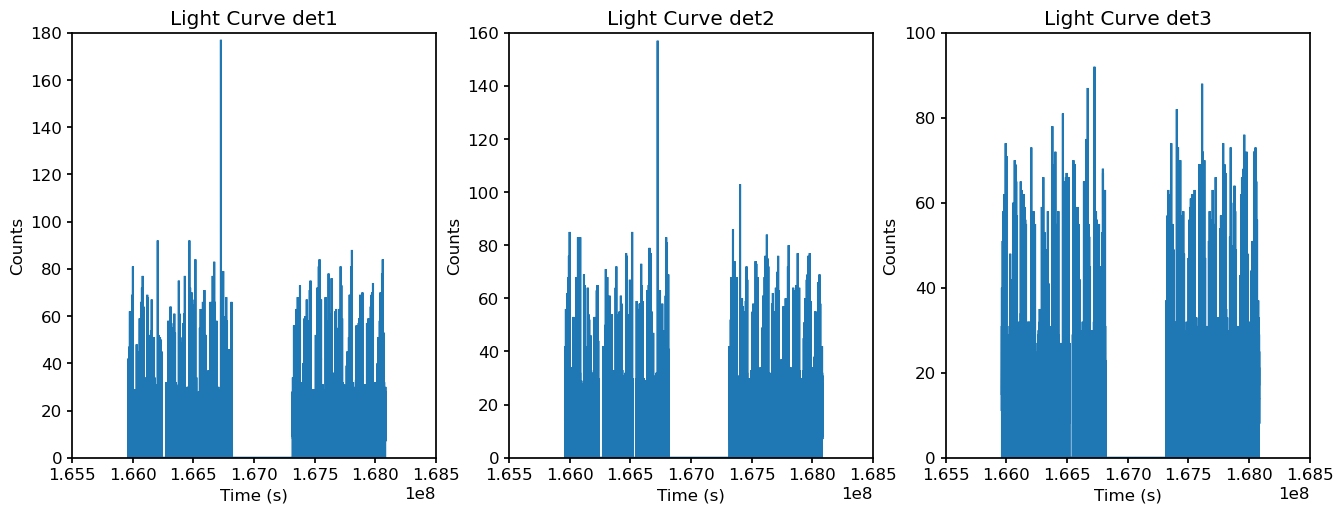

In [45]:
# fdu1 = current_path + '/' + wcscorr[0]
# evDu1 = EventList.read(Initial1_file[0], 'hea')
# lc1 = evDu1.to_lc(20)
# evDu2 = EventList.read(Initial1_file[1], 'hea')
# lc2 = evDu2.to_lc(20)
# evDu3 = EventList.read(Initial1_file[2], 'hea')
# lc3 = evDu3.to_lc(20)

evDu1 = EventList.read(wcscorr[0], 'hea')
lc1 = evDu1.to_lc(20)
evDu2 = EventList.read(wcscorr[1], 'hea')
lc2 = evDu2.to_lc(20)
evDu3 = EventList.read(wcscorr[2], 'hea')
lc3 = evDu3.to_lc(20)

fig, axs = plt.subplots(1, 3, figsize=(15, 5)) #创建一个包含三个子图的画布
axs[0].plot(lc1.time, lc1.counts)
axs[0].set_xlabel('Time (s)')
axs[0].set_ylabel('Counts')
axs[0].set_title('Light Curve det1')
axs[1].plot(lc2.time, lc2.counts)
axs[1].set_xlabel('Time (s)')
axs[1].set_ylabel('Counts')
axs[1].set_title('Light Curve det2')
axs[2].plot(lc3.time, lc3.counts)
axs[2].set_xlabel('Time (s)')
axs[2].set_ylabel('Counts')
axs[2].set_title('Light Curve det3')
plt.savefig('lc_all.jpg', dpi=300) #保存图像


# plt.figure()
# plt.plot(lc1.time, lc1.counts)
# plt.xlabel('Times(s)')
# plt.ylabel('Counts')
# plt.figure()
# plt.plot(lc2.time, lc2.counts)
# plt.xlabel('Times(s)')
# plt.ylabel('Counts')
# plt.figure()
# plt.plot(lc3.time, lc3.counts)
# plt.xlabel('Times(s)')
# plt.ylabel('Counts')

In [46]:
bins=20000

def lc_funcation(data_file):
    hdul = fits.open(data_file)
    events = EventList.read(data_file, 'hea')
    lc = events.to_lc(bins)
    ti=lc.time
    events = hdul[1].data
    energy_events = events
    time=energy_events['TIME']
    rate=np.zeros(len(ti))
    yerr=np.zeros(len(ti))
    for i in range(len(ti)):
        start_time =ti[i]-bins/2
        end_time = ti[i]+bins/2
        mask = (time >= start_time) & (time <= end_time)
        filtered_time = time[mask]
        time_diff = np.diff(filtered_time)
        gti_mask = np.concatenate(([True], time_diff > 40,[True]))
        if len(filtered_time)==0:
            continue
        start=filtered_time[gti_mask[:-1]]
        stop=filtered_time[gti_mask[1:]]
        rate[i]=(len(filtered_time)/(sum(stop)-sum(start)))
        yerr[i] = (rate[i]/(sum(stop)-sum(start)) **0.5)
                   
    return lc,rate, yerr

In [47]:
files = lc_gti_list
results = []

for file in files:
    lc, count_rate, yerr = lc_funcation(file)
    time = lc.time.tolist()
    count_rate = count_rate.tolist()
    yerr = yerr.tolist()
    results.append((time, count_rate, yerr))
    
for i, (time, count_rate, yerr) in enumerate(results):
    j = 0
    while j < len(count_rate):
        if count_rate[j] == 0:
            time.pop(j)
            count_rate.pop(j)
            yerr.pop(j)
        else:
            j += 1
    results[i] = (np.array(time), np.array(count_rate), np.array(yerr))

time_1, count_rate_1, yerr_1 = results[0]
time_2, count_rate_2, yerr_2 = results[1]
time_3, count_rate_3, yerr_3 = results[2]

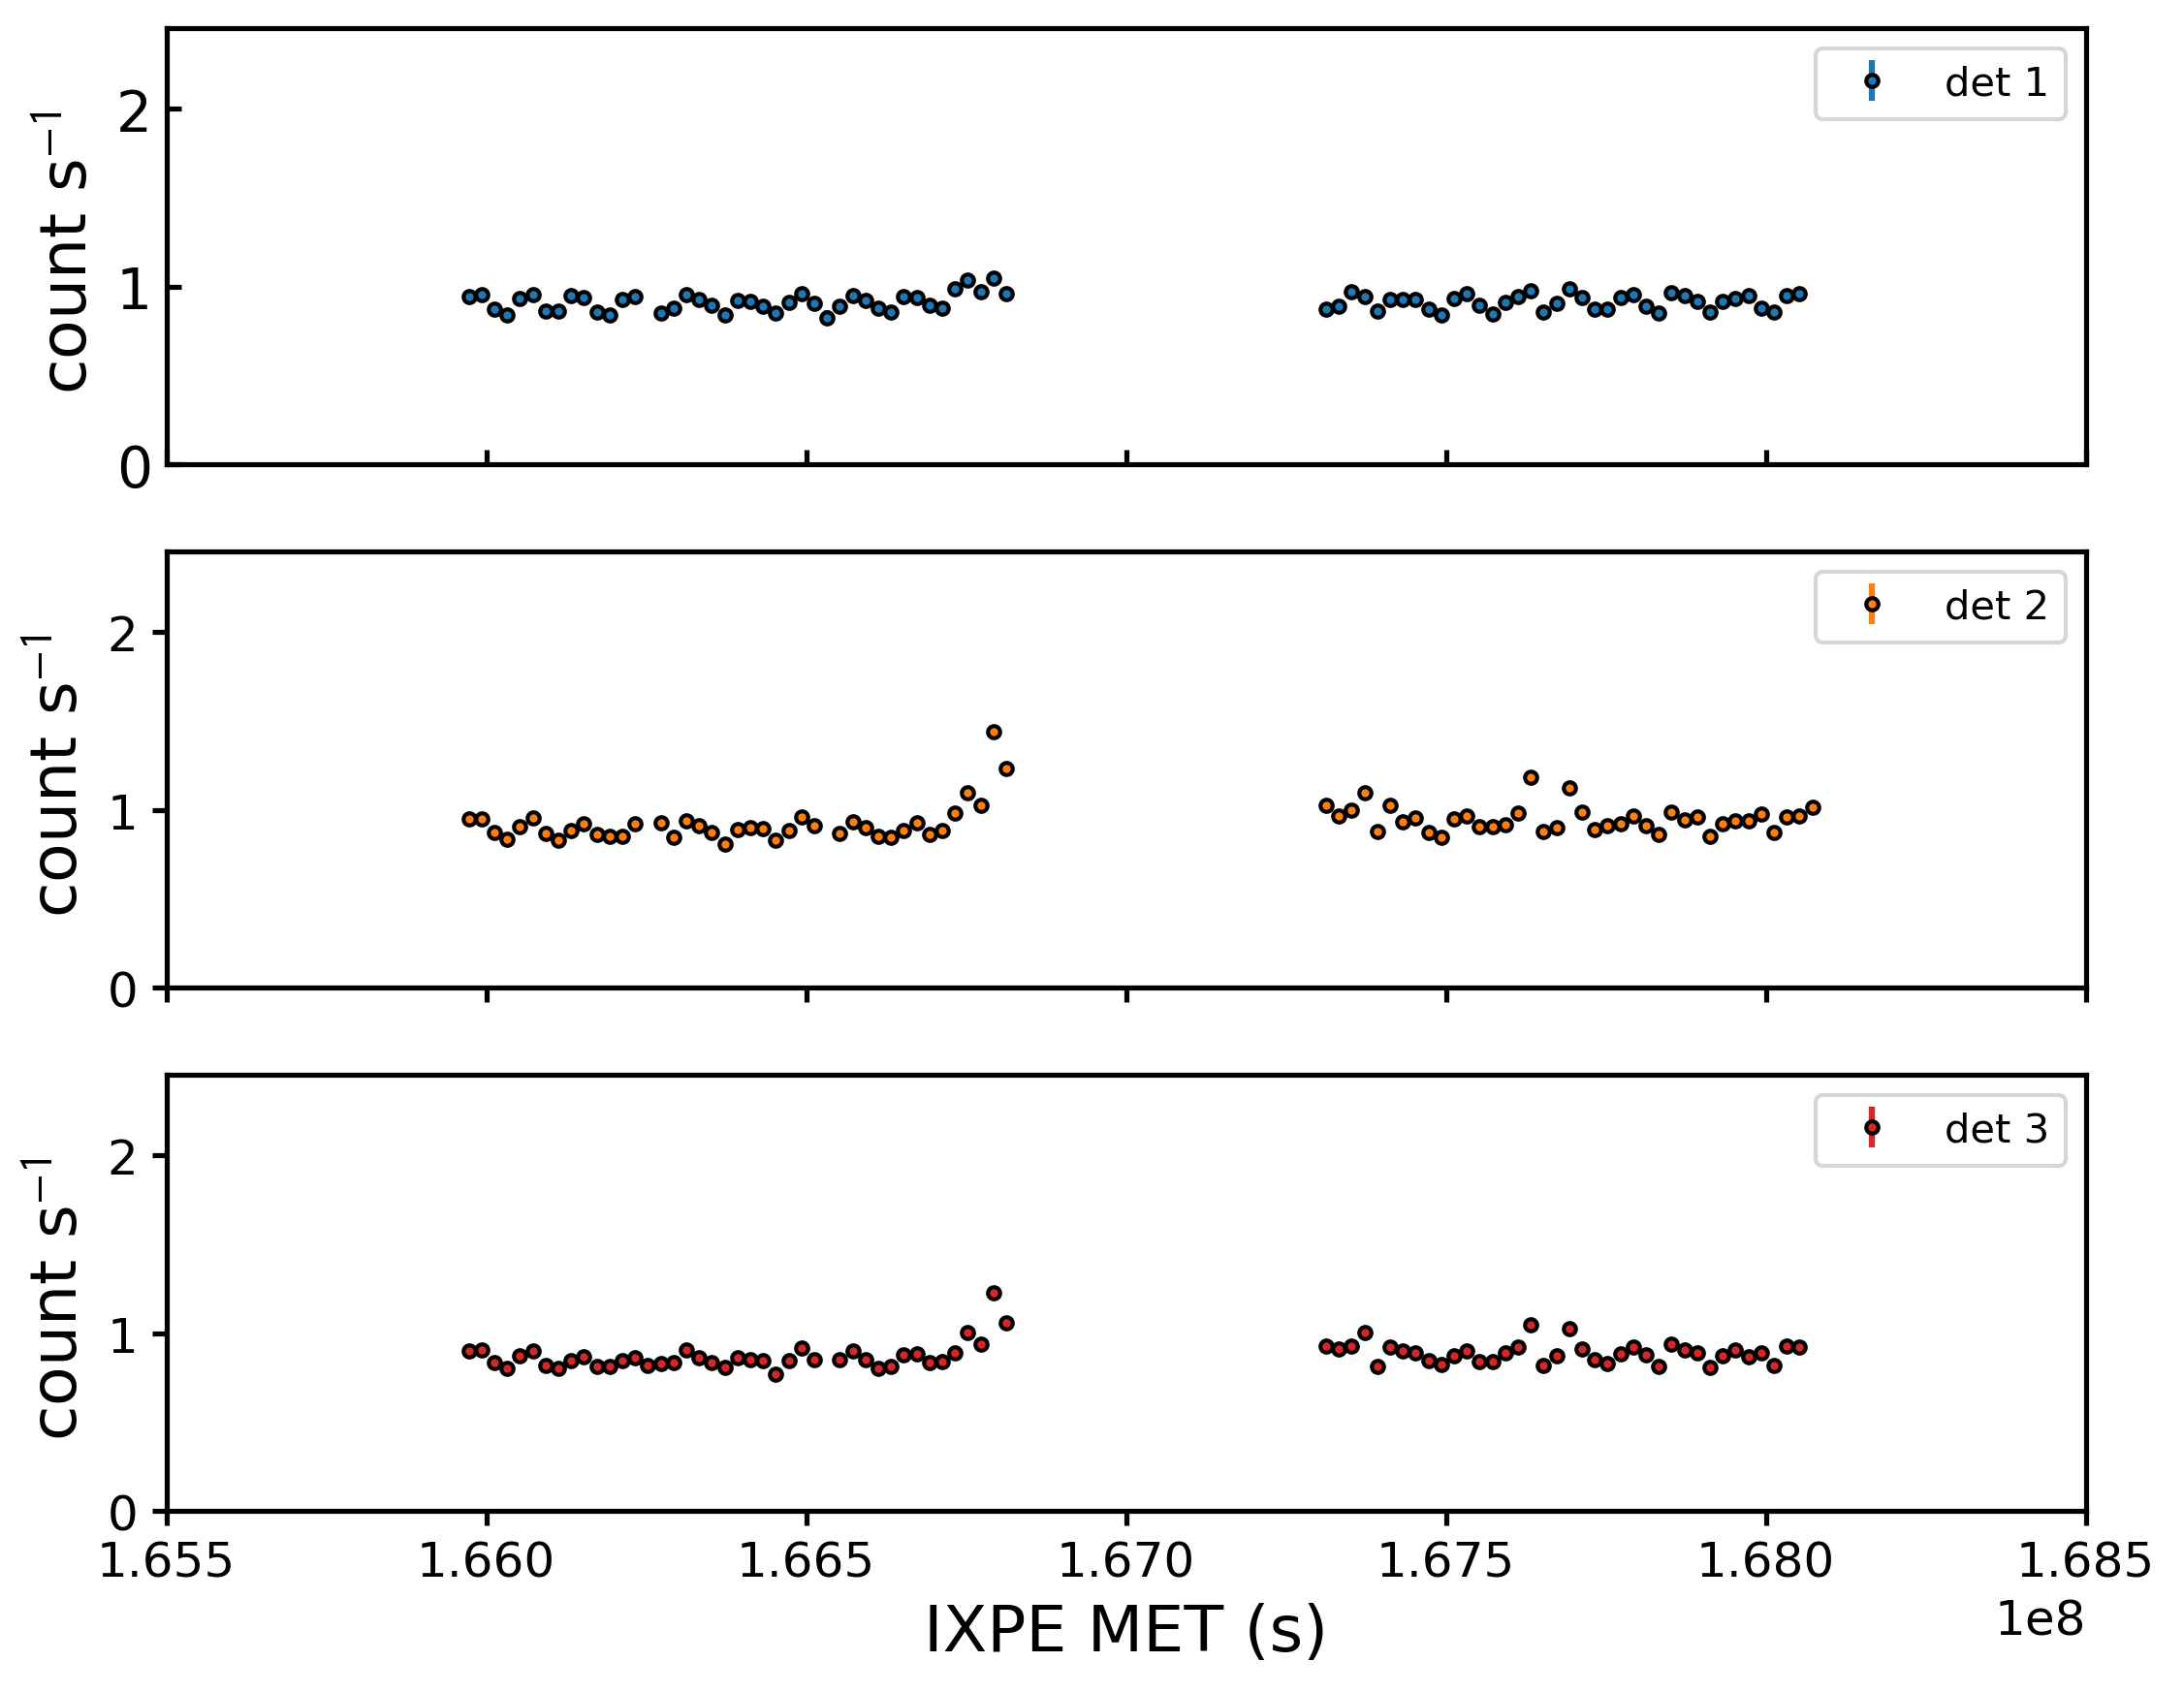

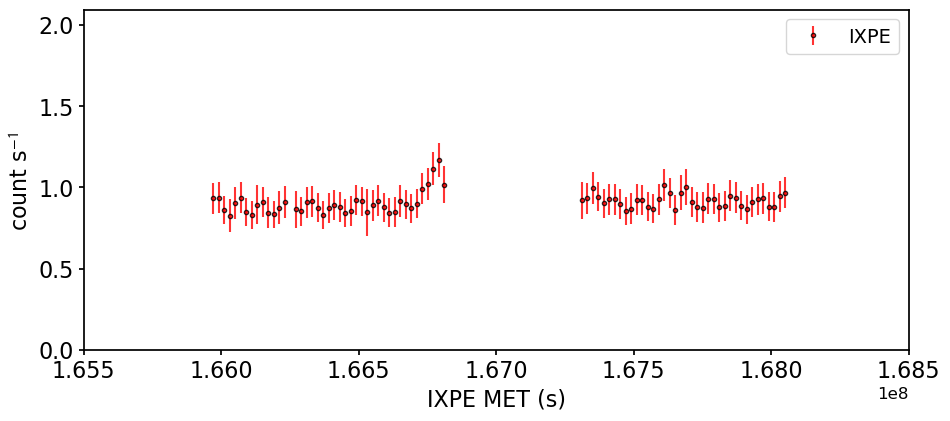

In [48]:
min_len = min(len(count_rate_1), len(count_rate_2), len(count_rate_3),len(time_1),len(time_2),len(time_3),
              len(yerr_1),len(yerr_2),len(yerr_3))
count_rate_1 = count_rate_1[:min_len]
count_rate_2 = count_rate_2[:min_len]
count_rate_3 = count_rate_3[:min_len]
time_1 = time_1[:min_len]
time_2 = time_2[:min_len]
time_3 = time_3[:min_len]
yerr_1 = yerr_1[:min_len]
yerr_2 = yerr_2[:min_len]
yerr_3 = yerr_3[:min_len]


fig, (ax1, ax2,ax3) = plt.subplots(3, 1, figsize=(8,6), sharex = True,sharey = True,dpi=300)
font = {'family' : 'DejaVu Sans','weight' : 'normal','size'   : 14,}
ax3.set_xlabel("IXPE MET (s)",font=font)
ax1.tick_params(axis='both',labelsize=14, color='black',labelcolor='black', direction='in')

ax1.errorbar(time_1, np.array(count_rate_1), yerr_1,
             fmt='.',color='C0',alpha=1,mec='k',label='det 1')
ax2.errorbar(time_2, np.array(count_rate_2), yerr_2,
             fmt='.',color='C1',alpha=1,mec='k',label='det 2')
ax3.errorbar(time_3, np.array(count_rate_3), yerr_3,
             fmt='.',color='C3',alpha=1,mec='k',label='det 3')

ax1.set_ylim(0,max(np.array(count_rate_1))*2)
ax2.set_ylim(0,max(np.array(count_rate_2))*2)
ax3.set_ylim(0,max(np.array(count_rate_3))*2)

ax1.set_ylabel(r"count s$^{-1}$ ",color='k',size=16)
ax2.set_ylabel(r"count s$^{-1}$ ",color='k',size=16)
ax3.set_ylabel(r"count s$^{-1}$ ",color='k',size=16)

ax1.legend(loc='upper right', frameon=True,fontsize=10)
ax2.legend(loc='upper right', frameon=True,fontsize=10)
ax3.legend(loc='upper right', frameon=True,fontsize=10)

ax3.set_xlabel('IXPE MET (s)',fontsize=16)

plt.savefig('dt_lc_2_20000_0''.jpg', dpi=300, bbox_inches='tight')

fig, ax1= plt.subplots(1, 1, figsize=(10,4))




ax1.errorbar(time_1, (count_rate_1+count_rate_2+count_rate_3)/3, 
             yerr = ((yerr_1+yerr_2+yerr_3)/3)**0.5,
             fmt='.',color='r',alpha=0.8,mec='k',label='IXPE')



ax1.set_ylim(0,max(np.array(count_rate_1))*2)


ax1.legend(loc='upper right', frameon=True,fontsize=14)
ax1.xaxis.set_tick_params(labelsize=16)
ax1.yaxis.set_tick_params(labelsize=16)
ax1.set_xlabel('IXPE MET (s)',fontsize=16)
ax1.set_ylabel(r"count s$^{-1}$ ",color='k',size=16)
plt.rcParams['axes.linewidth'] = 1.5

plt.savefig('sum_lc_2_20000_0''.jpg', dpi=300, bbox_inches='tight')

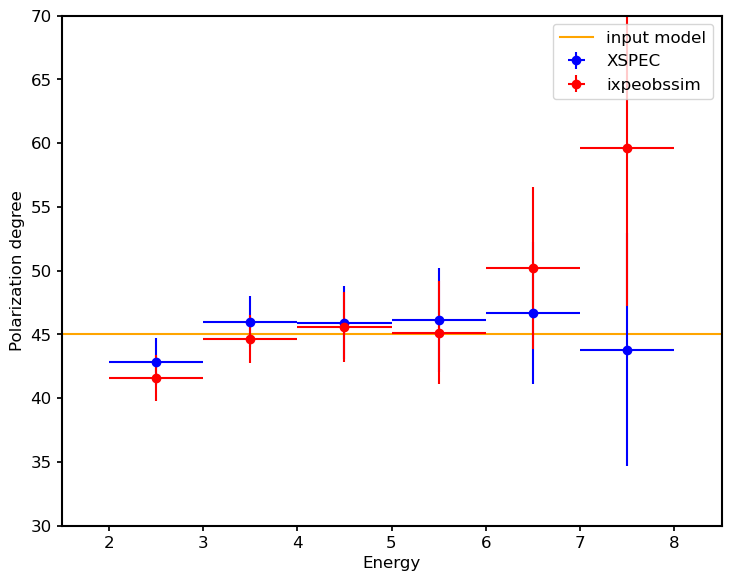

In [49]:
import numpy as np
import matplotlib.pyplot as plt
# 下面两行代码要放在plt.plot的前面
plt.rcParams['xtick.direction'] = 'out'#将x轴的刻度线方向设置向外
plt.rcParams['ytick.direction'] = 'out'#将y轴的刻度线方向设置向外
plt.tick_params(axis='x',colors='black')
plt.tick_params(axis='y',colors='black')
plt.xlim([1.5,8.5])
plt.ylim([30,70])#画坐标轴
y=[45,45,45,45,45,45,45,45]
x=[1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5]
Y=[new_degree_list[0], new_degree_list[1], new_degree_list[2], new_degree_list[3], new_degree_list[4], new_degree_list[5]]
X=[2.5,3.5,4.5,5.5,6.5,7.5]
Error=[degree_error[0], degree_error[1], degree_error[2], degree_error[3], degree_error[4], degree_error[5]]
float_list1 = [float(x) for x in Y]
Y = float_list1
float_list2 = [float(x) for x in Error]
Error = float_list2
plt.plot(x,y,color='orange')
plt.ylabel('Polarization degree')
plt.xlabel('Energy')
# plt.errorbar(2.5,y=Y[0],yerr=Error[0],xerr=0.5,ecolor='b')
# plt.errorbar(3.5,y=Y[1],yerr=Error[1],xerr=0.5,ecolor='b')
# plt.errorbar(4.5,y=Y[2],yerr=Error[2],xerr=0.5,ecolor='b')
# plt.errorbar(5.5,y=Y[3],yerr=Error[3],xerr=0.5,ecolor='b')
# plt.errorbar(6.5,y=Y[4],yerr=Error[4],xerr=0.5,ecolor='b')
# plt.errorbar(7.5,y=Y[5],yerr=Error[5],xerr=0.5,ecolor='b')

# 绘制第二条误差棒
Y2 = [new_Ixpeobssim_degree[0], new_Ixpeobssim_degree[1], new_Ixpeobssim_degree[2], new_Ixpeobssim_degree[3], new_Ixpeobssim_degree[4], new_Ixpeobssim_degree[5]]
Error2 = [obssimpderror[0], obssimpderror[1], obssimpderror[2], obssimpderror[3], obssimpderror[4], obssimpderror[5]]
float_list3 = [float(x) for x in Y2]
Y2 = float_list3
float_list4 = [float(x) for x in Error2]
Error2 = float_list4

plt.errorbar(X, Y, yerr=Error, xerr=0.5, fmt='o', color='b', ecolor='b')
plt.errorbar(X, Y2, yerr=Error2, xerr=0.5, fmt='o', color='r', ecolor='r')

# 添加图例，并为两条误差棒添加标签
plt.legend(['input model', 'XSPEC', 'ixpeobssim'])

# 设置x轴和y轴的标签
plt.ylabel('Polarization degree')
plt.xlabel('Energy')

# 显示图形
plt.show()




# plt.scatter(X, Y,color='b')
# plt.legend(['input model','XSPEC'])#右上角标签
# plt.show()

In [50]:
print(new_Ixpeobssim_degree)

['41.6', '44.63', '45.6', '45.14', '50.24', '59.62', '44.58']


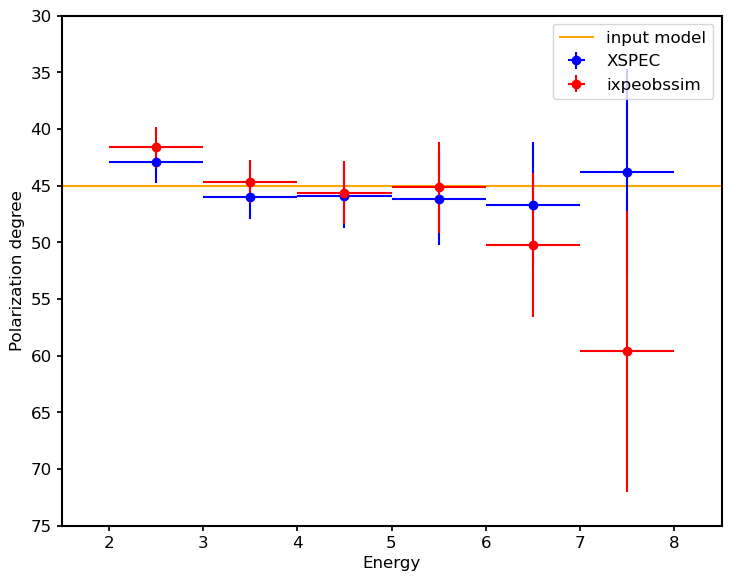

In [51]:
import numpy as np
import matplotlib.pyplot as plt
A = A*100
# 下面两行代码要放在plt.plot的前面
plt.rcParams['xtick.direction'] = 'out'#将x轴的刻度线方向设置向外
plt.rcParams['ytick.direction'] = 'out'#将y轴的刻度线方向设置向外
plt.tick_params(axis='x',colors='black')
plt.tick_params(axis='y',colors='black')
plt.xlim([1.5,8.5])
# plt.ylim([70,30])#画坐标轴
y=[A,A,A,A,A,A,A,A]
x=[1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5]
Y=[new_degree_list[0], new_degree_list[1], new_degree_list[2], new_degree_list[3], new_degree_list[4], new_degree_list[5]]
X=[2.5,3.5,4.5,5.5,6.5,7.5]
Error=[degree_error[0], degree_error[1], degree_error[2], degree_error[3], degree_error[4], degree_error[5]]
float_list1 = [float(x) for x in Y]
Y = float_list1
float_list2 = [float(x) for x in Error]
Error = float_list2
plt.plot(x,y,color='orange')
plt.ylabel('Polarization degree')
plt.xlabel('Energy')

# 绘制第二条误差棒
Y2 = [new_Ixpeobssim_degree[0], new_Ixpeobssim_degree[1], new_Ixpeobssim_degree[2], new_Ixpeobssim_degree[3], new_Ixpeobssim_degree[4], new_Ixpeobssim_degree[5]]
Error2 = [obssimpderror[0], obssimpderror[1], obssimpderror[2], obssimpderror[3], obssimpderror[4], obssimpderror[5]]
float_list3 = [float(x) for x in Y2]
Y2 = float_list3
float_list4 = [float(x) for x in Error2]
Error2 = float_list4

plt.errorbar(X, Y, yerr=Error, xerr=0.5, fmt='o', color='b', ecolor='b')
plt.errorbar(X, Y2, yerr=Error2, xerr=0.5, fmt='o', color='r', ecolor='r')

# 添加图例，并为两条误差棒添加标签
plt.legend(['input model', 'XSPEC', 'ixpeobssim'])

# 设置x轴和y轴的标签
plt.ylabel('Polarization degree')
plt.xlabel('Energy')
plt.gca().invert_yaxis()
# 显示图形
plt.show()

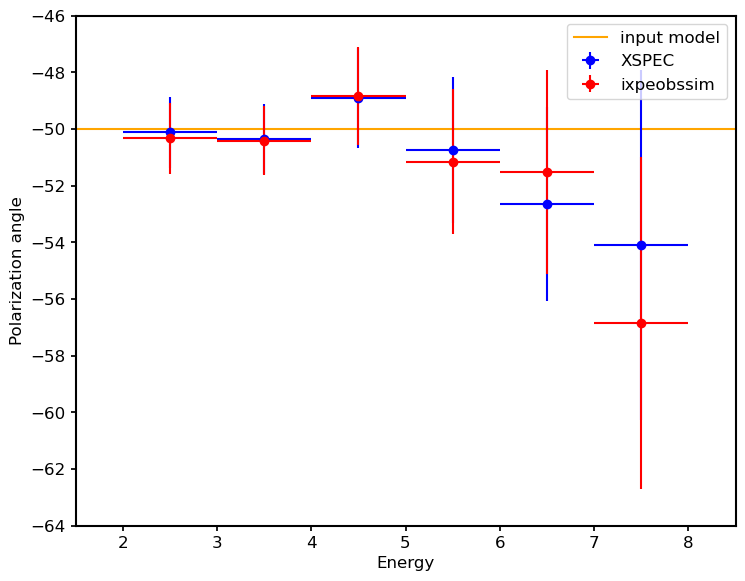

In [52]:
##偏振角

import numpy as np
import matplotlib.pyplot as plt
# 下面两行代码要放在plt.plot的前面
plt.rcParams['xtick.direction'] = 'out'#将x轴的刻度线方向设置向外
plt.rcParams['ytick.direction'] = 'out'#将y轴的刻度线方向设置向外
plt.tick_params(axis='x',colors='black')
plt.tick_params(axis='y',colors='black')
plt.xlim([1.5,8.5])
# plt.ylim([-40,-60])#画坐标轴
y=[psi,psi,psi,psi,psi,psi,psi,psi]
x=[1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5]
Y=[new_angle_list[0],new_angle_list[1],new_angle_list[2],new_angle_list[3],new_angle_list[4],new_angle_list[5]]
X=[2.5,3.5,4.5,5.5,6.5,7.5]
Error=[angle_error[0],angle_error[1],angle_error[2],angle_error[3],angle_error[4],angle_error[5]]
float_list1 = [float(x) for x in Y]
Y = float_list1
float_list2 = [float(x) for x in Error]
Error = float_list2
plt.plot(x,y,color='orange')
plt.ylabel('Polarization degree')
plt.xlabel('Energy')

# 绘制第二条误差棒
Y2 = [new_Ixpeobssim_angle[0],new_Ixpeobssim_angle[1],new_Ixpeobssim_angle[2],new_Ixpeobssim_angle[3],new_Ixpeobssim_angle[4],new_Ixpeobssim_angle[5]]
Error2 = [obssimpaerror[0],obssimpaerror[1],obssimpaerror[2],obssimpaerror[3],obssimpaerror[4],obssimpaerror[5]]
float_list3 = [float(x) for x in Y2]
Y2 = float_list3
float_list4 = [float(x) for x in Error2]
Error2 = float_list4

plt.errorbar(X, Y, yerr=Error, xerr=0.5, fmt='o', color='b', ecolor='b')
plt.errorbar(X, Y2, yerr=Error2, xerr=0.5, fmt='o', color='r', ecolor='r')

# 添加图例，并为两条误差棒添加标签
plt.legend(['input model', 'XSPEC', 'ixpeobssim'])

# 设置x轴和y轴的标签
plt.ylabel('Polarization angle')
plt.xlabel('Energy')

# 显示图形
plt.show()


In [53]:
#使用glob模块匹配当前目录下所有以.fits结尾的文件
remove_files = glob.glob("*.fits")

# 循环遍历所有匹配到的文件，并删除它们
for file in remove_files:
    os.remove(file)